In [1]:
import numpy as np
import scipy.misc
import cv2

import glob

import matplotlib.pyplot as plt
import thinning as th
%matplotlib inline

In [2]:
scale = 1./16. #0.125
conversion = 0.64623

In [3]:
masks = glob.glob('./masks_170719/*.tif')
result_dir = './results_170719/'
masks

['./masks_170719/Mask7-3a-1.tif',
 './masks_170719/BOX3-3 - DAPImask.tif',
 './masks_170719/BOX2-4 - DAPImask.tif',
 './masks_170719/Mask7-3-1.tif',
 './masks_170719/Mask10-6a-2.tif',
 './masks_170719/_BOX10-7__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/_BOX9-5__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/_BOX1-2__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/Mask6-2a-2.tif',
 './masks_170719/Mask7-3-2.tif',
 './masks_170719/BOX4-2 - DAPI mask.tif',
 './masks_170719/_BOX4-1__TUNEL_HOECST_01_01 - DAPI mask.tif',
 './masks_170719/_BOX3bis-3__TUNEL_HOECST_01_01 - DAPI mask.tif',
 './masks_170719/BOX1-1 - DAPImask.tif',
 './masks_170719/Mask6-2bis.tif',
 './masks_170719/BOX10-7 DAPI mask.tif',
 './masks_170719/Mask10-6-1.tif',
 './masks_170719/_BOX1-5__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/BOX5-1 DAPI mask.tif',
 './masks_170719/BOX8-4 - DAPI mask.tif',
 './masks_170719/_BOX3-4__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/Mask3-4-1.tif',
 '

In [4]:
results = {}

In [5]:
for filename in masks:
    mask_name = str.split(str.split(filename,'/')[-1],'.')[0]
    #read
    mask = cv2.imread(filename)
    #rescale
    mask1 = scipy.misc.imresize(mask, scale) 
    #grayscale
    mask_g = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    #threshold
    ret, mask_bw = cv2.threshold(mask_g, 127, 255, cv2.THRESH_BINARY)
    #invert
    mask_bw = 255 - mask_bw
    # write mask to file
    cv2.imwrite(result_dir+mask_name+'_msk.jpg',mask_bw)
    # thinning algo
    bw2 = th.thinning(mask_bw)
    # save thinned image
    cv2.imwrite(result_dir+mask_name+'_thin.jpg',bw2)
    # distance transform
    dist = cv2.distanceTransform(mask_bw, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
    # save dist transf image
    cv2.imwrite(result_dir+mask_name+'_dt.jpg',dist)
    # compute thickness
    th_values = 2*dist[np.where(bw2>0.0)] / scale * conversion
    results[mask_name] = (np.mean(th_values), np.std(th_values), len(th_values))

In [6]:
print results

{'_BOX4-2__TUNEL_HOECST_01_01 - DAPI mask': (102.54742, 47.193291, 2071), 'Mask10-6a-2': (111.03874, 42.248631, 1501), 'Mask10-6a-1': (114.94391, 46.08876, 1532), 'Mask7-3-1': (103.39336, 38.393829, 1282), 'Mask7-3-2': (104.0198, 37.841503, 1174), '_BOX3-4__TUNEL_HOECST_01_01 - DAPImask': (109.21849, 45.48291, 1388), 'Mask7-3a-2': (107.91582, 36.340805, 1385), 'BOX8-4 - DAPI mask': (91.610474, 36.882088, 1378), 'Mask6-2bis': (104.04048, 44.271099, 1329), '_BOX3bis-3__TUNEL_HOECST_01_01 - DAPI mask': (101.28316, 45.453583, 1386), '_BOX8-4__TUNEL_HOECST_01_01 - DAPImask': (104.11184, 40.796402, 1356), 'Mask6-2a-1': (109.82948, 41.614456, 1276), 'Mask10-6-2': (106.09612, 46.776176, 1440), 'Mask10-6-1': (105.17748, 40.791393, 1418), 'Mask6-2a-2': (106.02771, 38.611691, 1416), 'BOX10-7 DAPI mask': (98.779457, 41.486893, 1309), 'BOX7-3-DAPImask': (91.307236, 31.102768, 1065), '___BOX2-4TUNEL-HOECST_01_01 - DAPImask': (109.90702, 43.865788, 1462), 'Mask3-4': (109.34269, 43.722744, 1562), 'Mas

/home/claudio/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


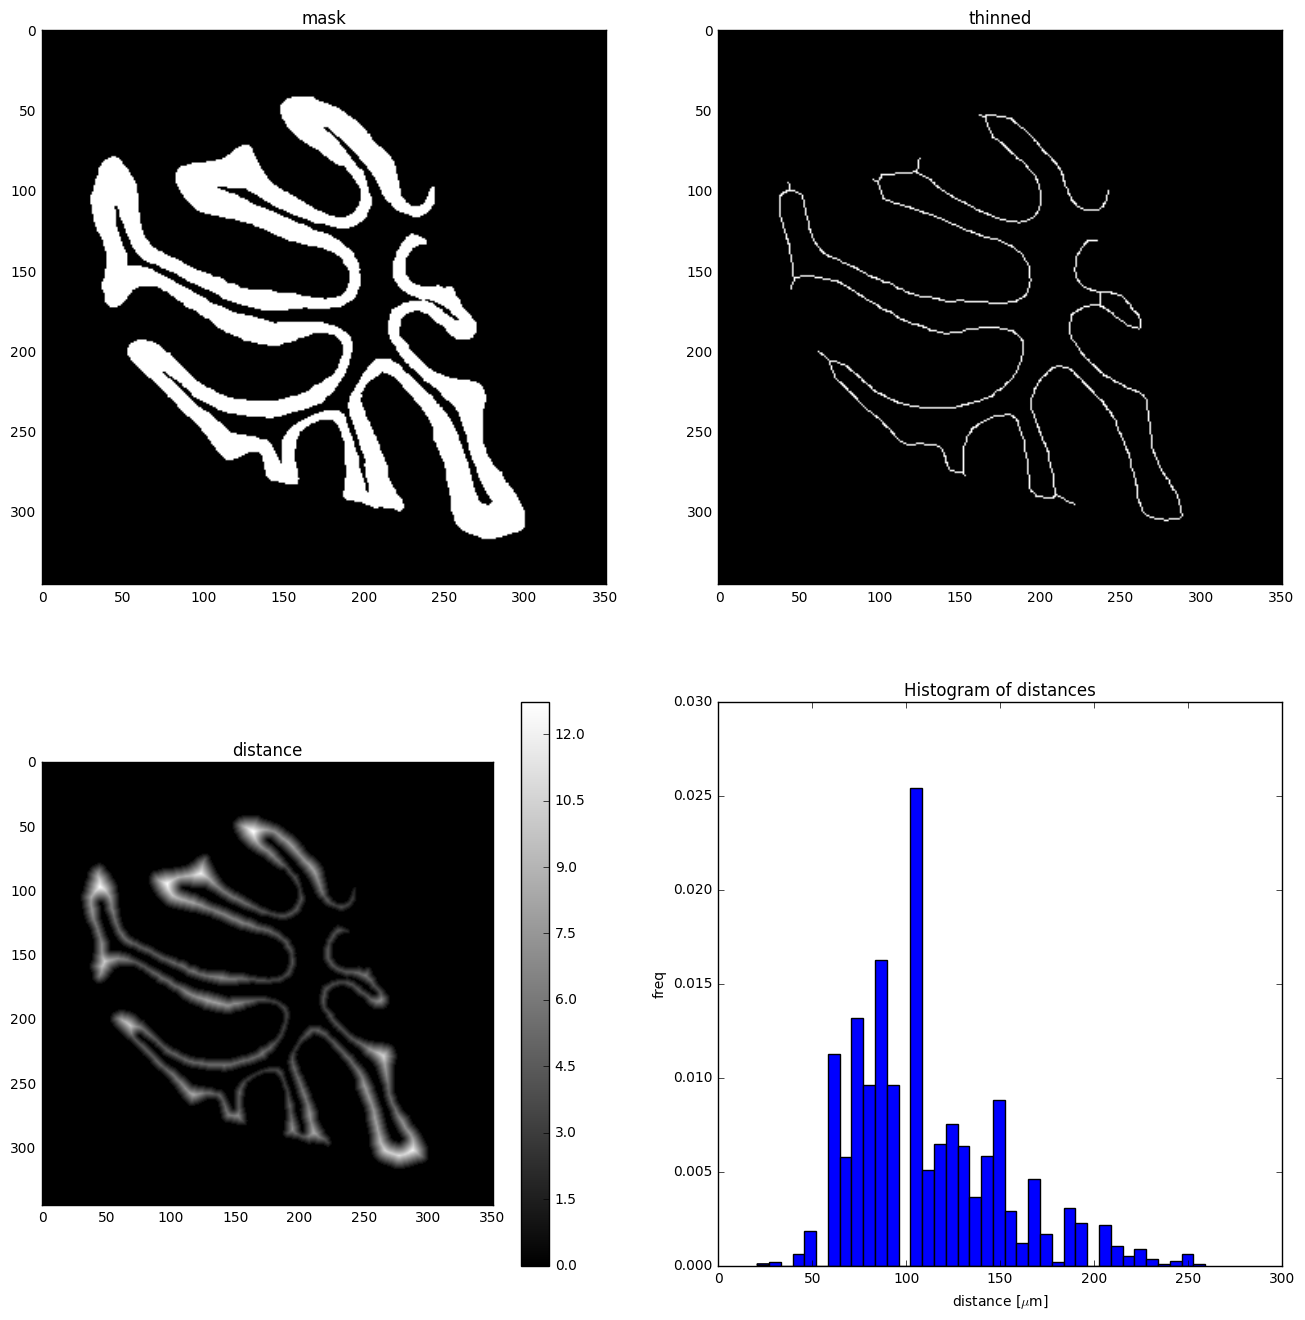

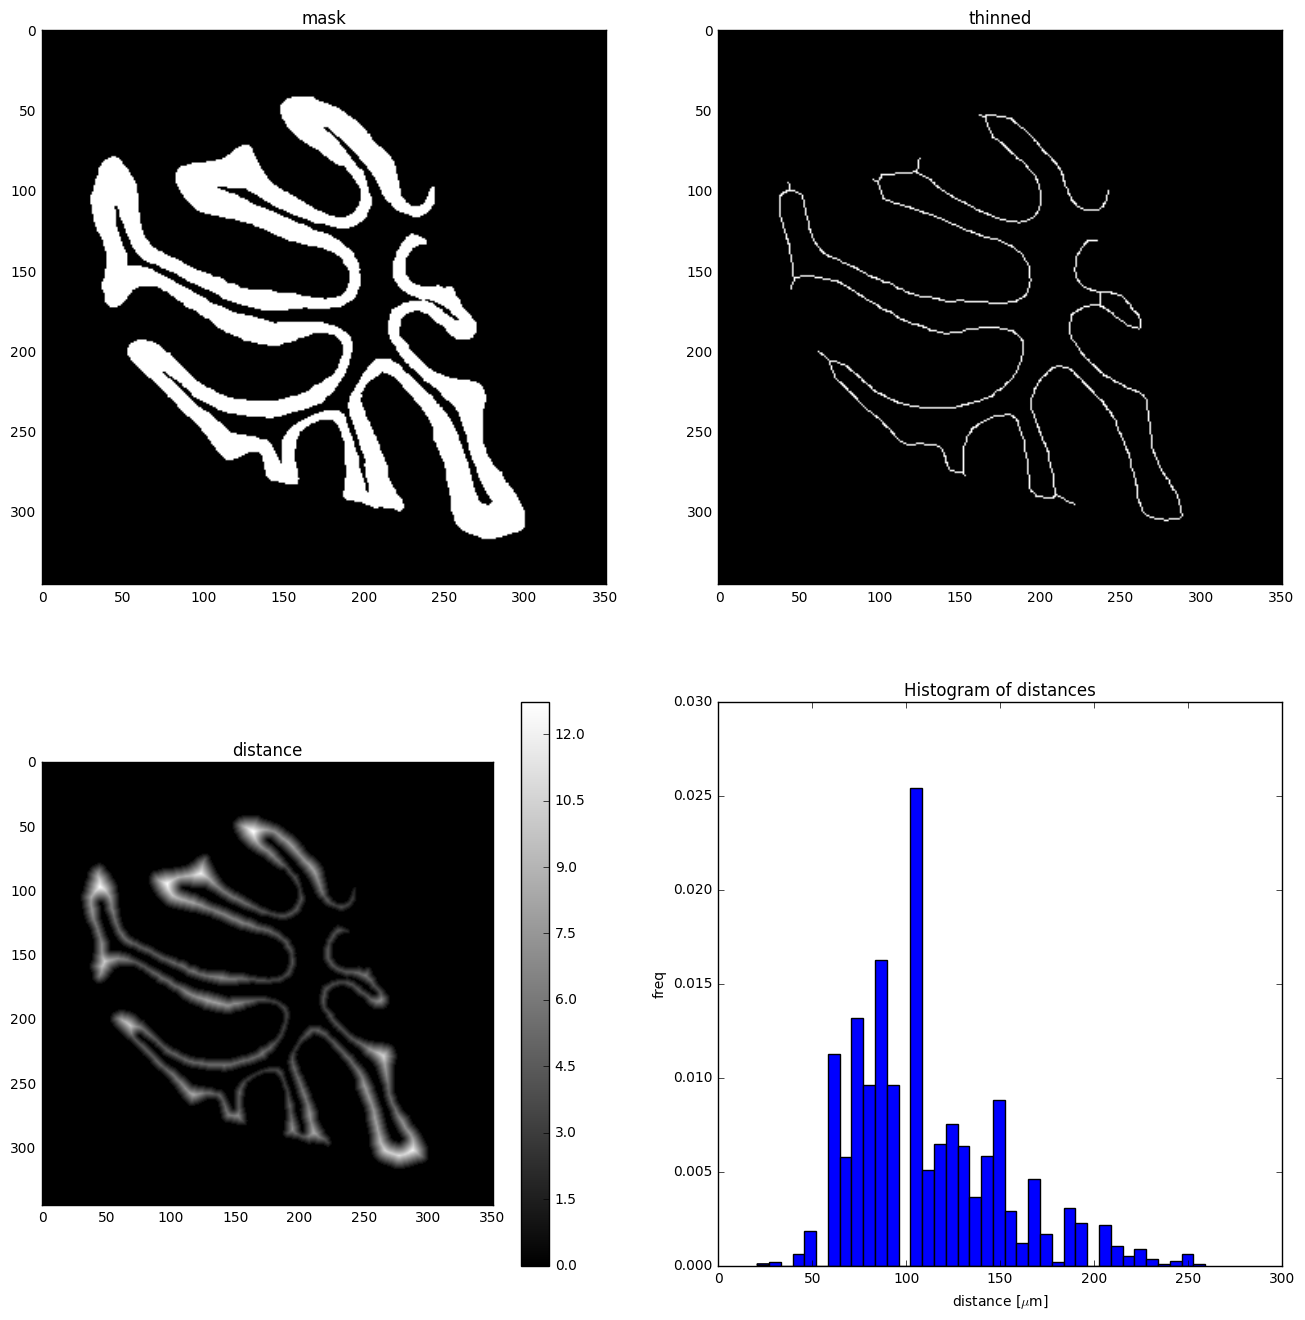

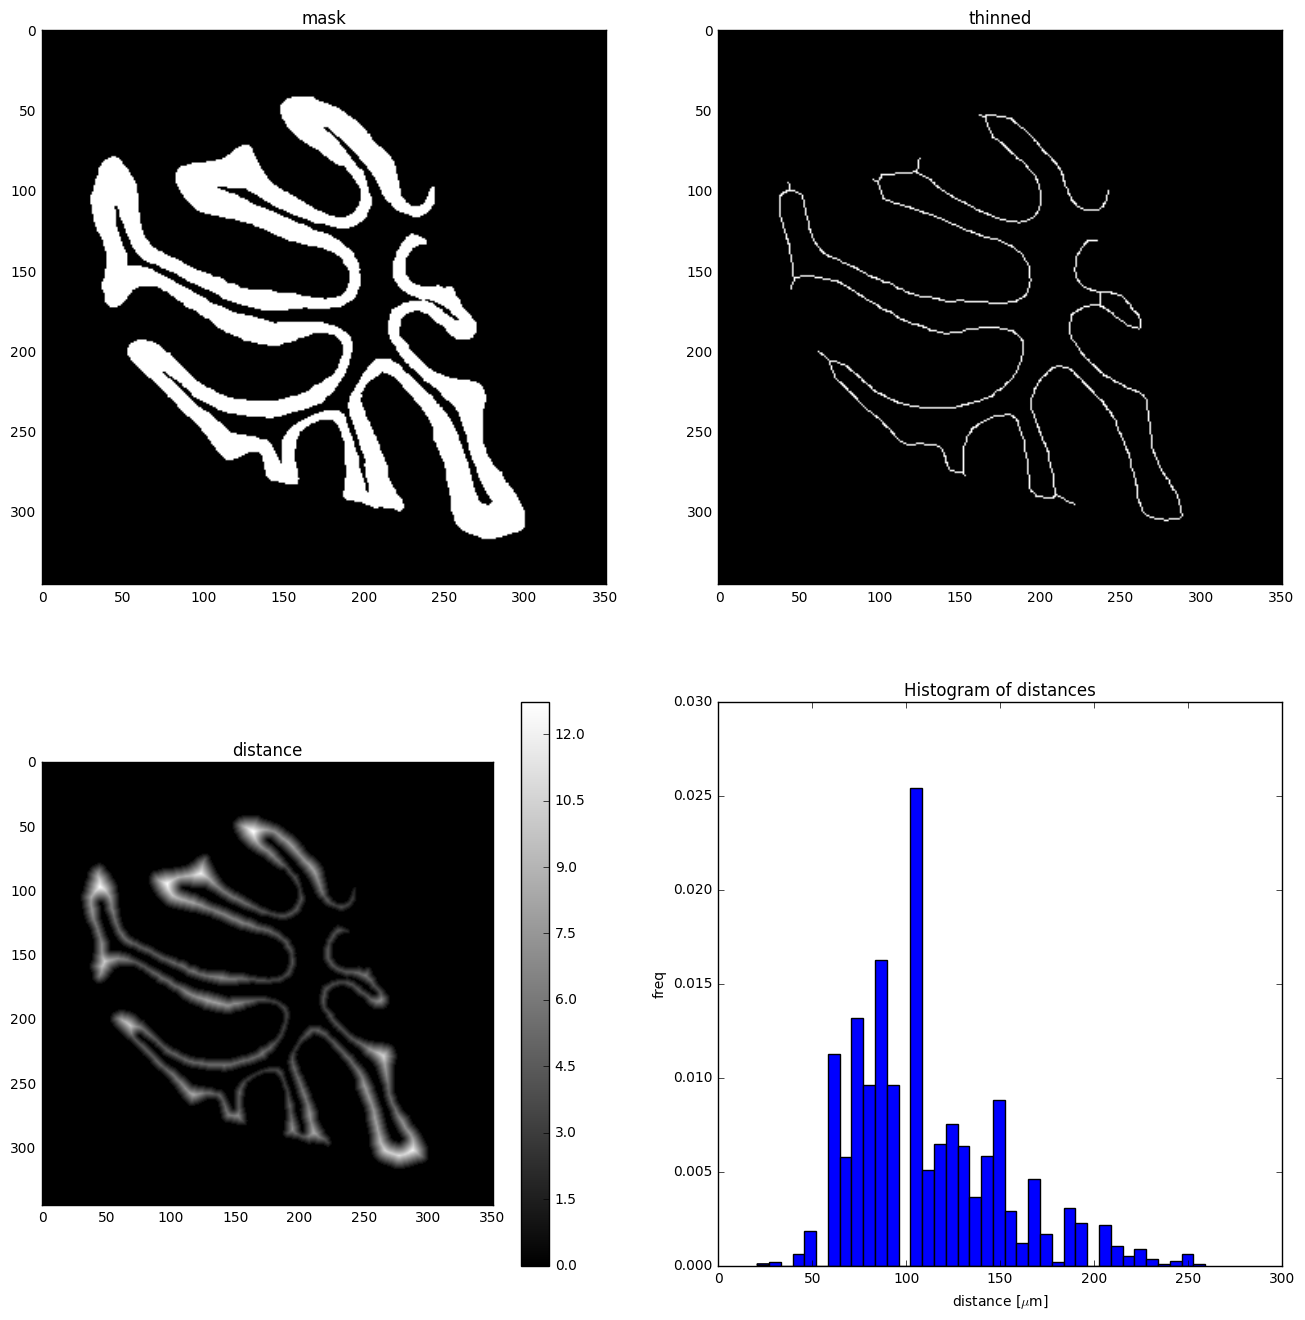

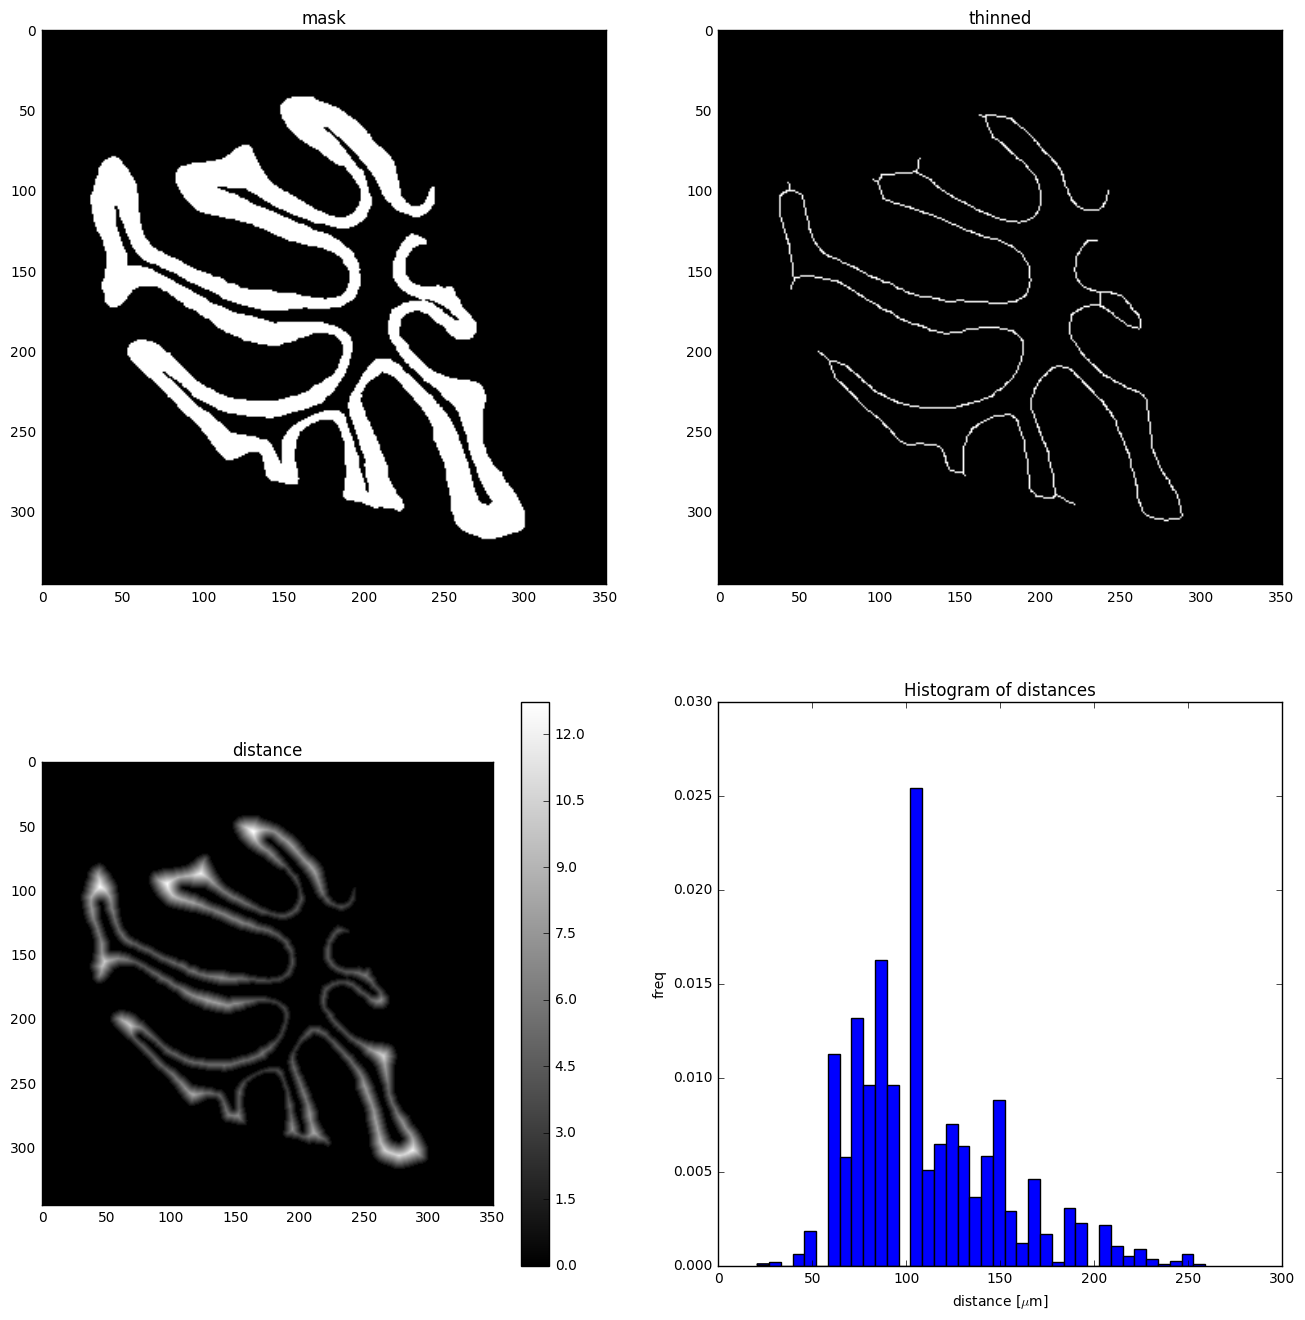

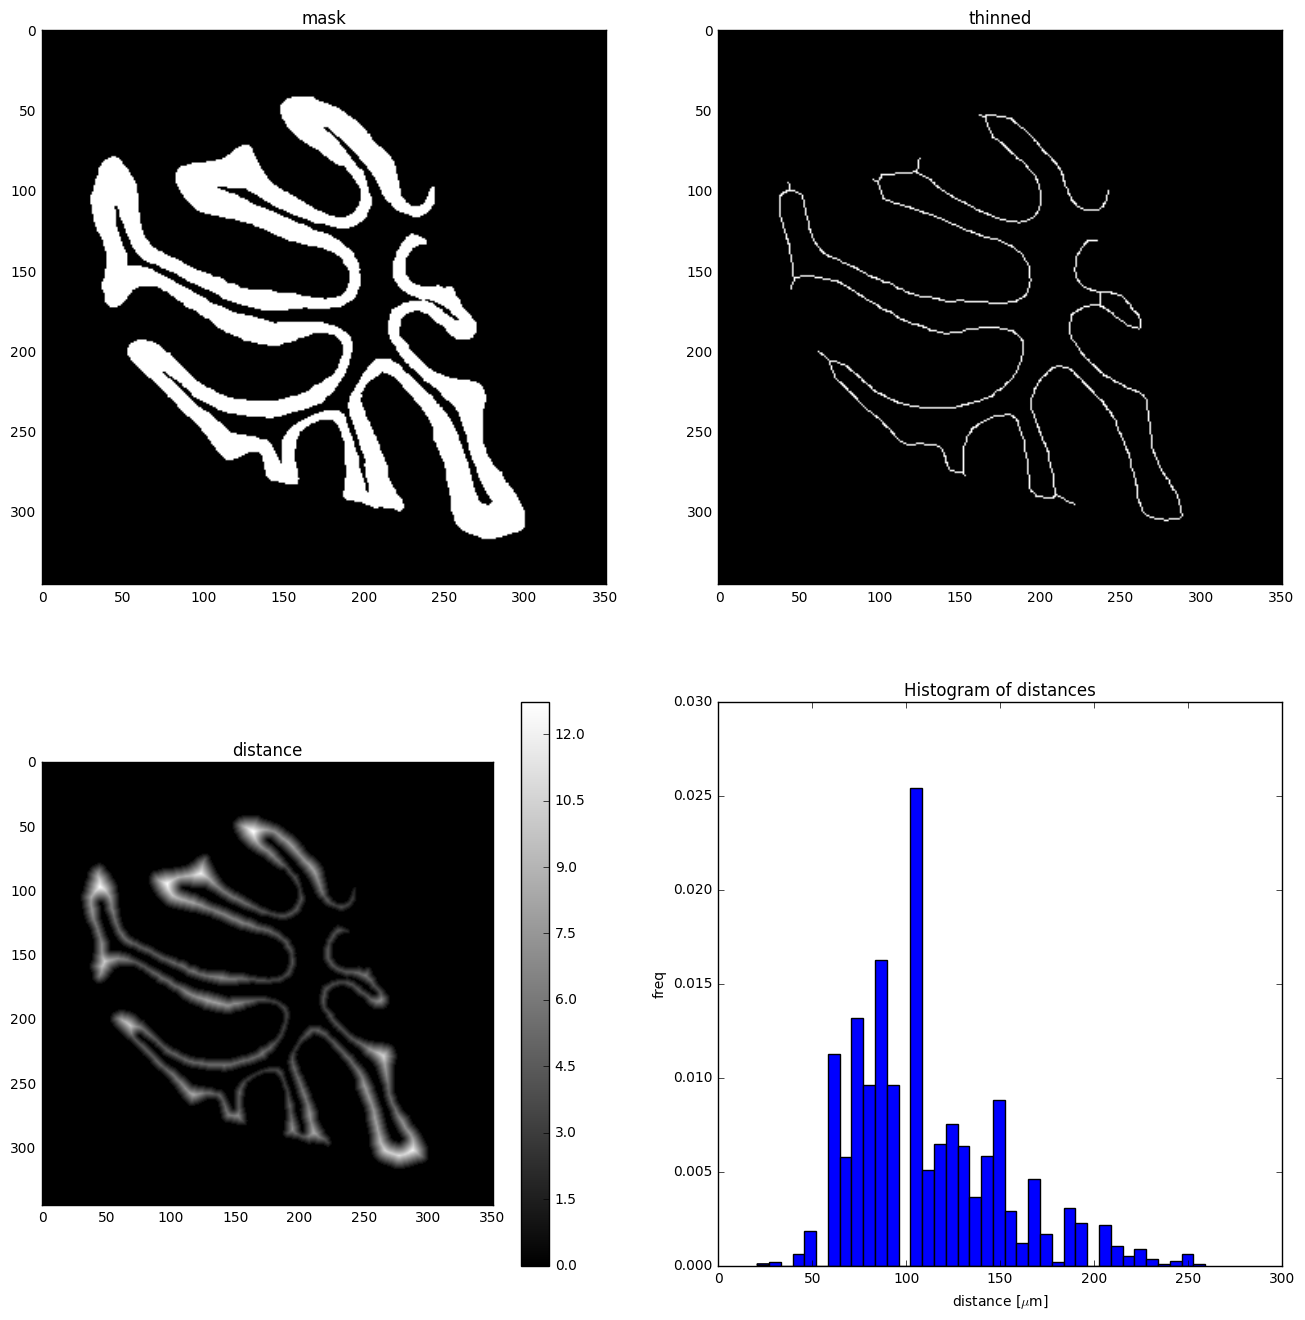

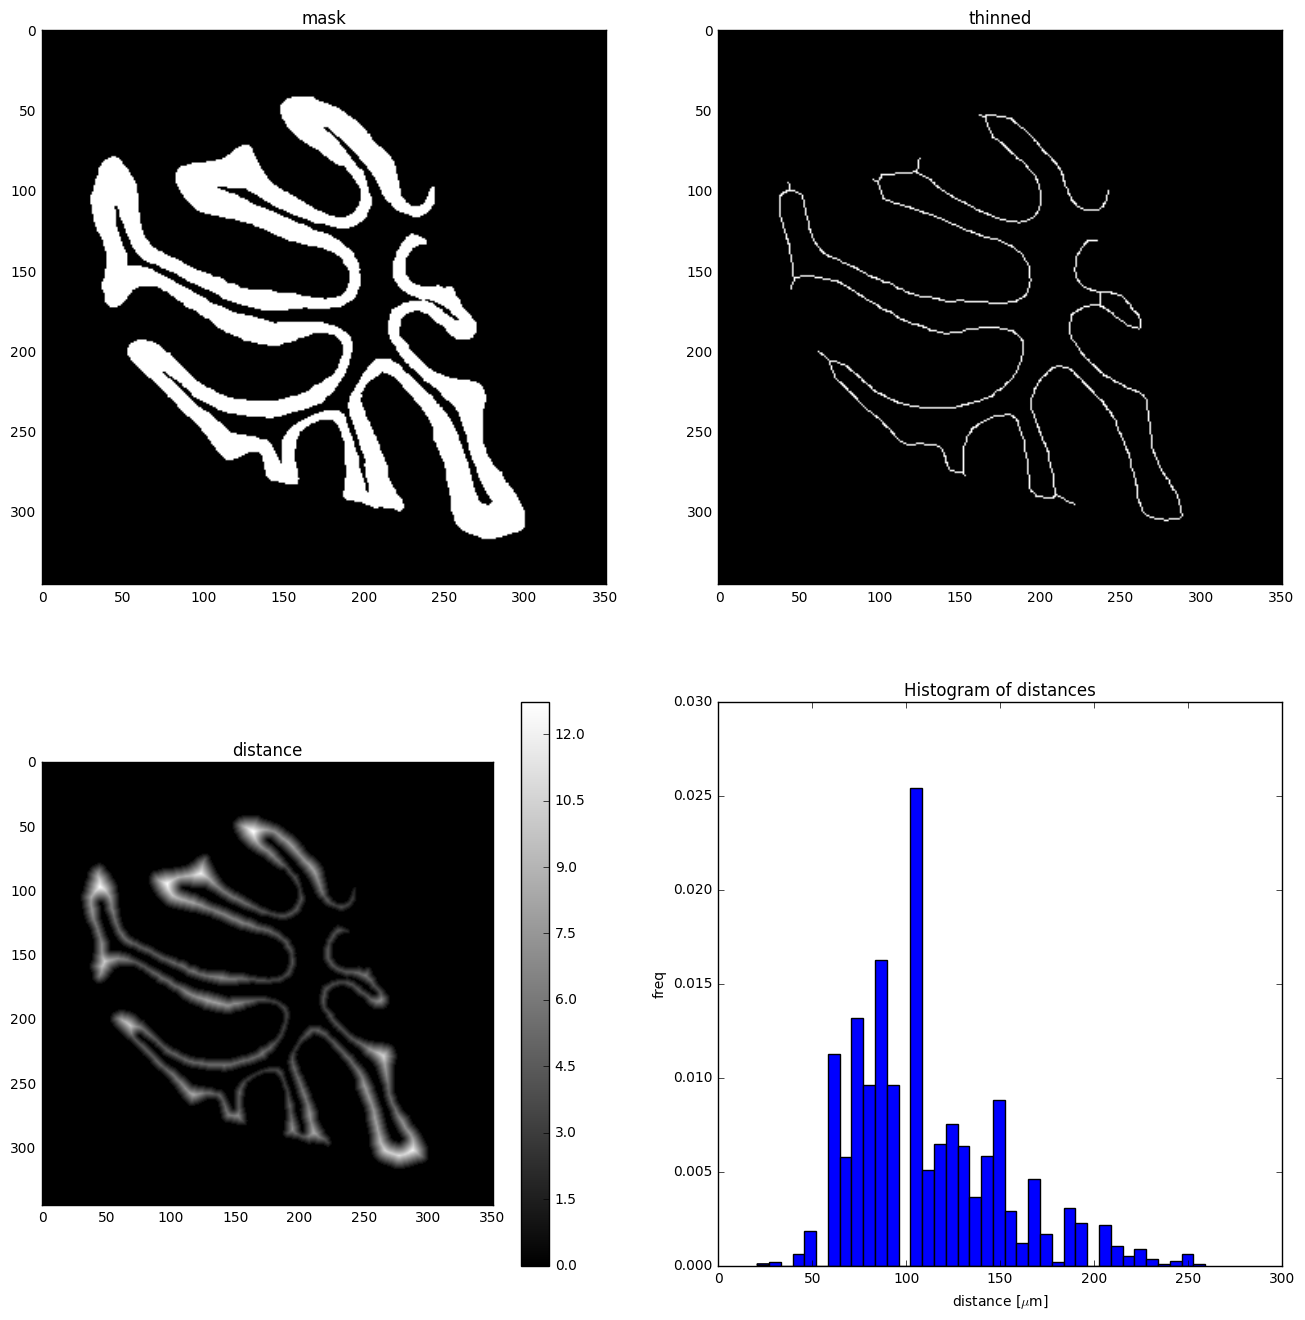

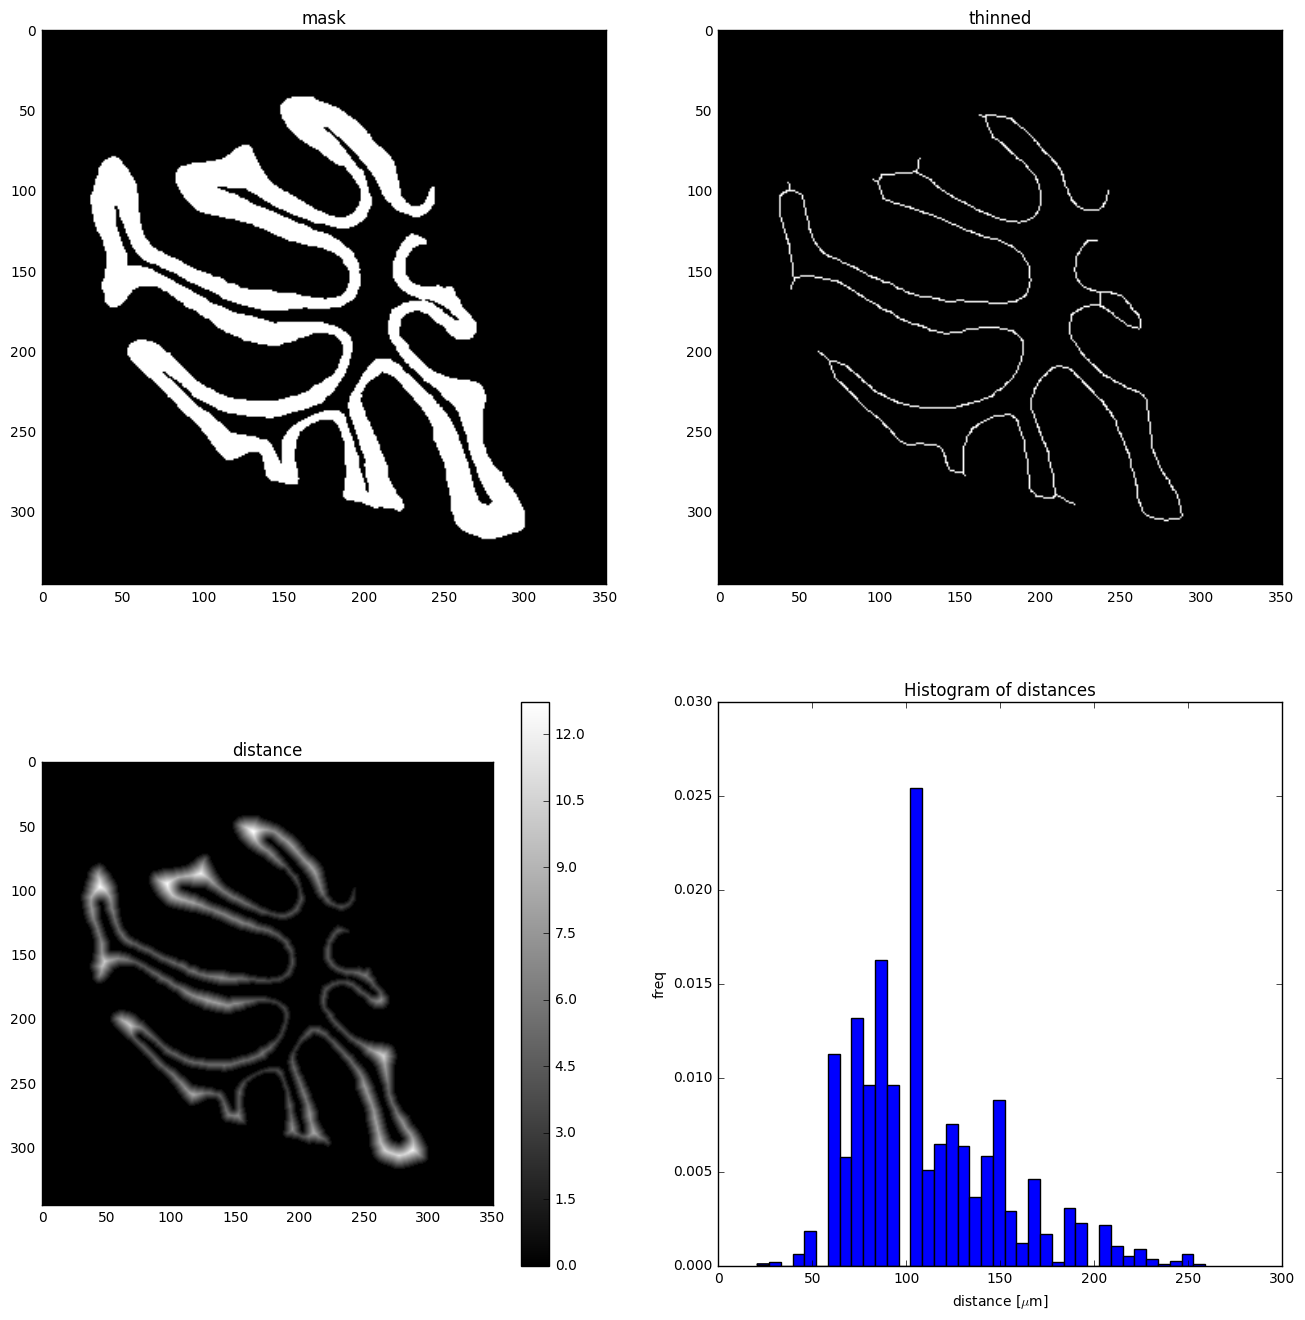

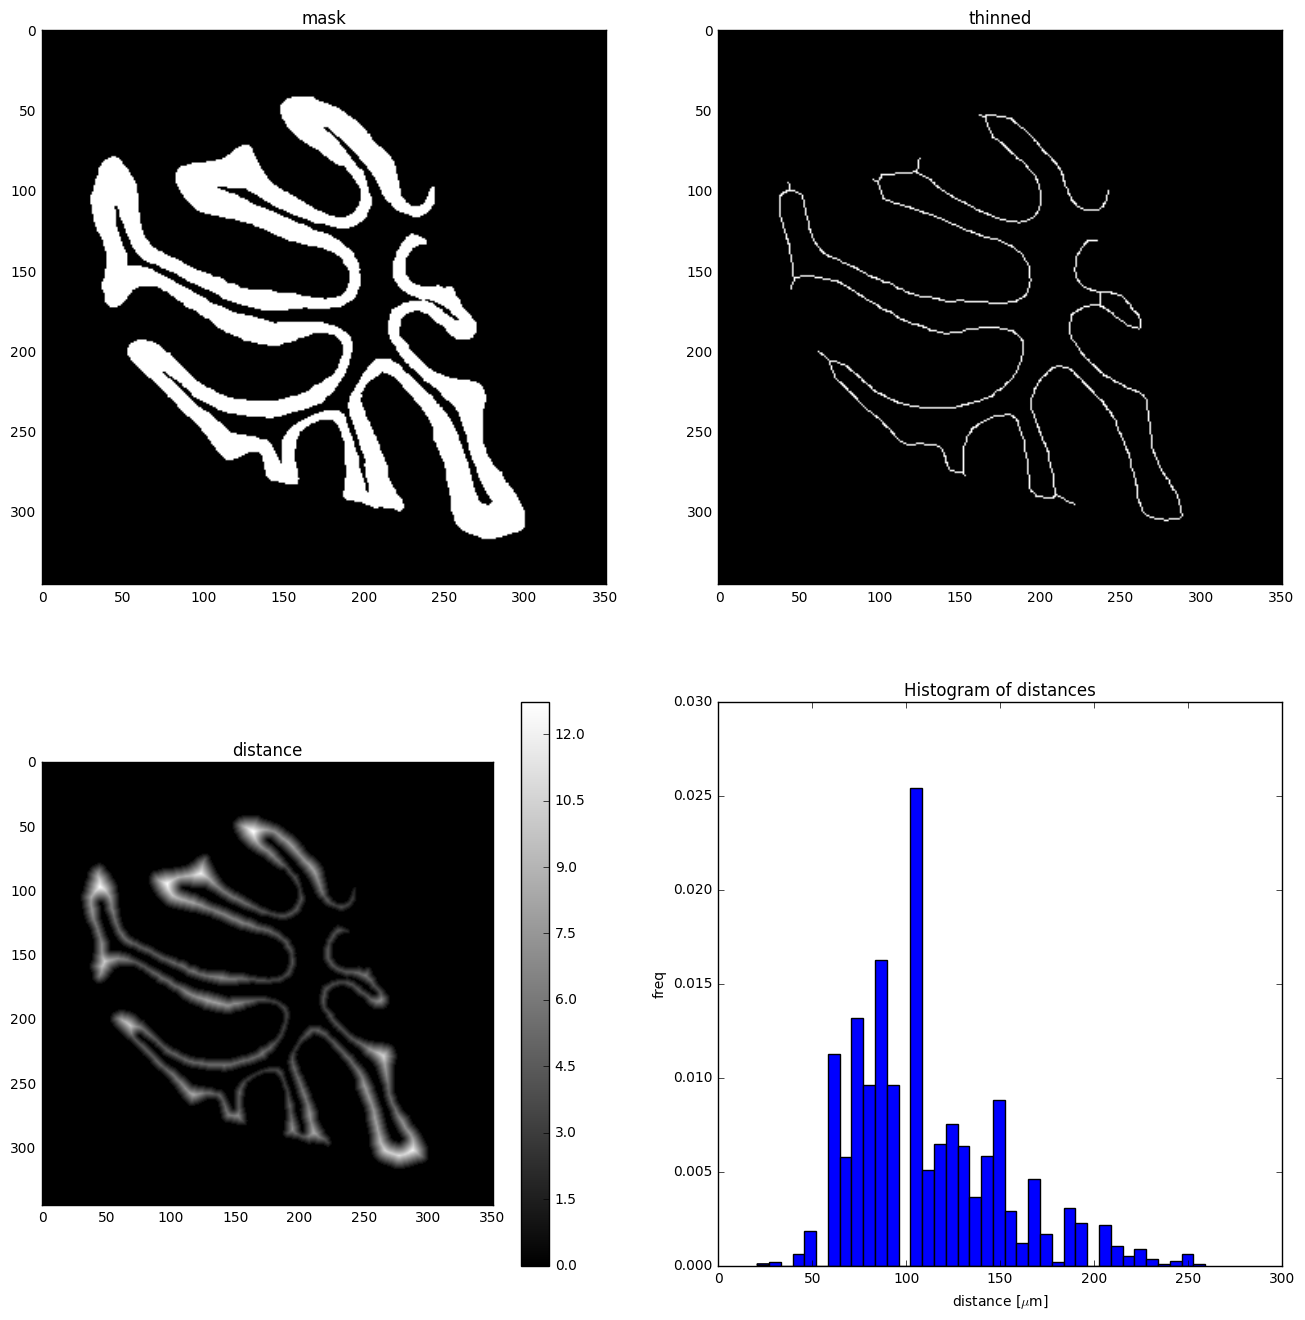

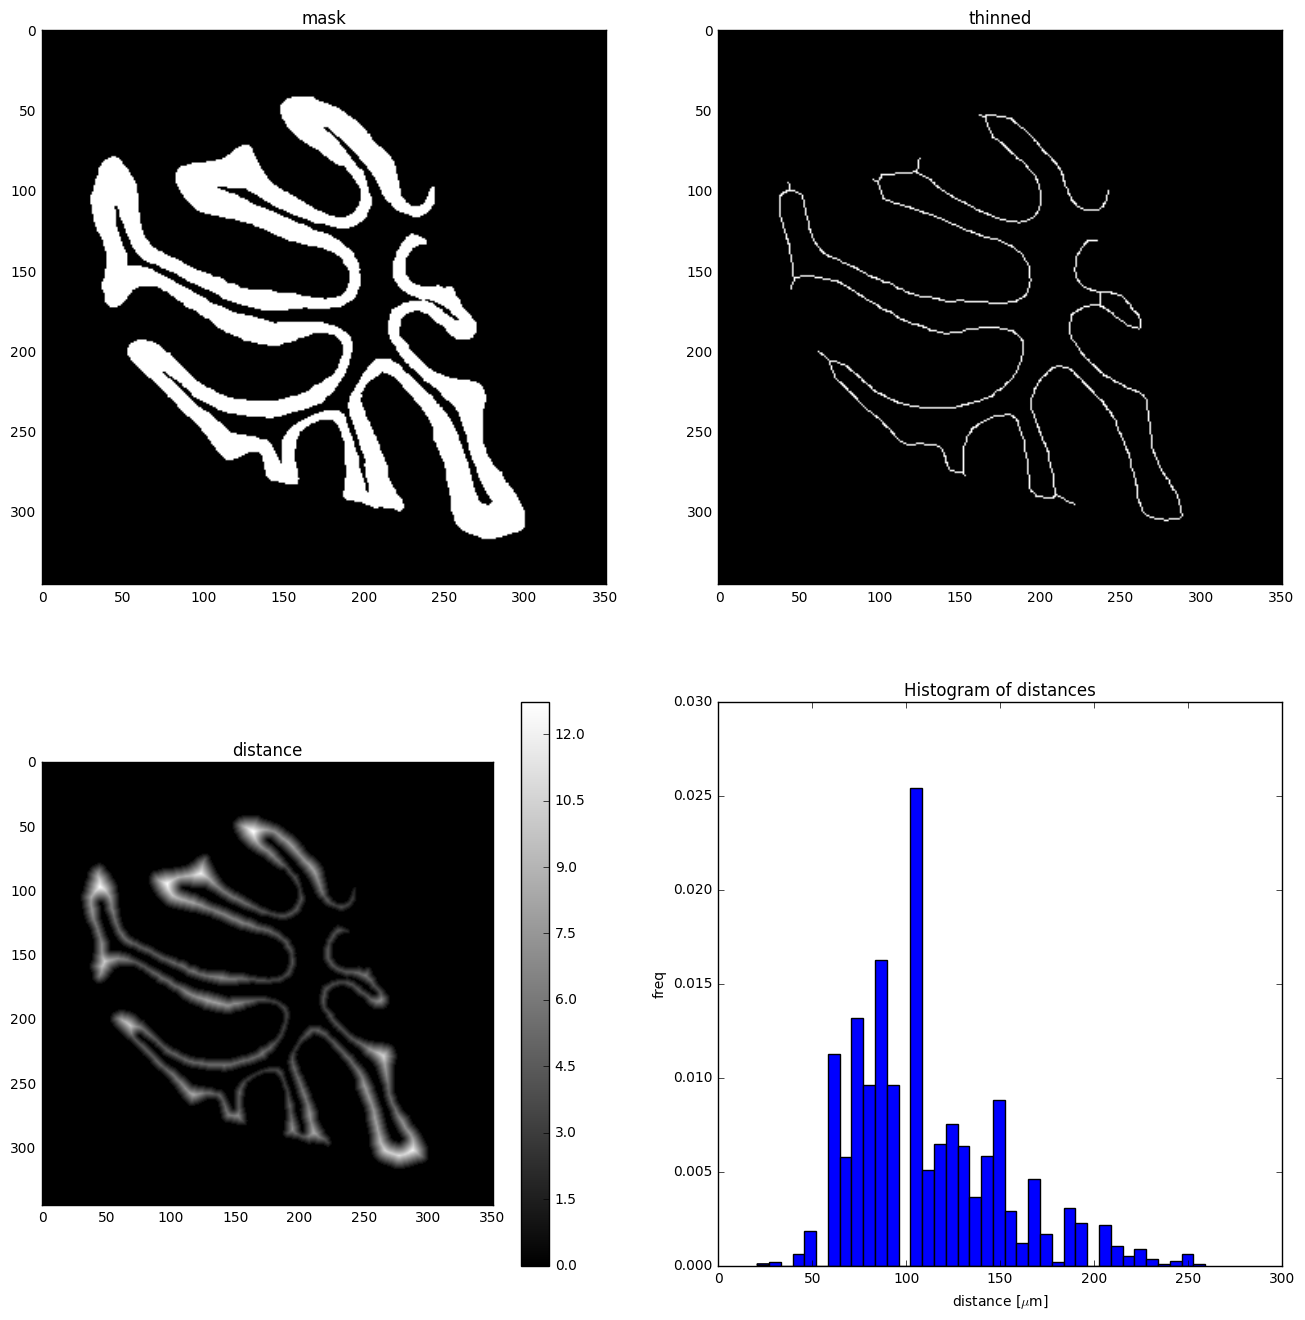

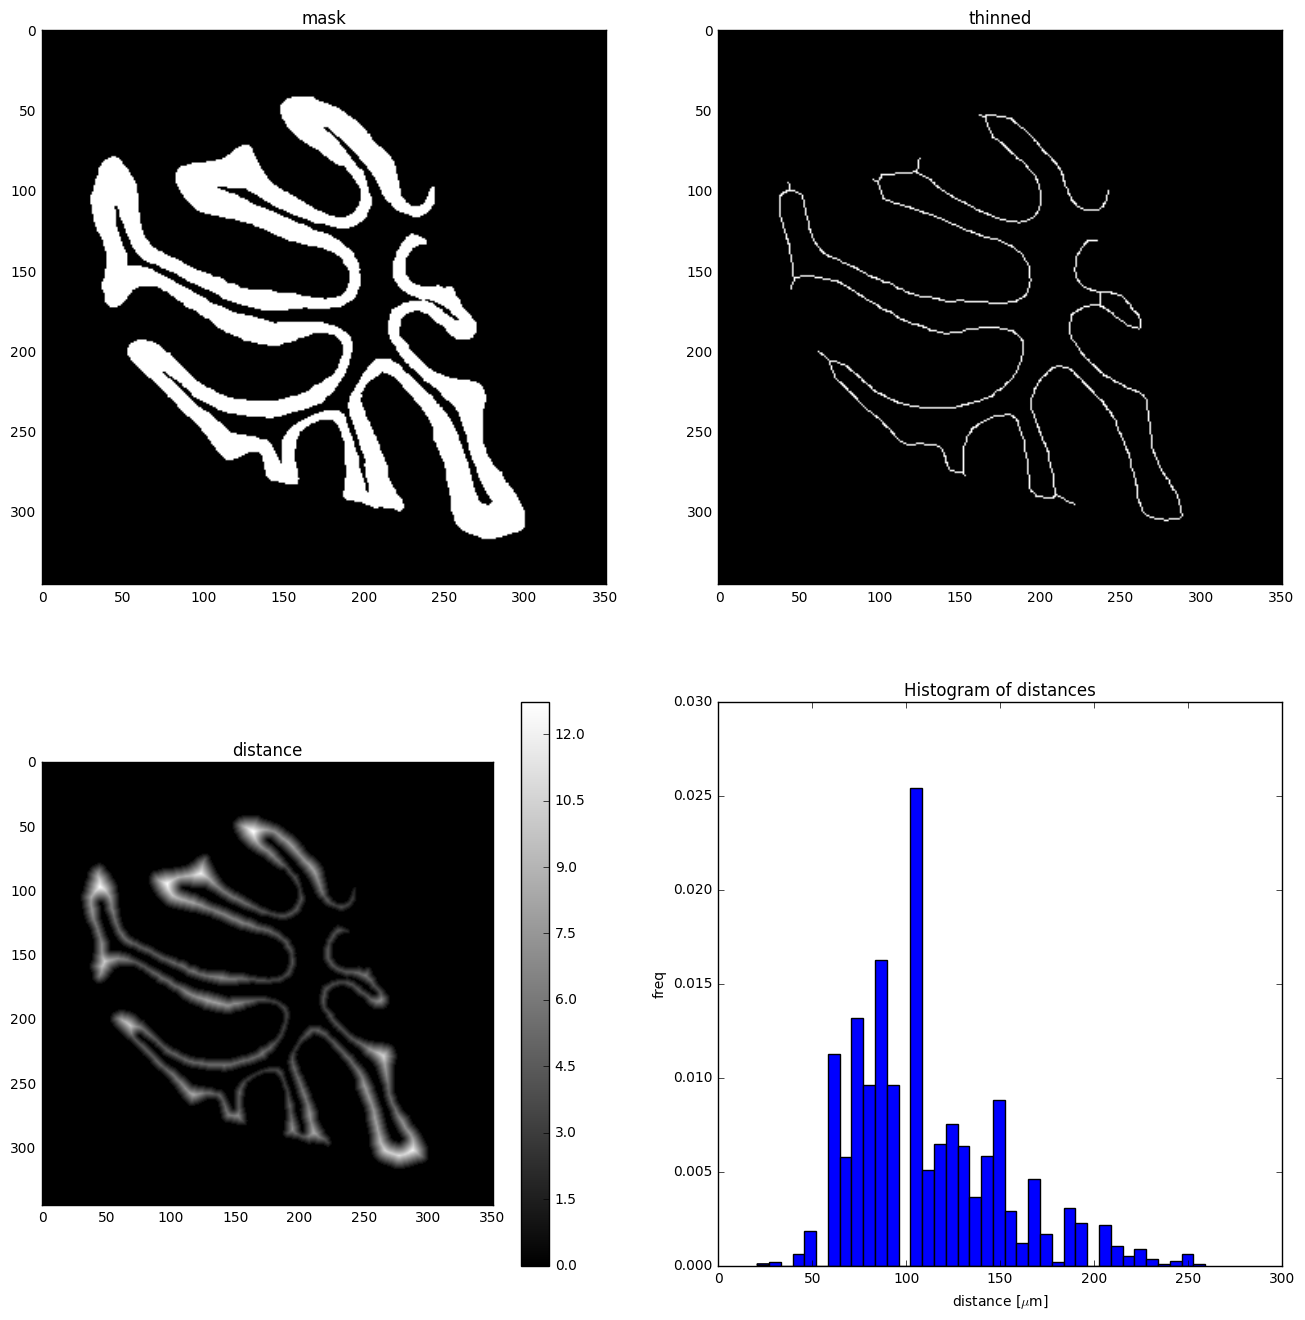

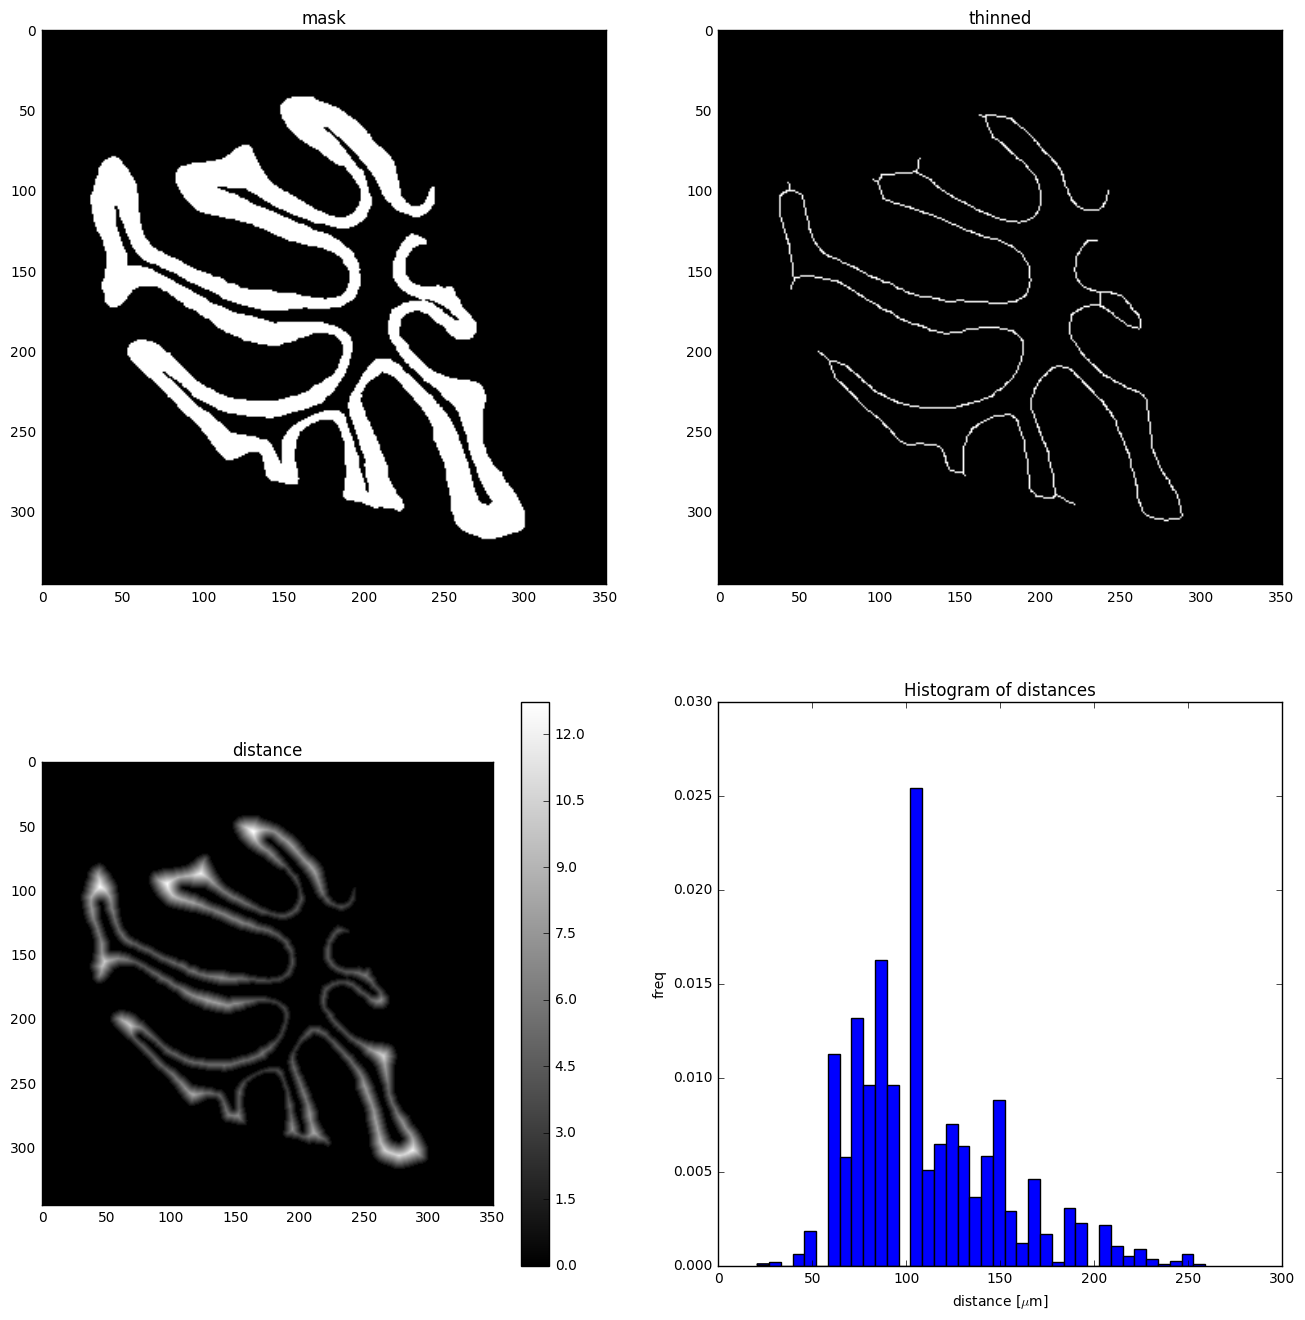

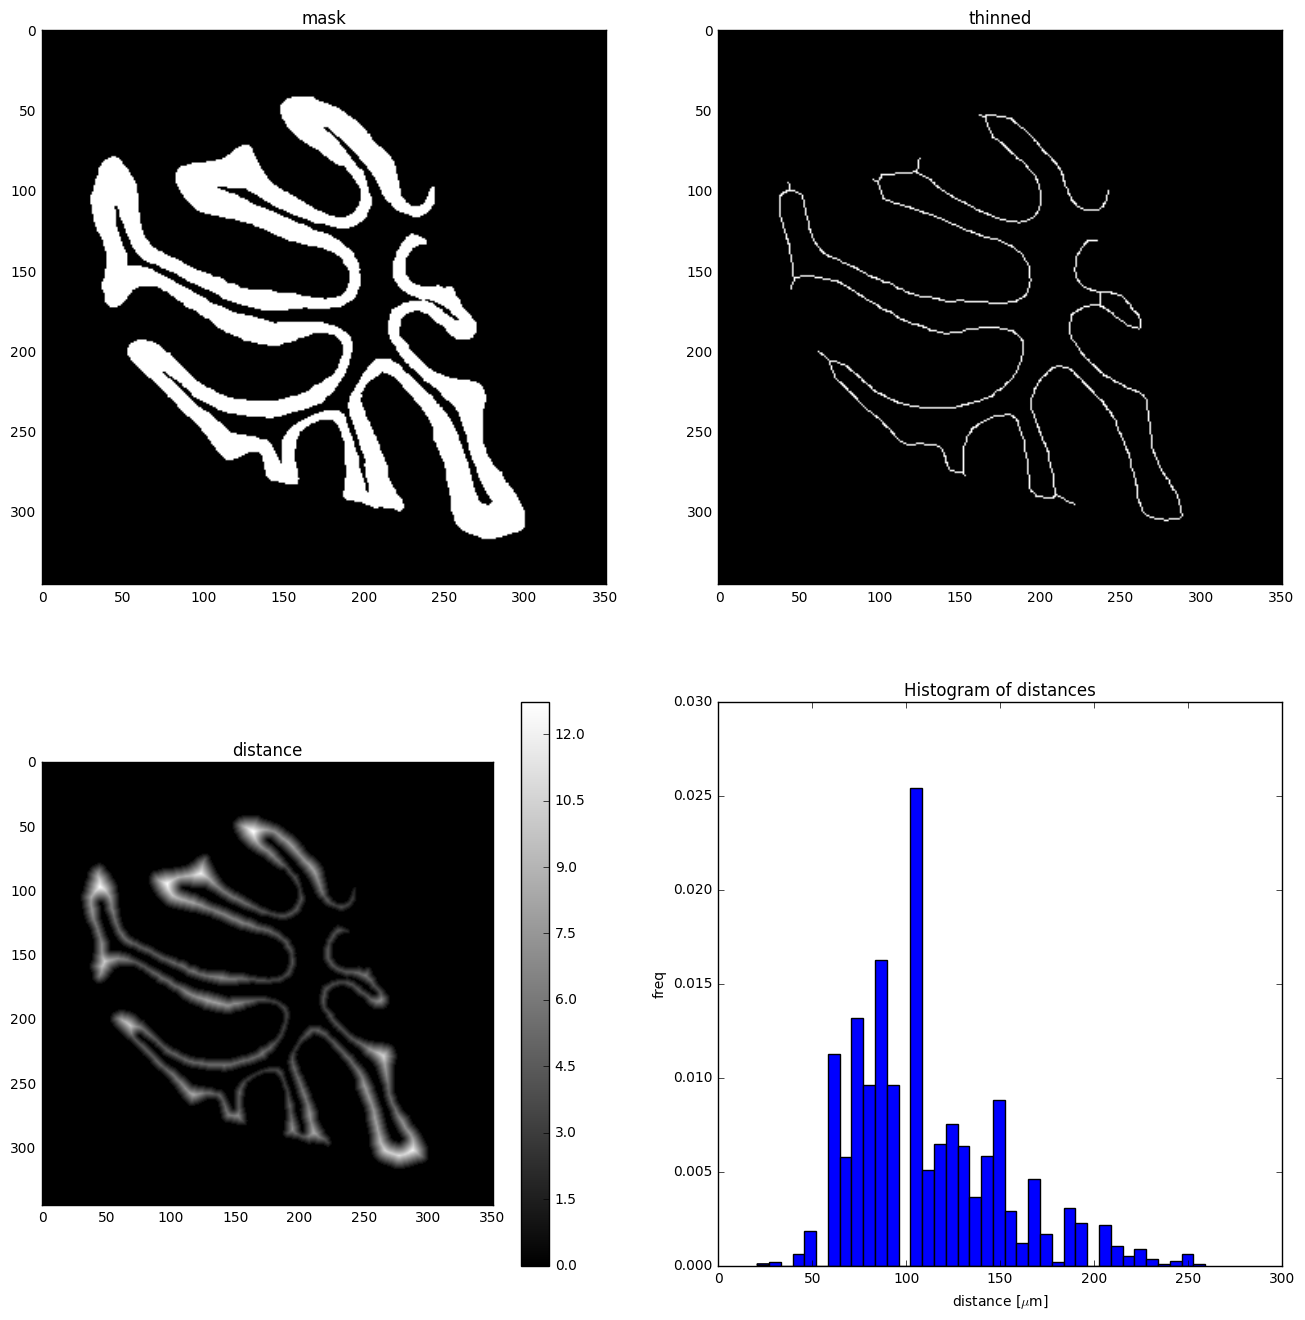

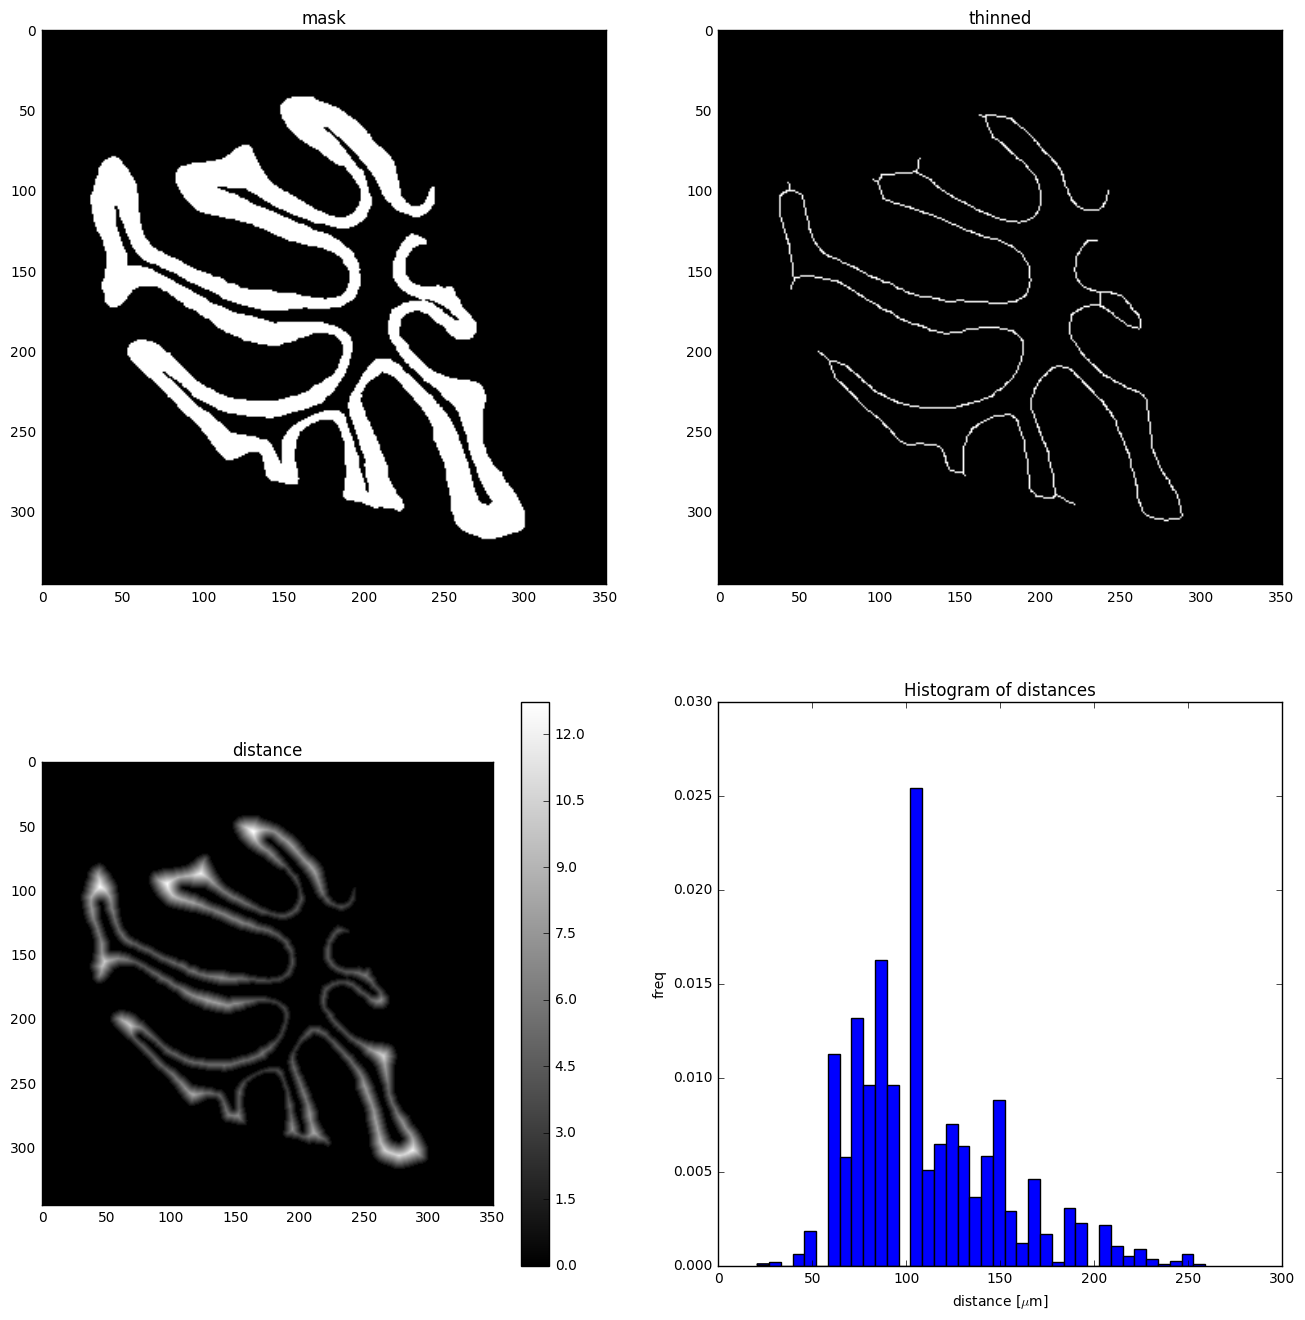

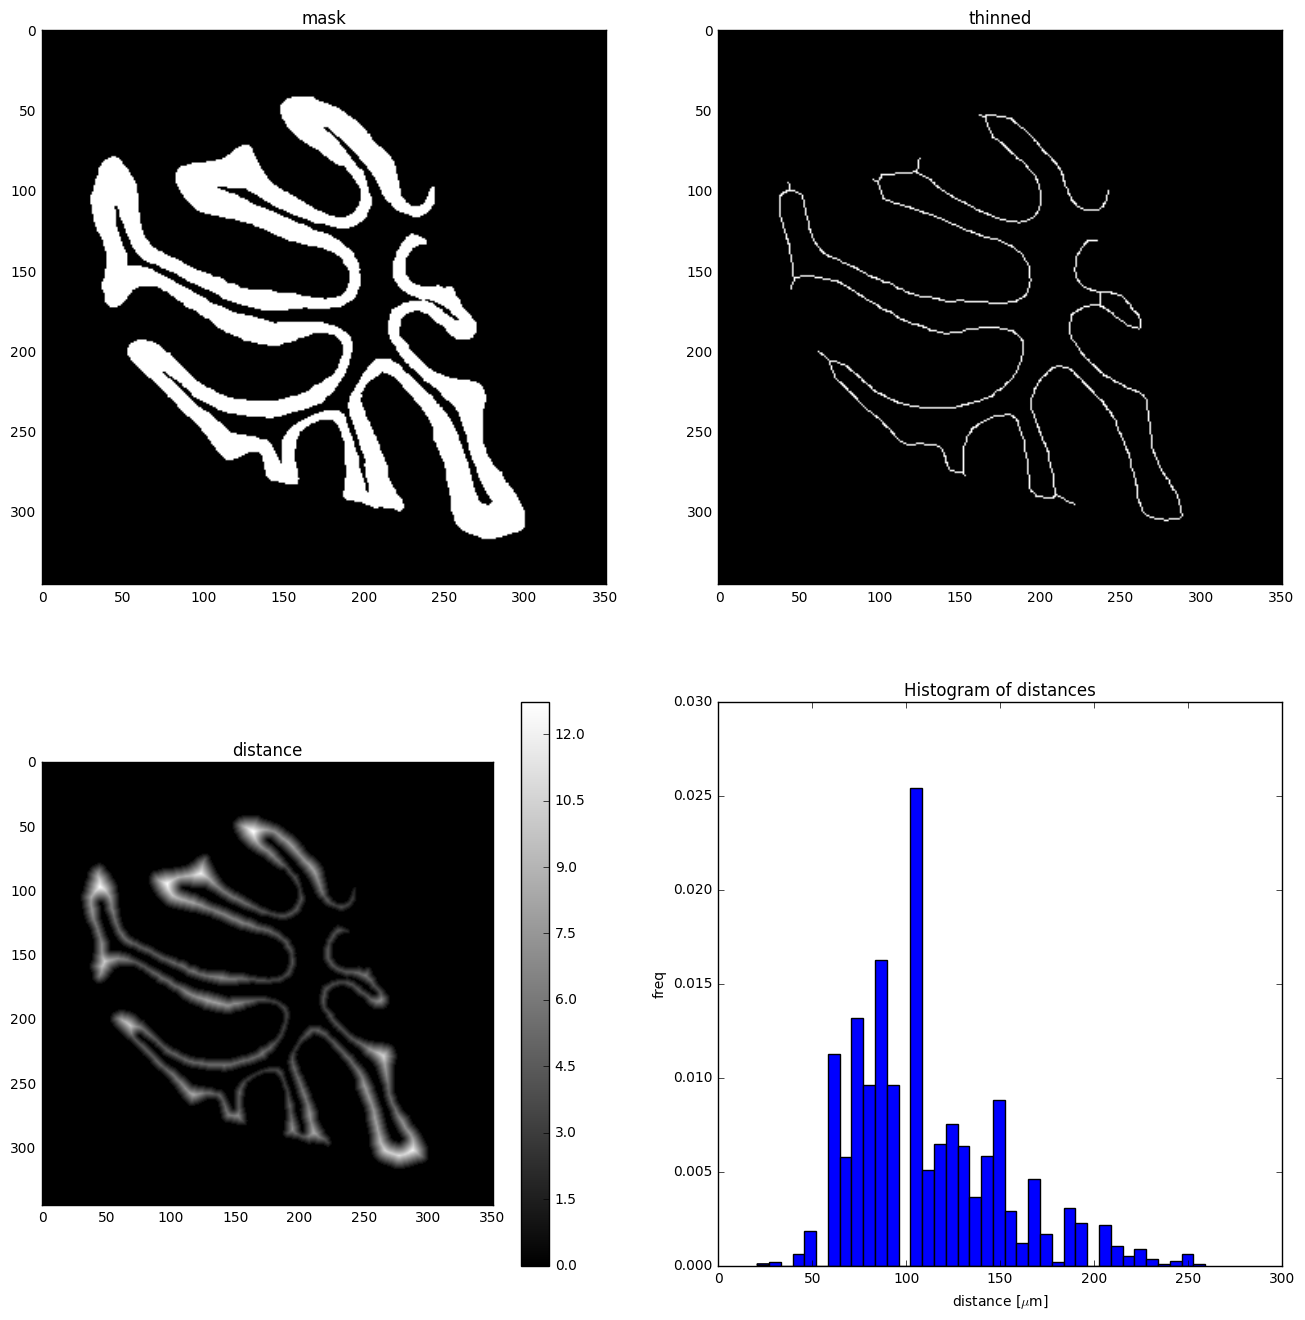

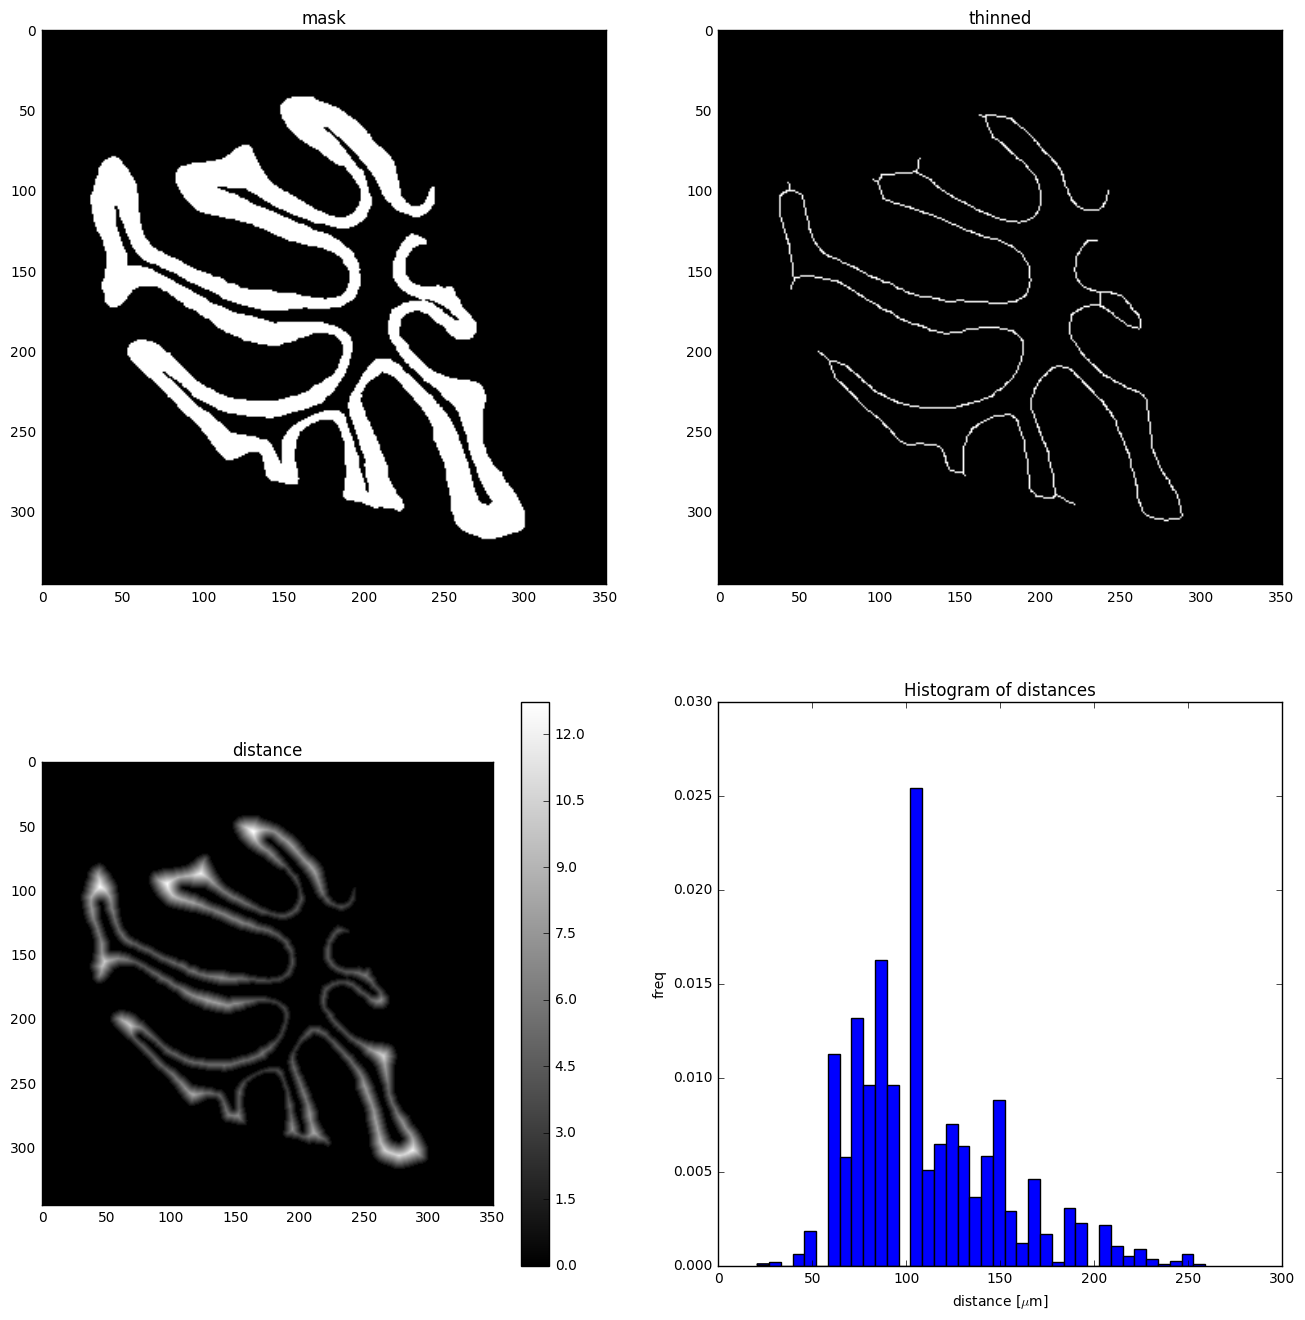

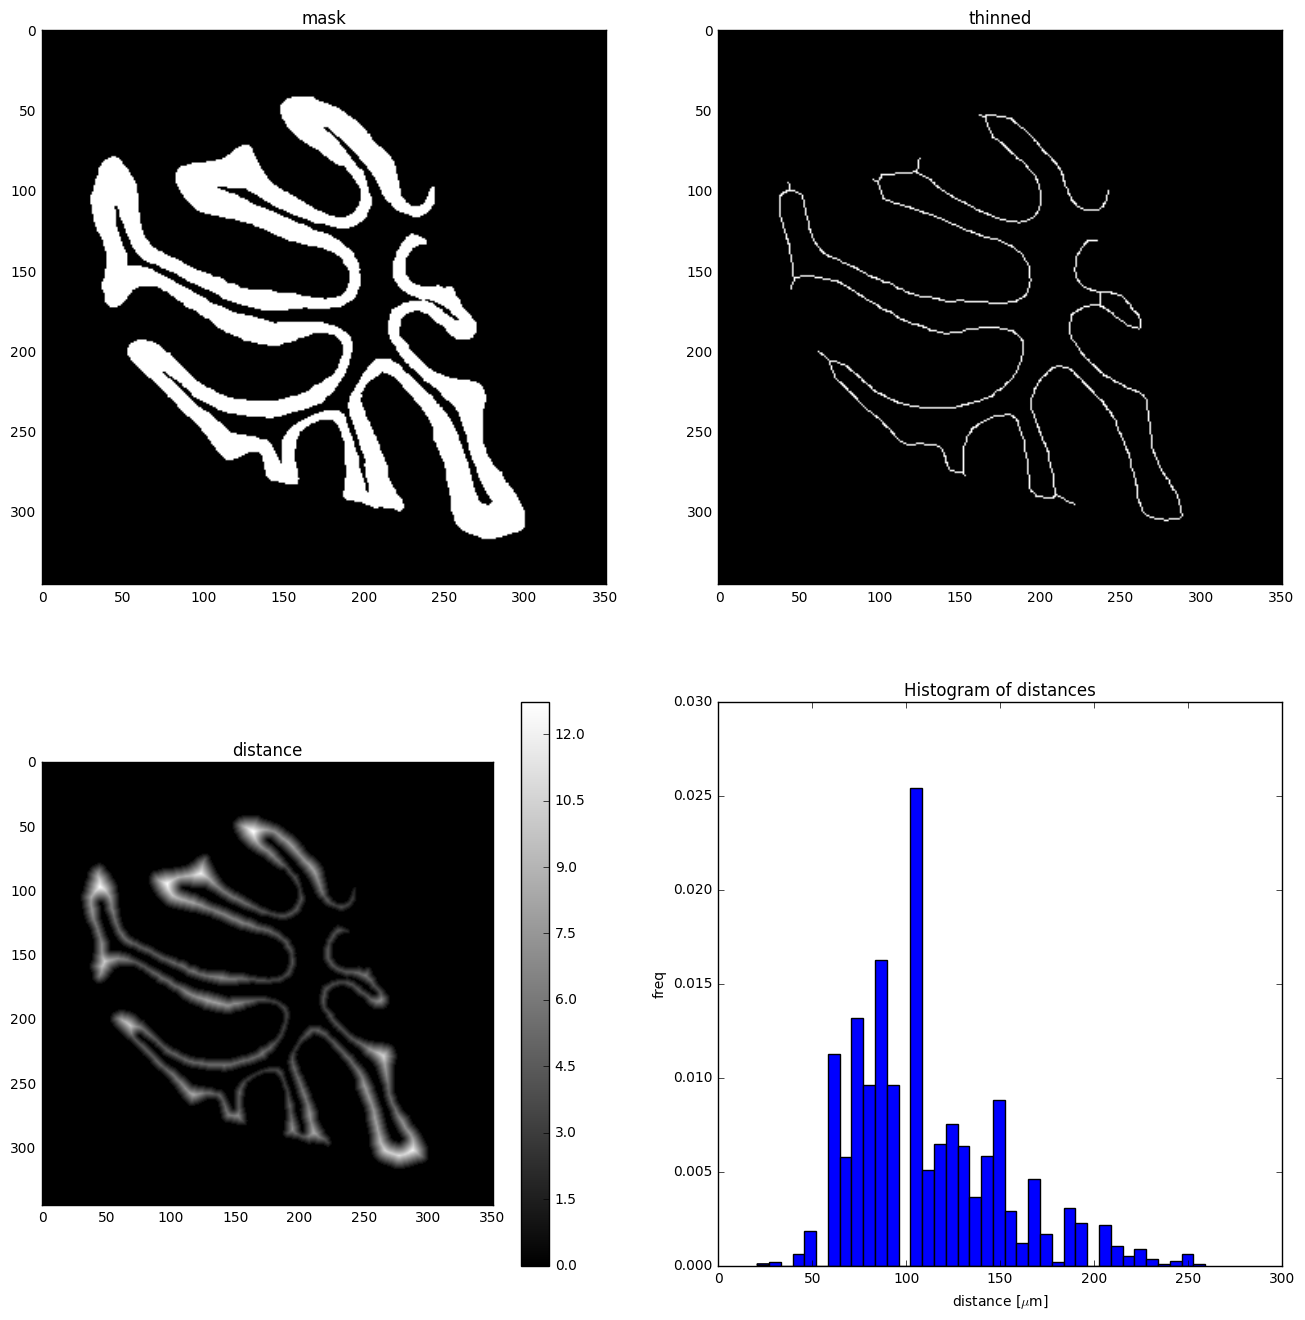

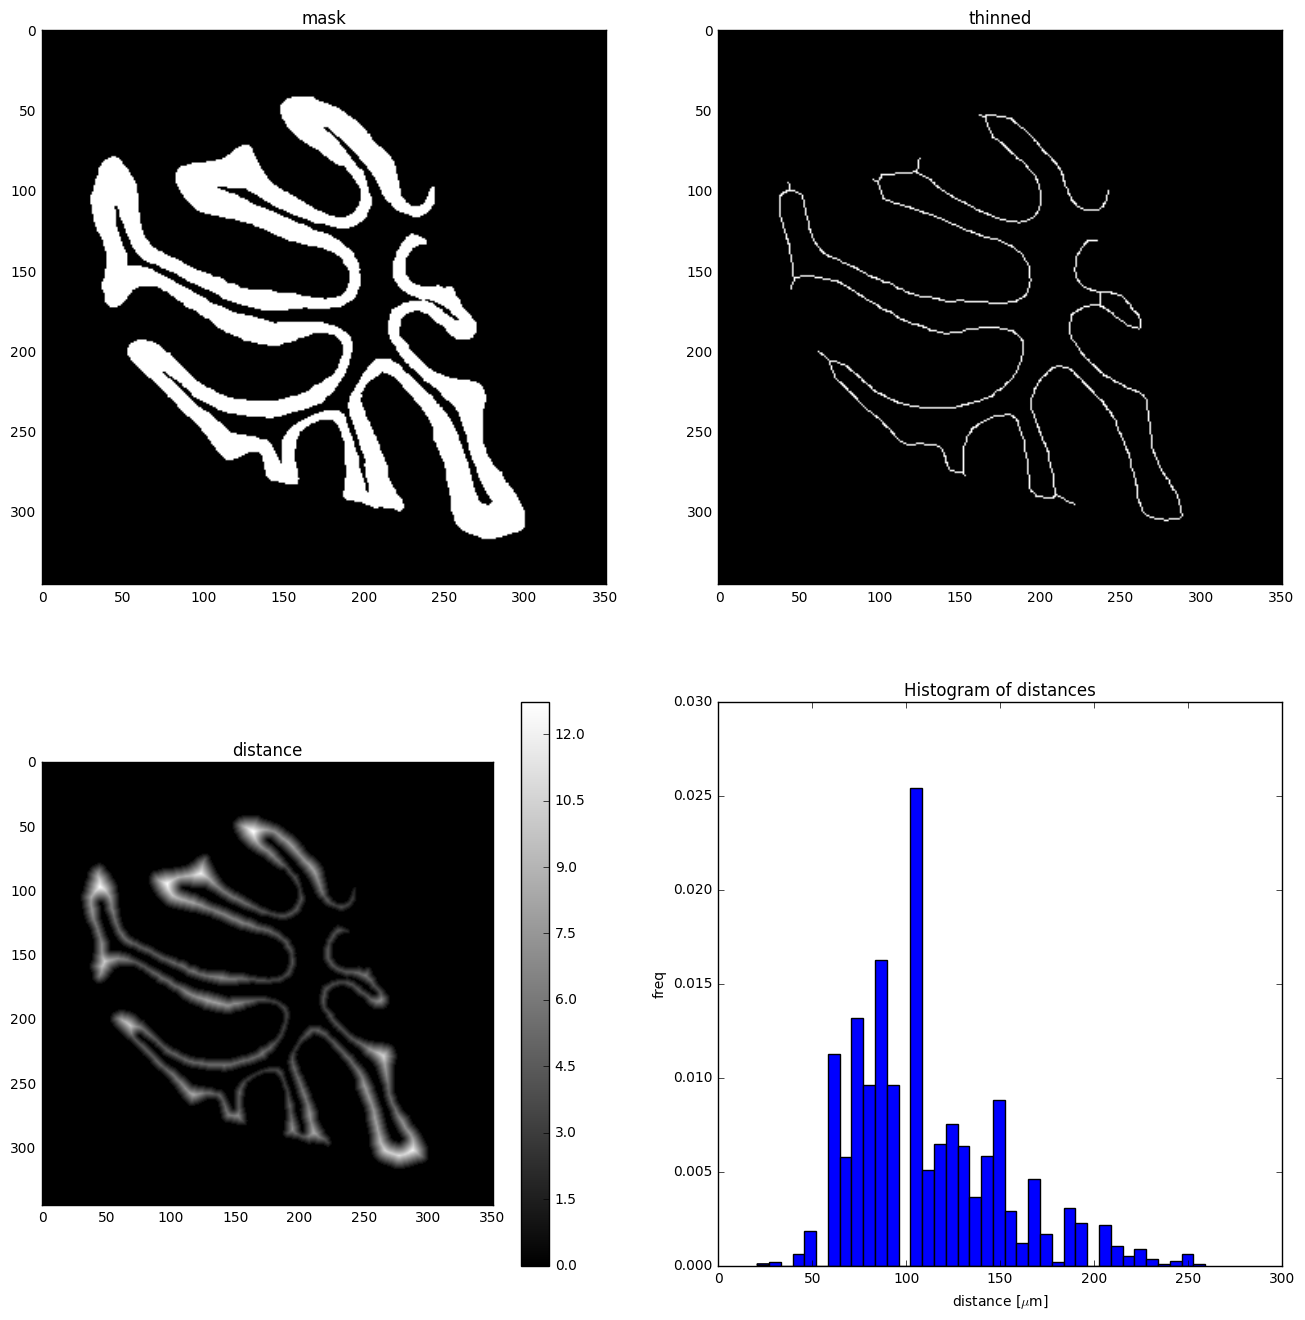

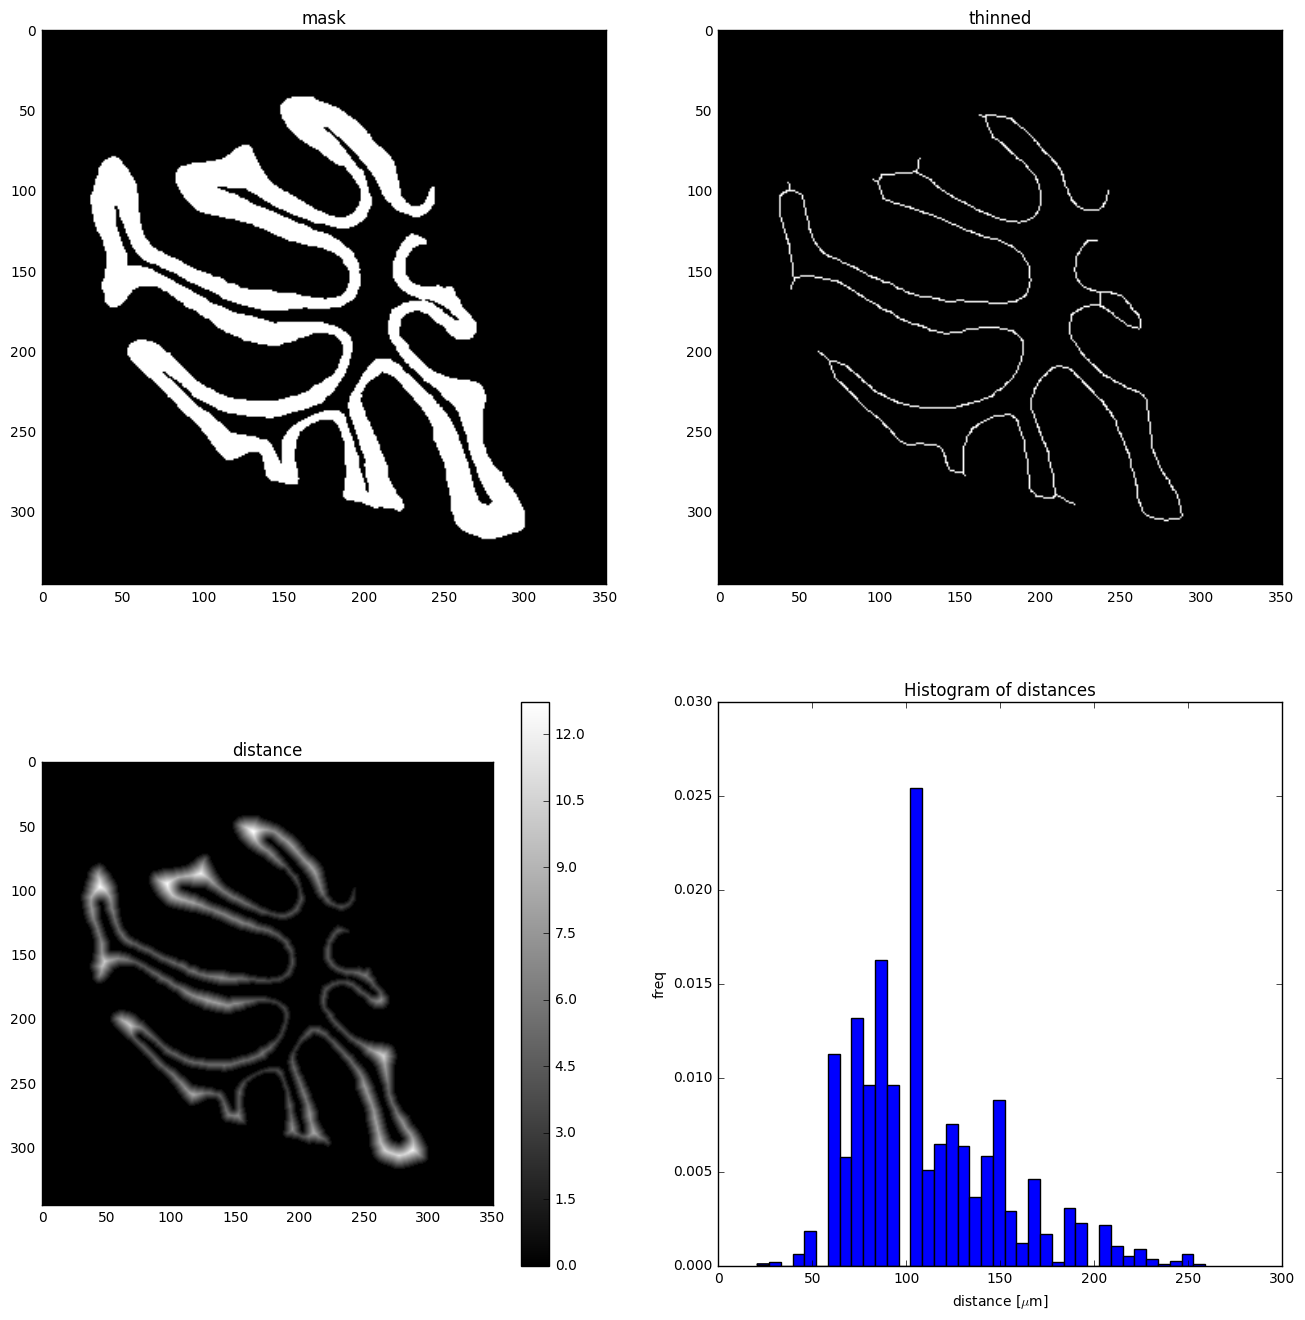

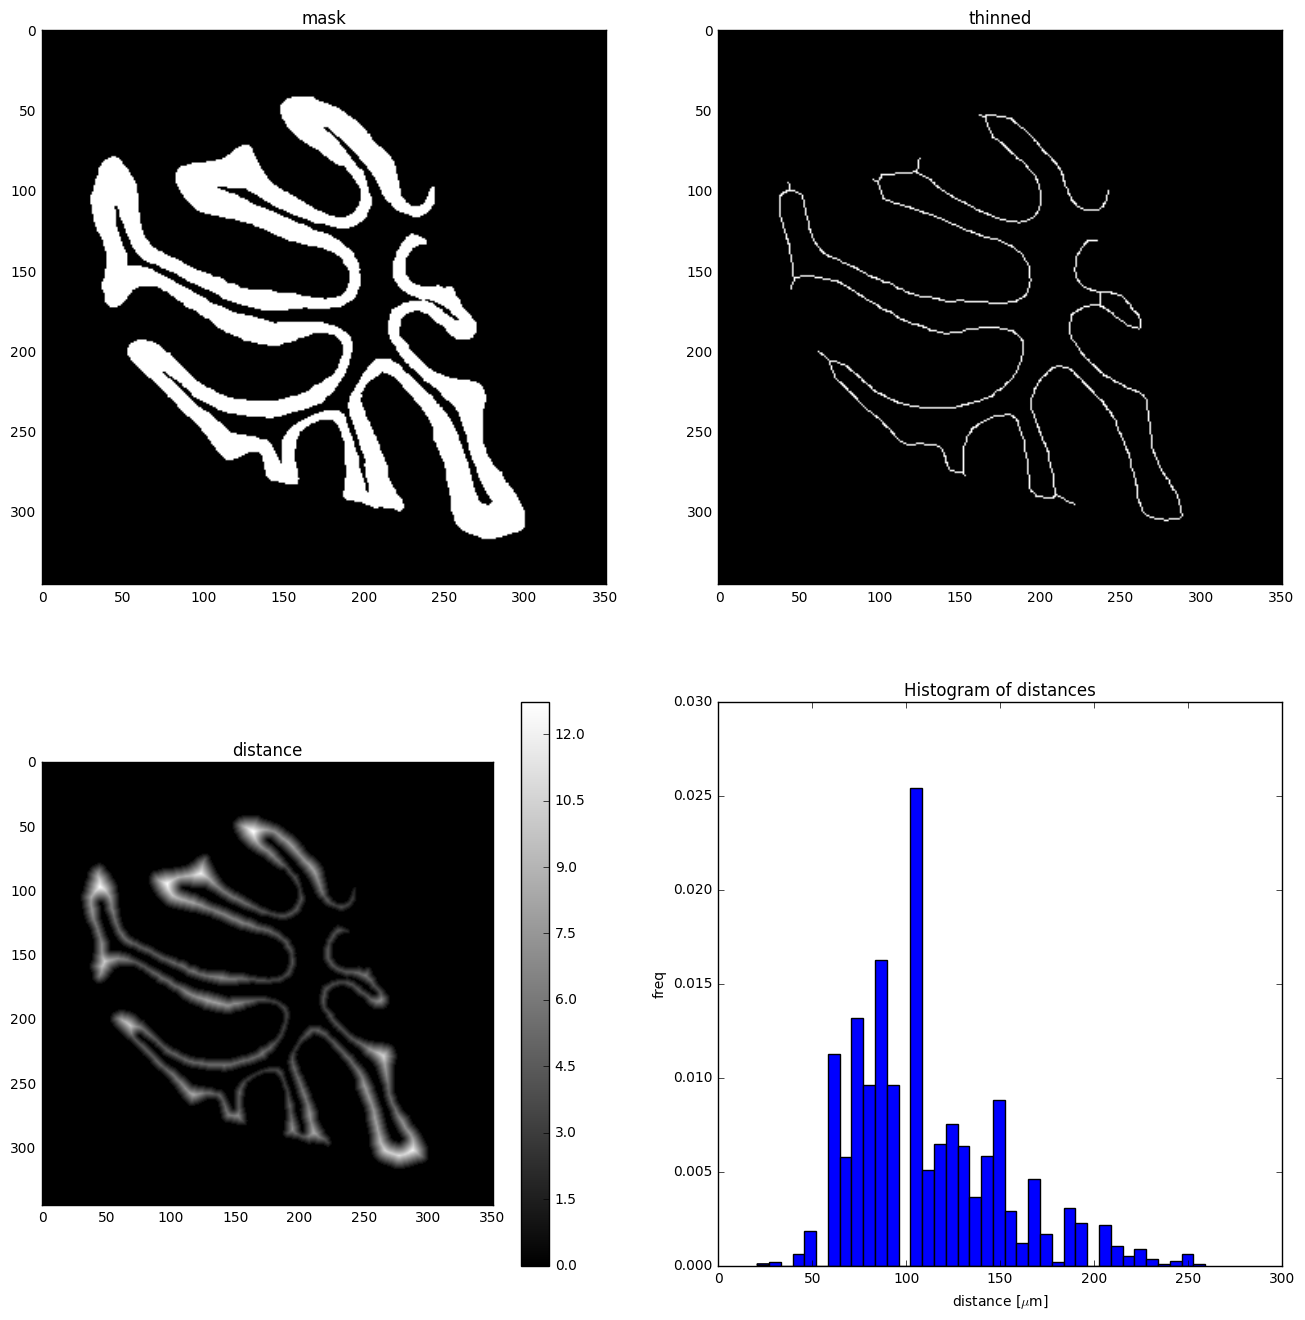

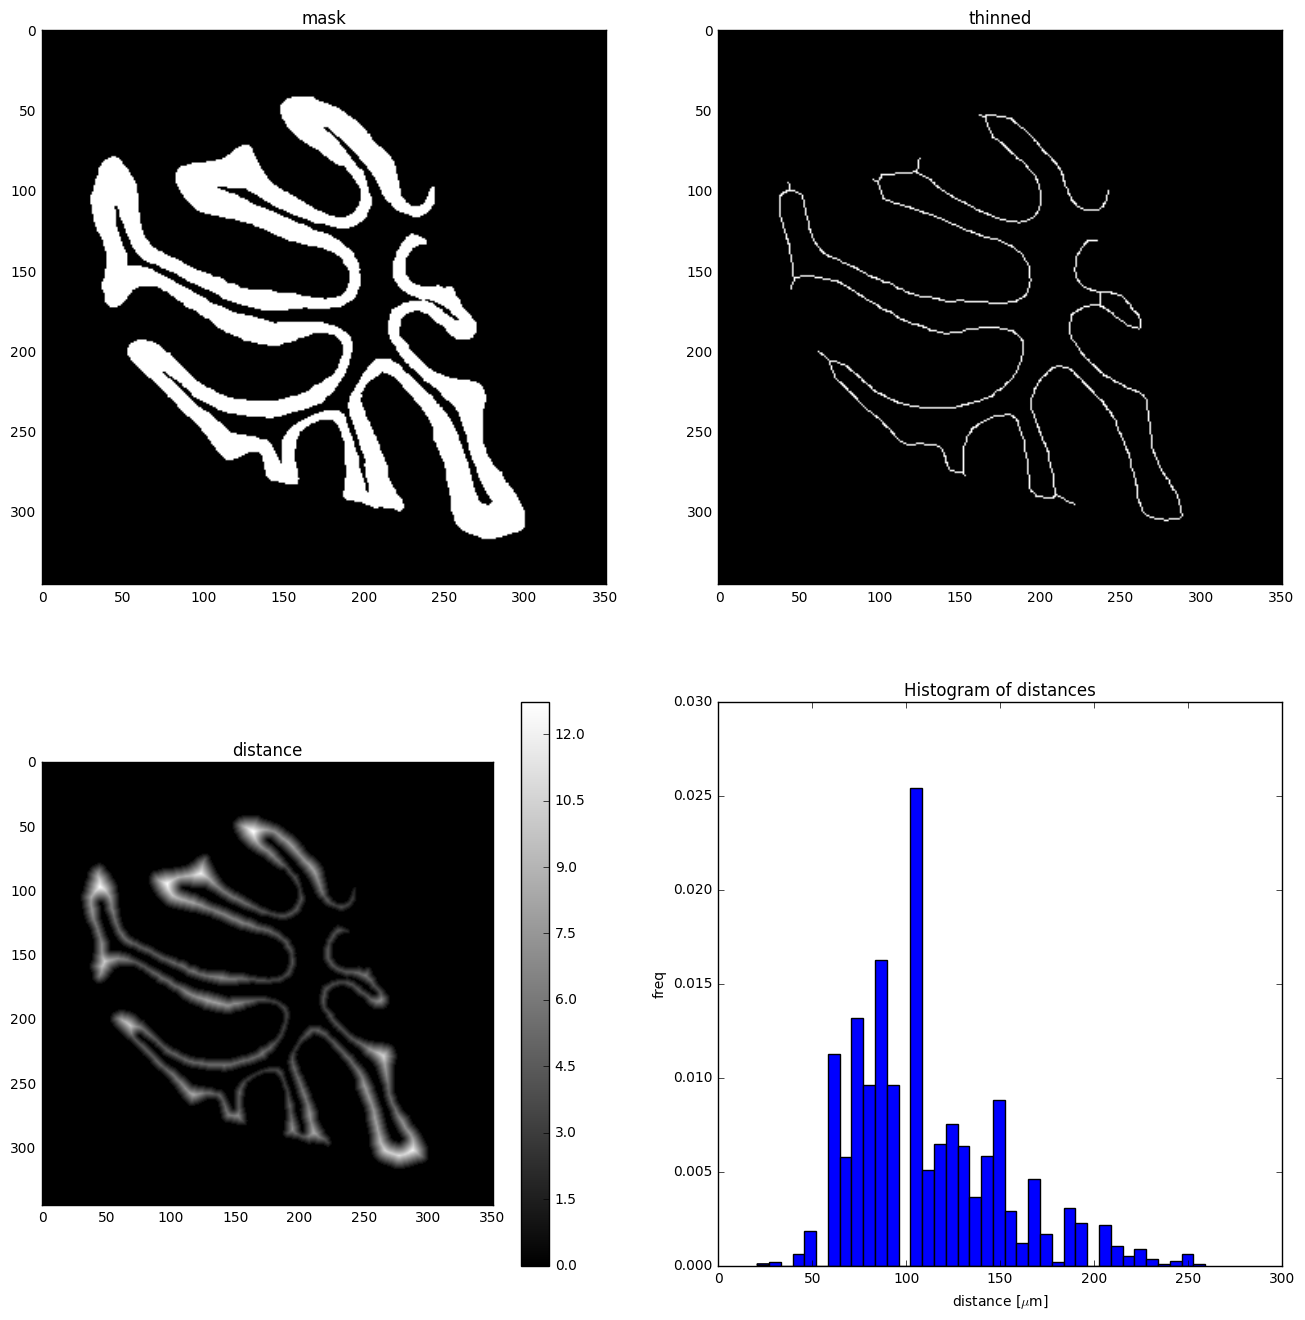

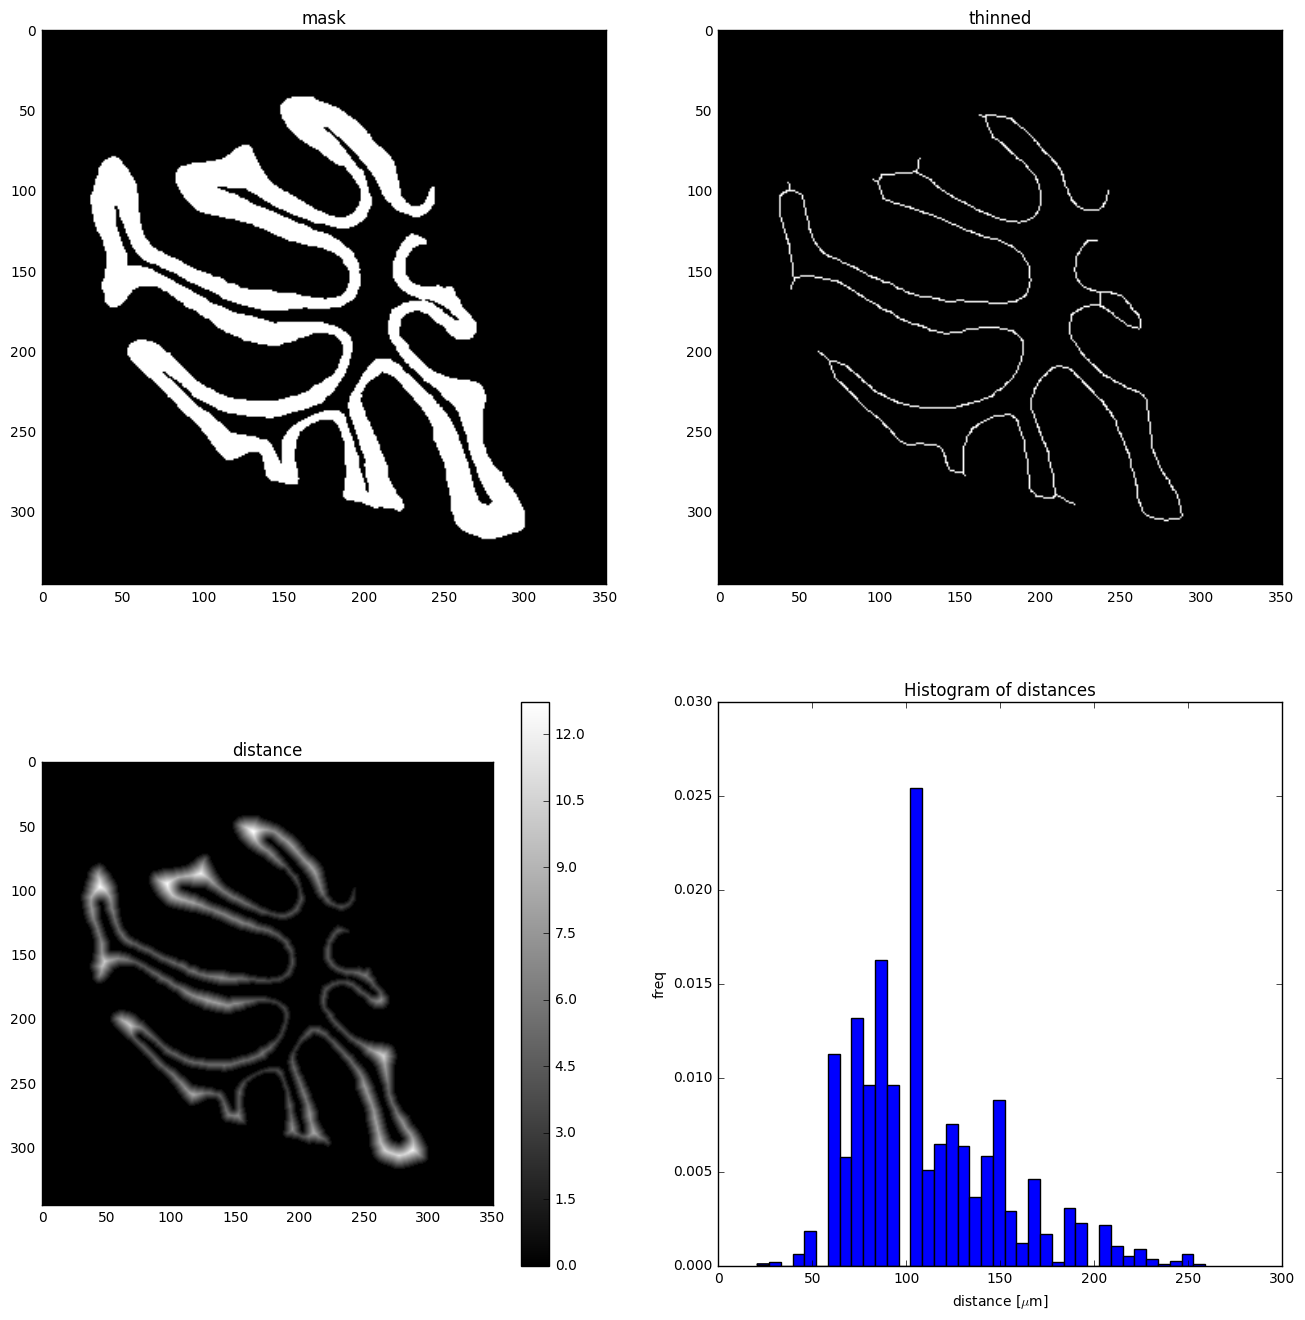

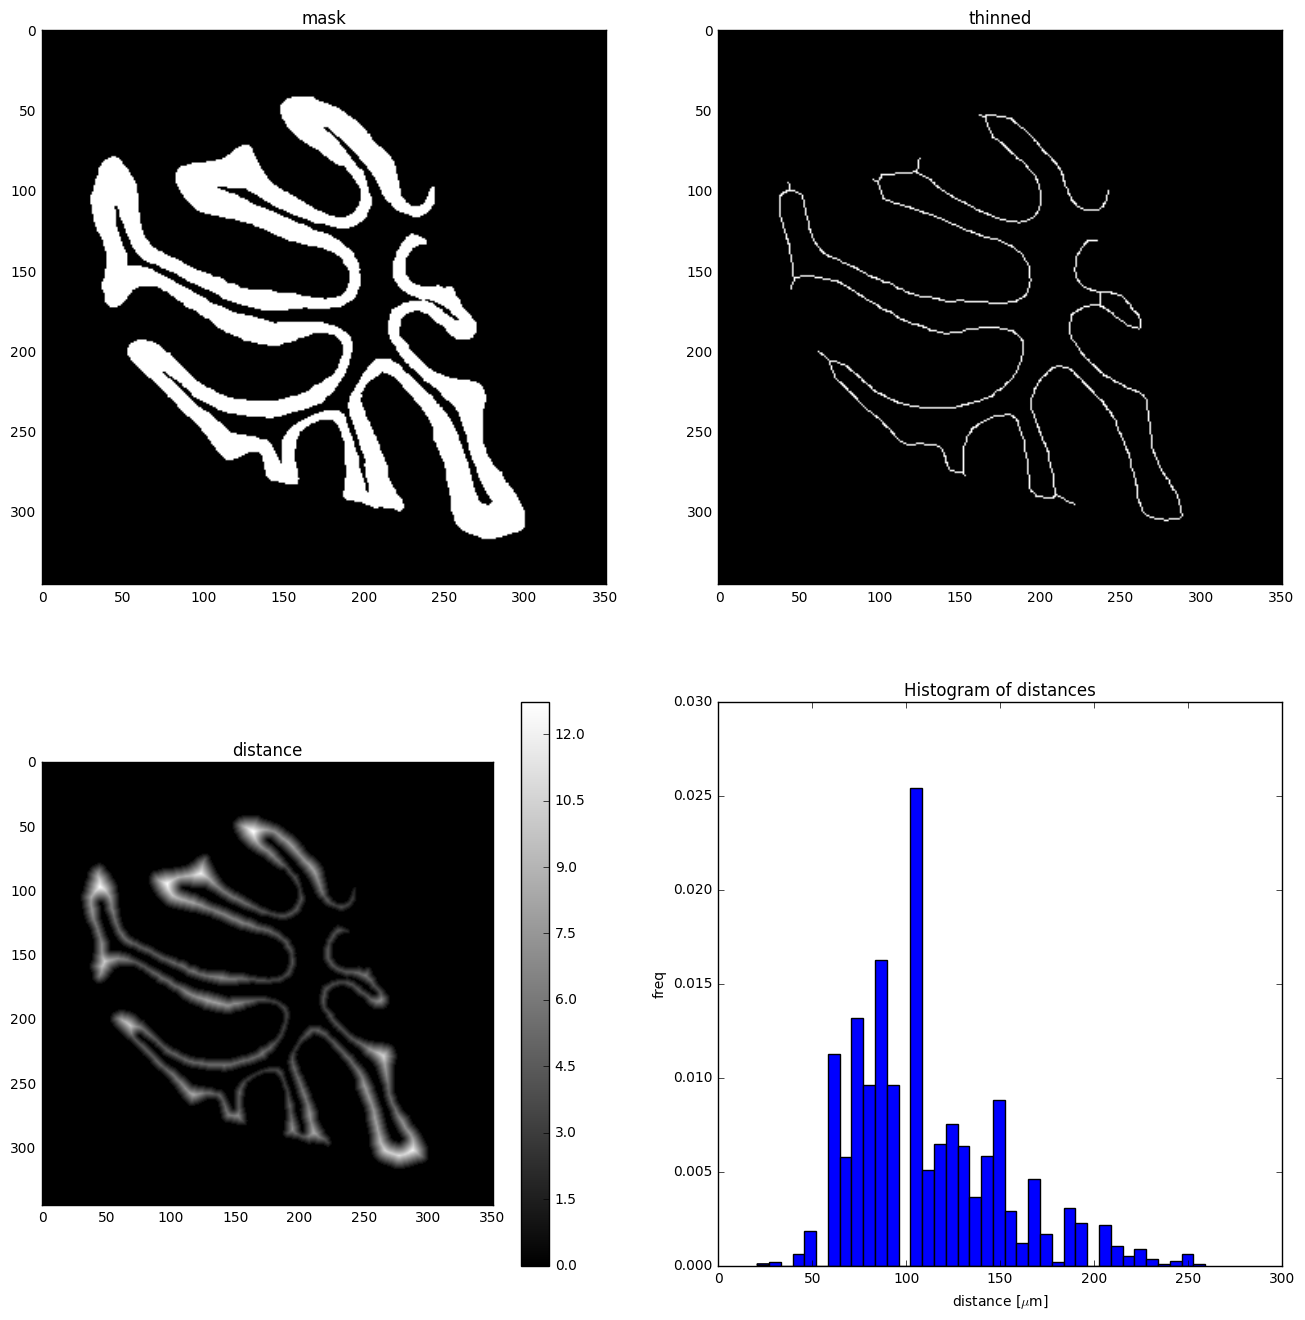

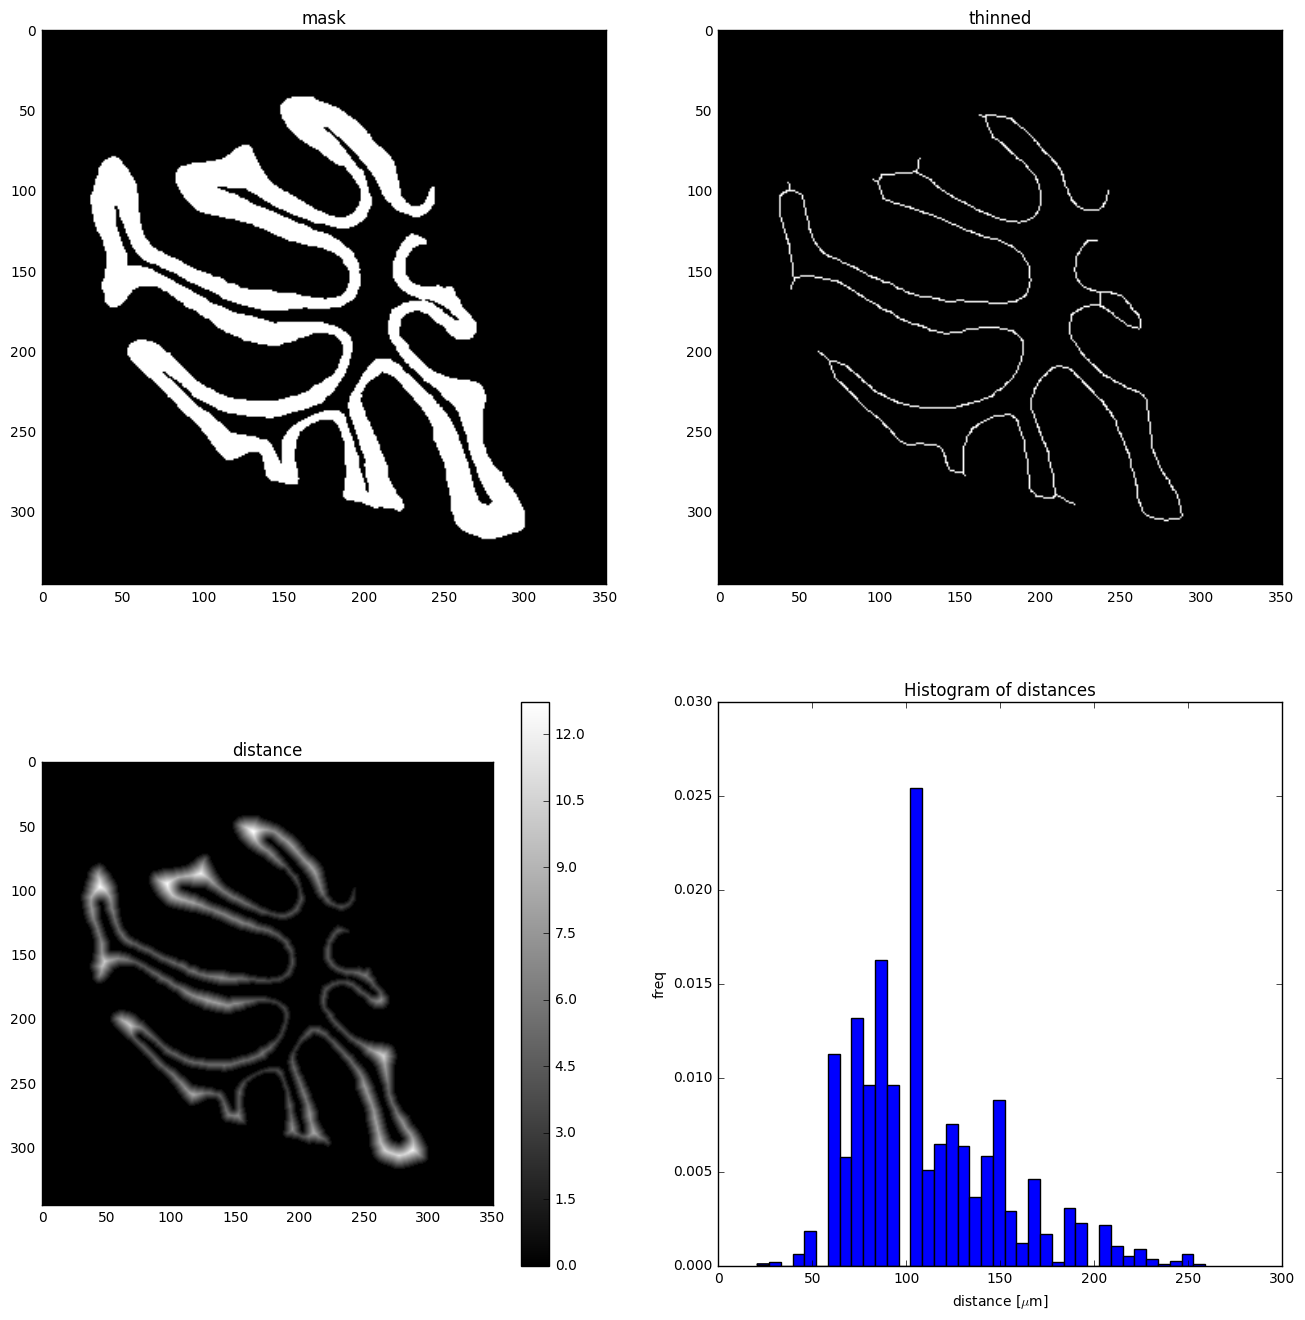

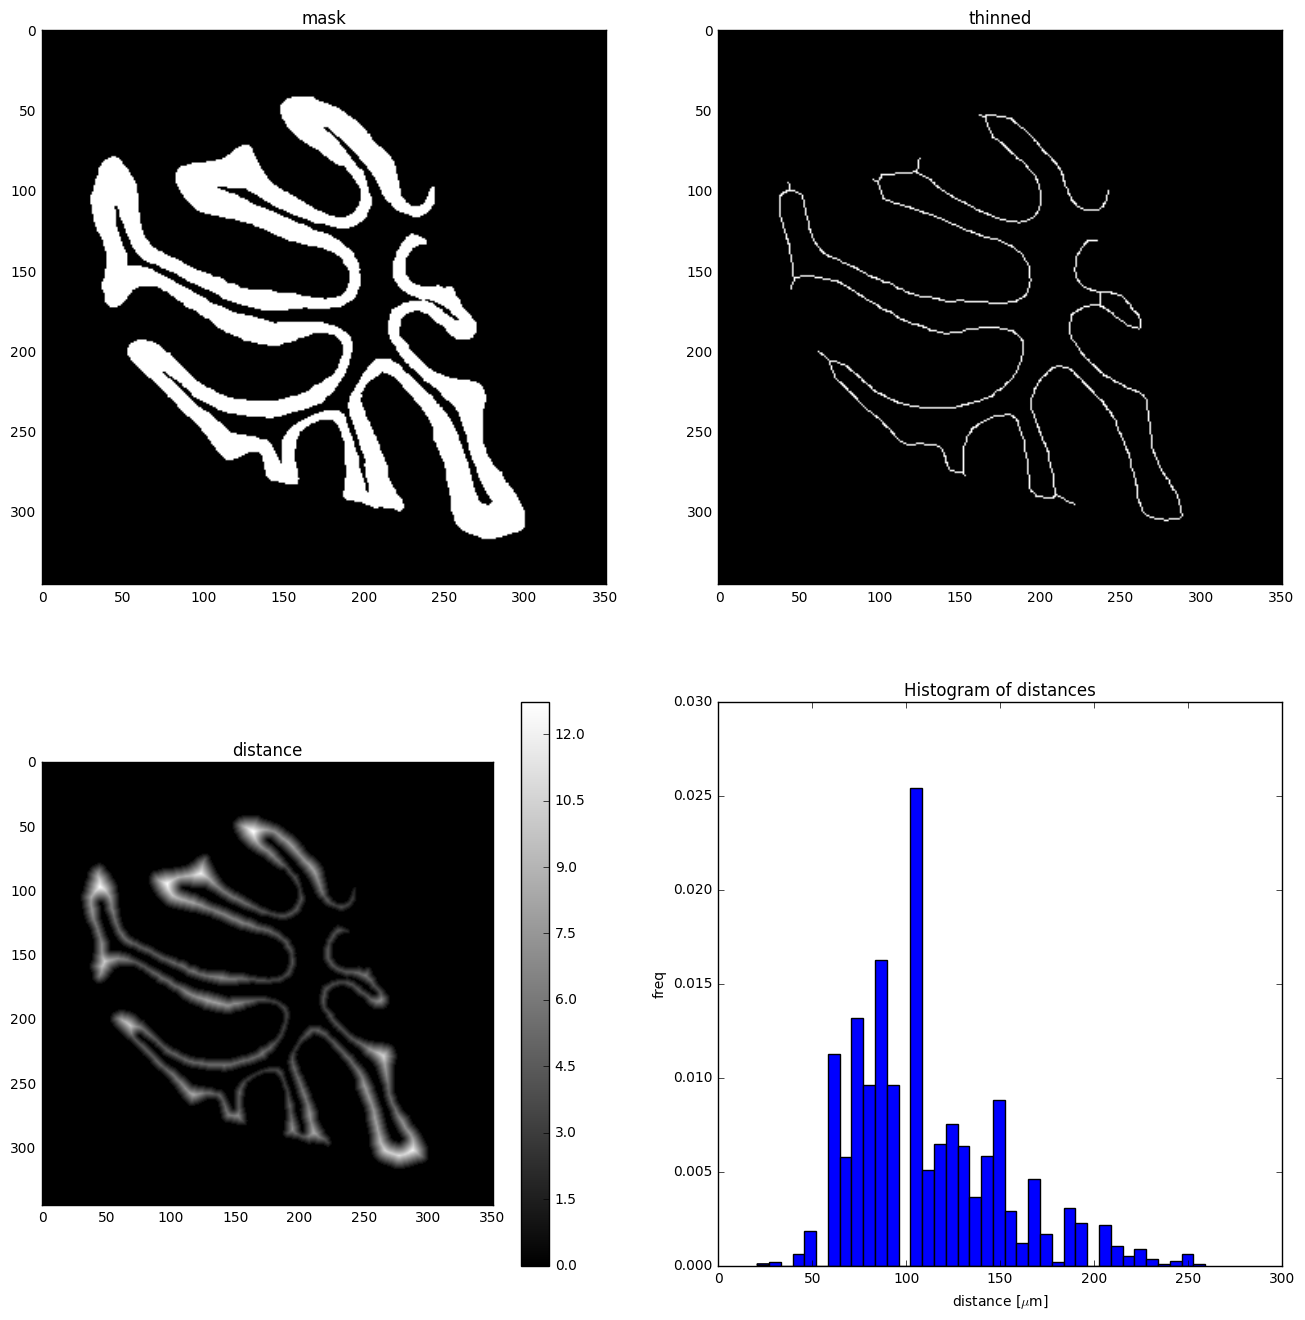

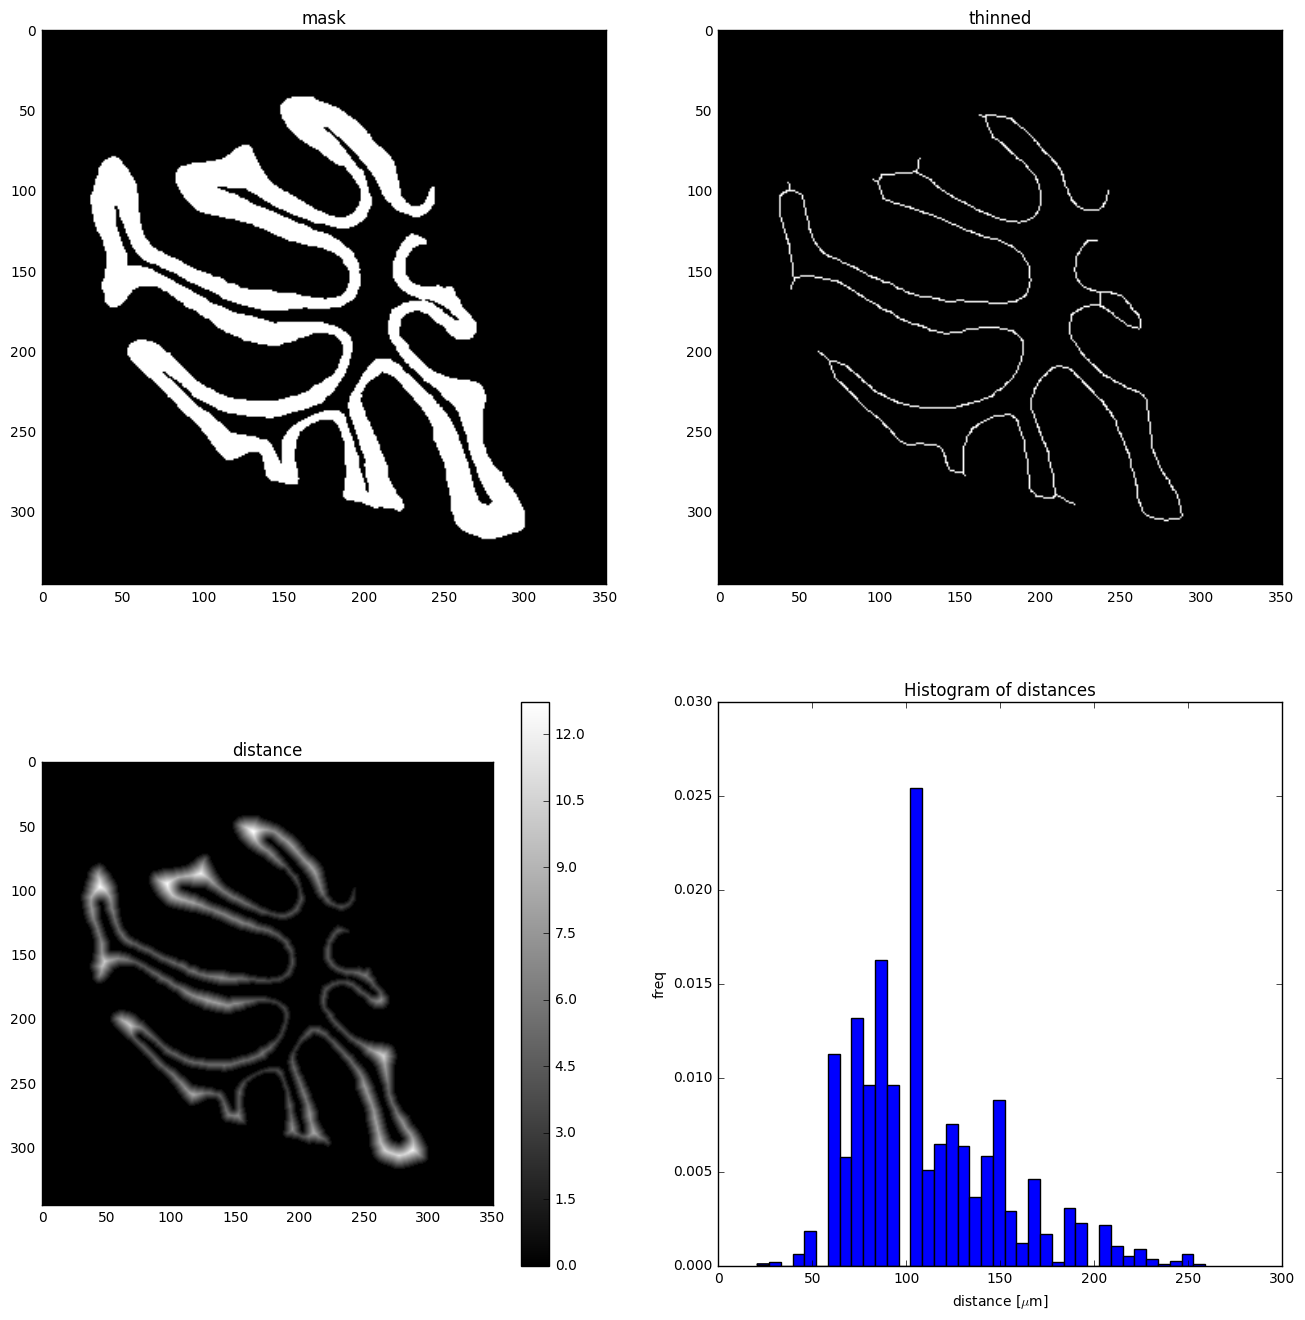

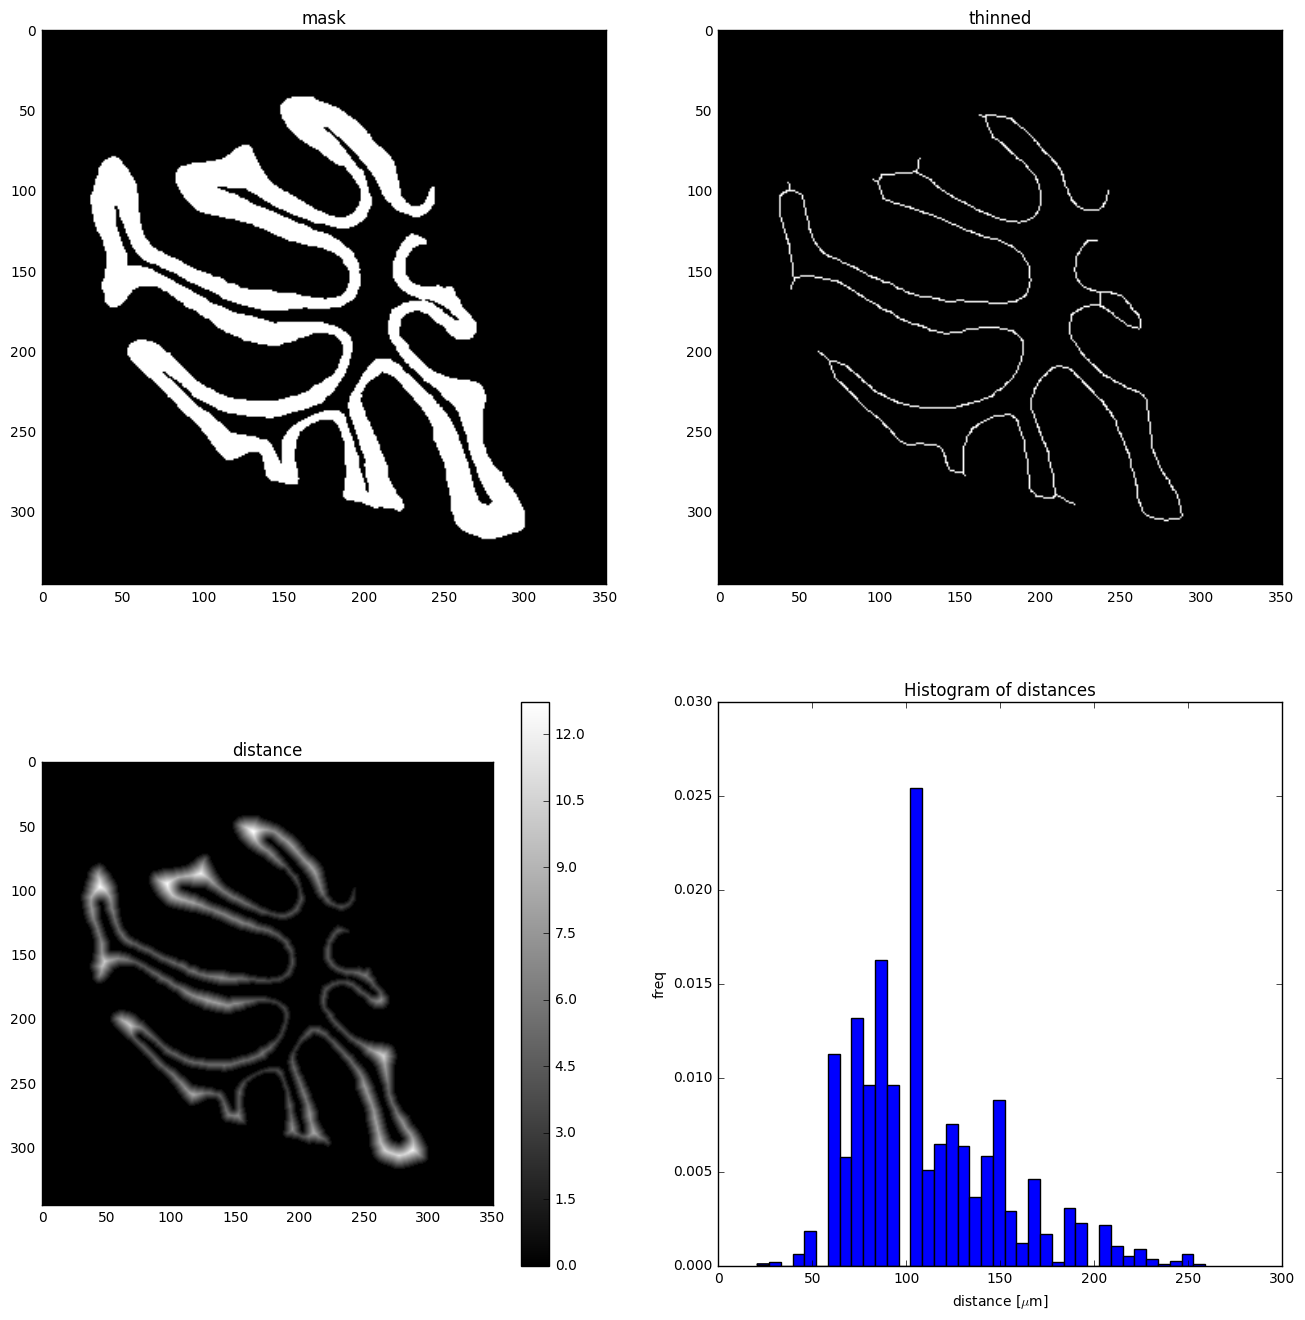

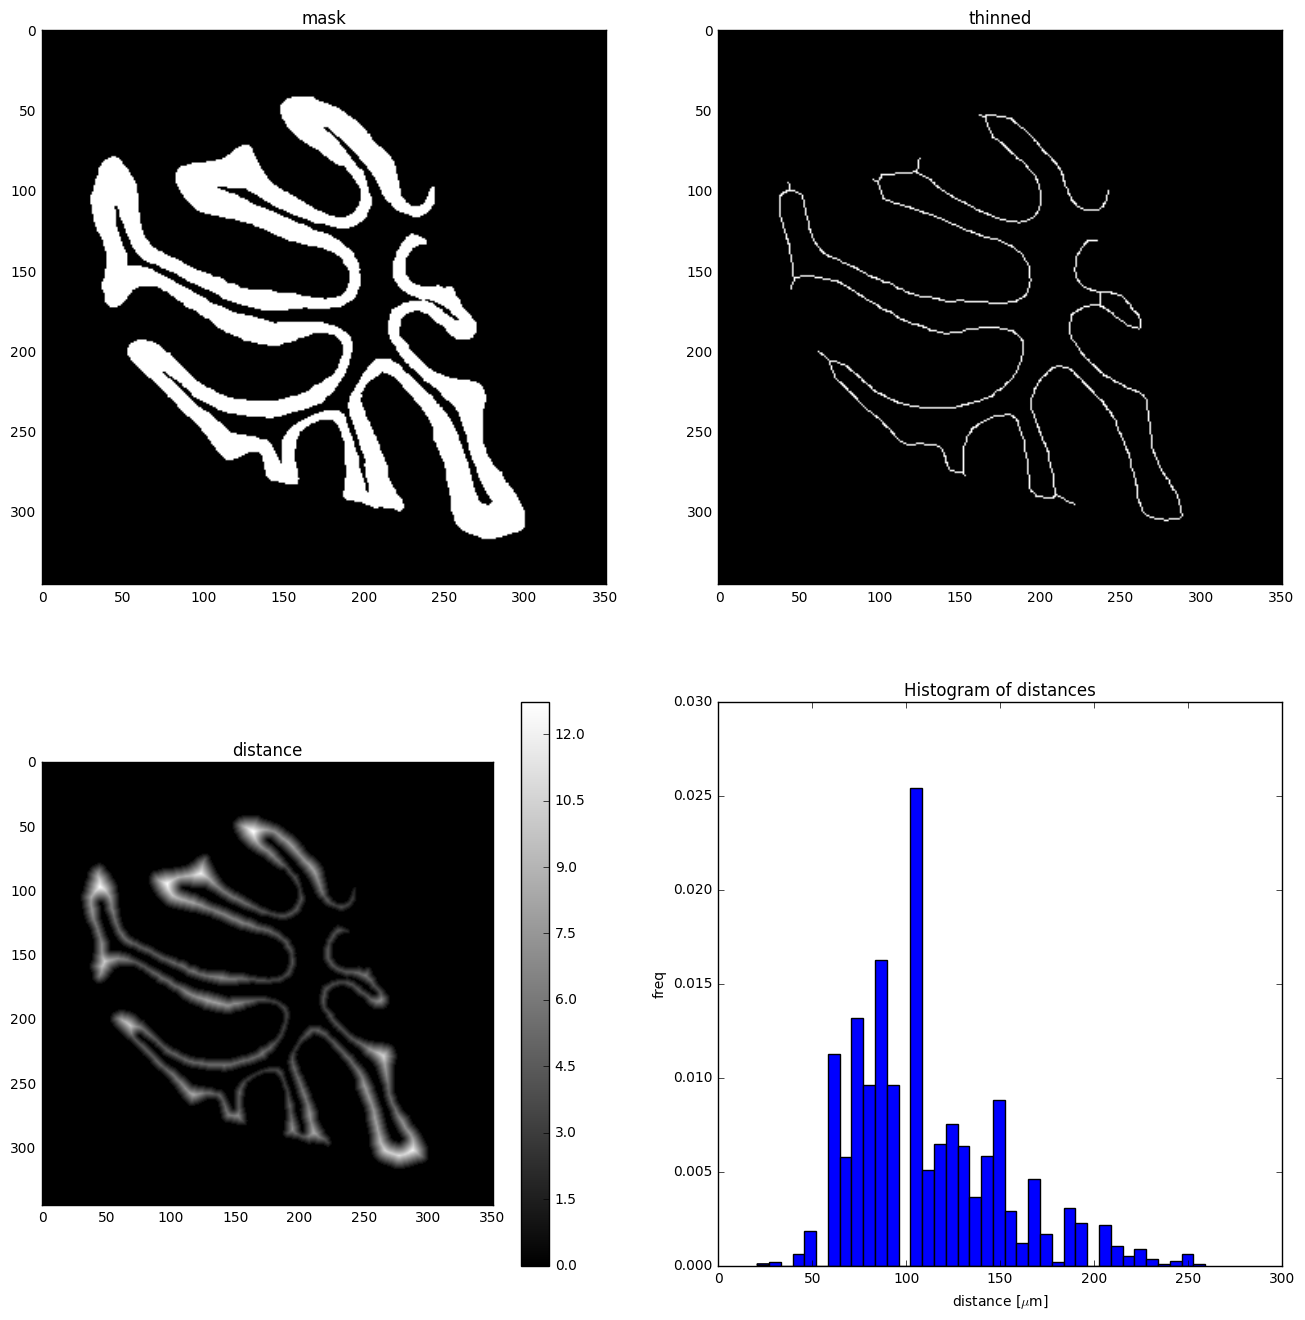

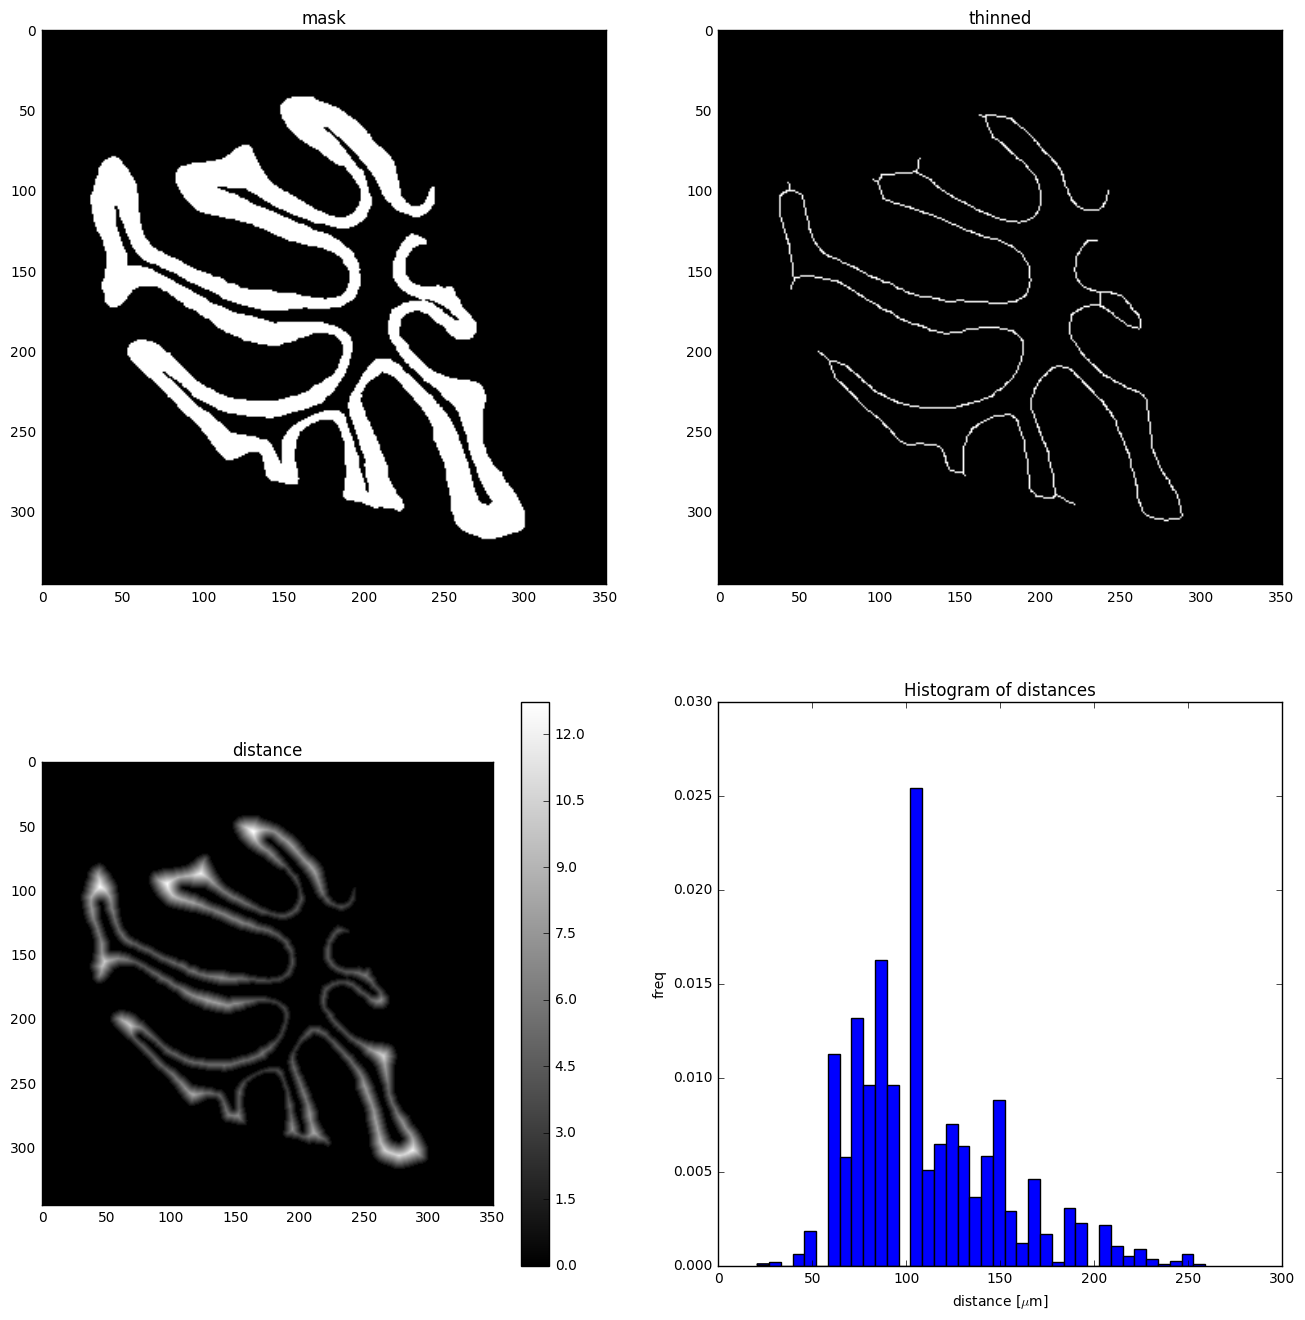

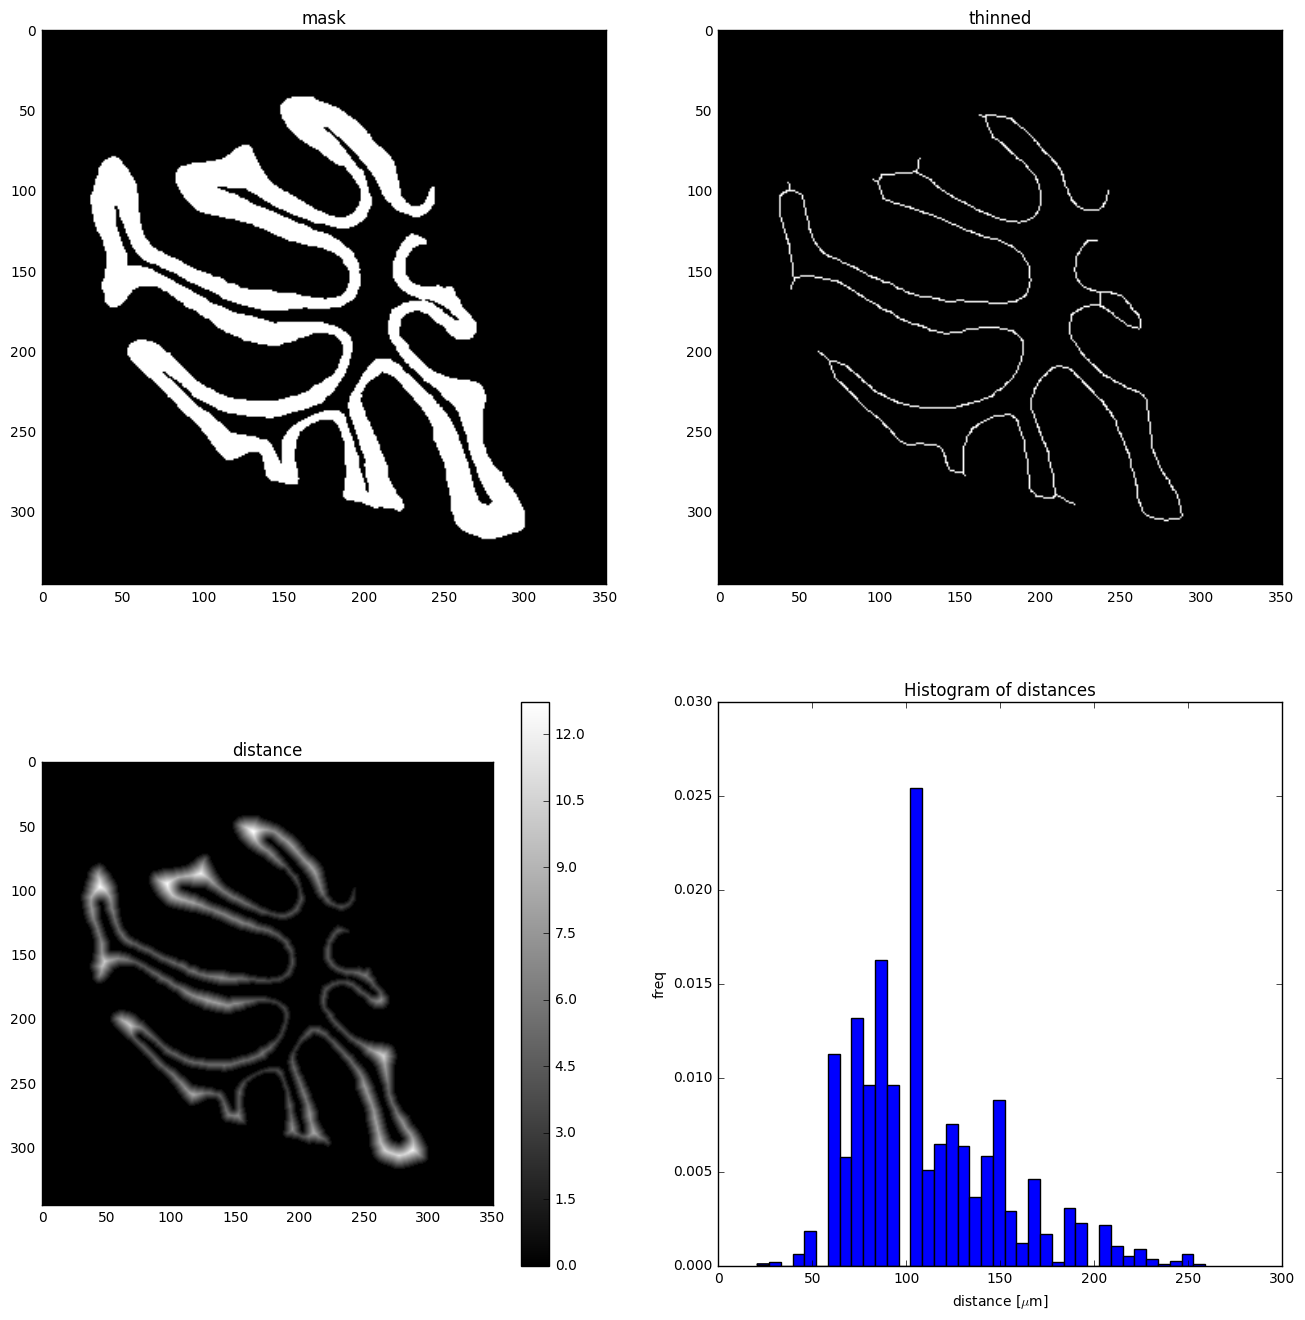

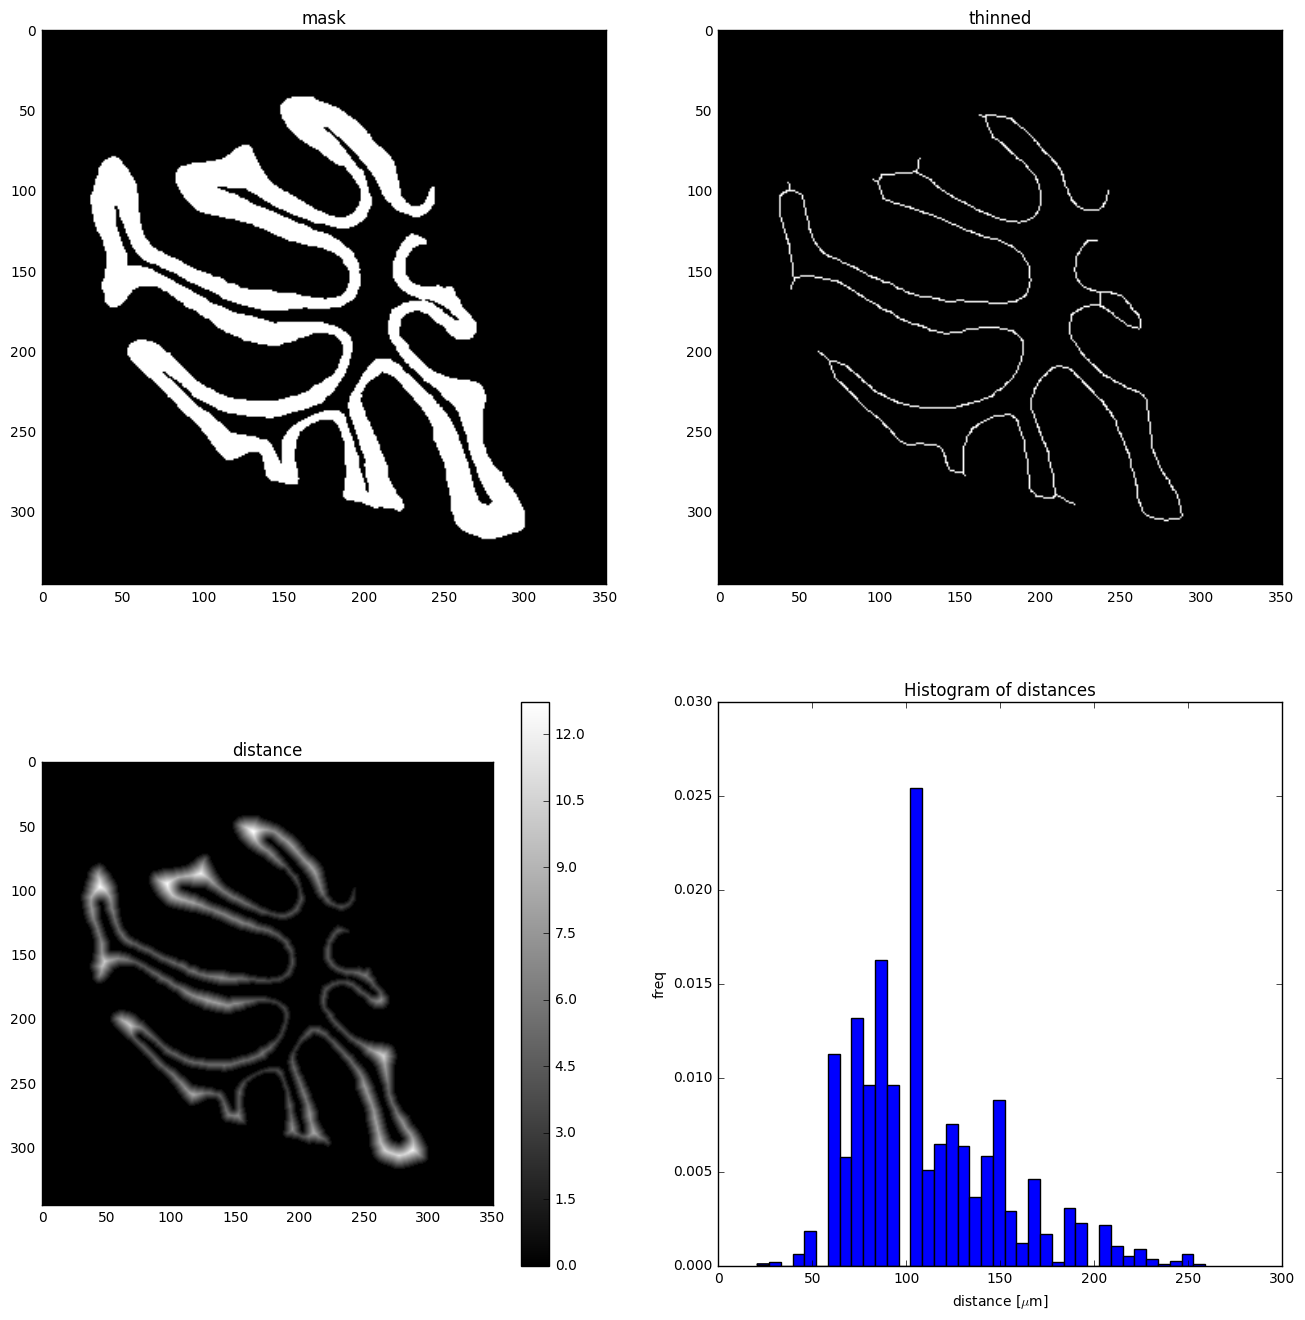

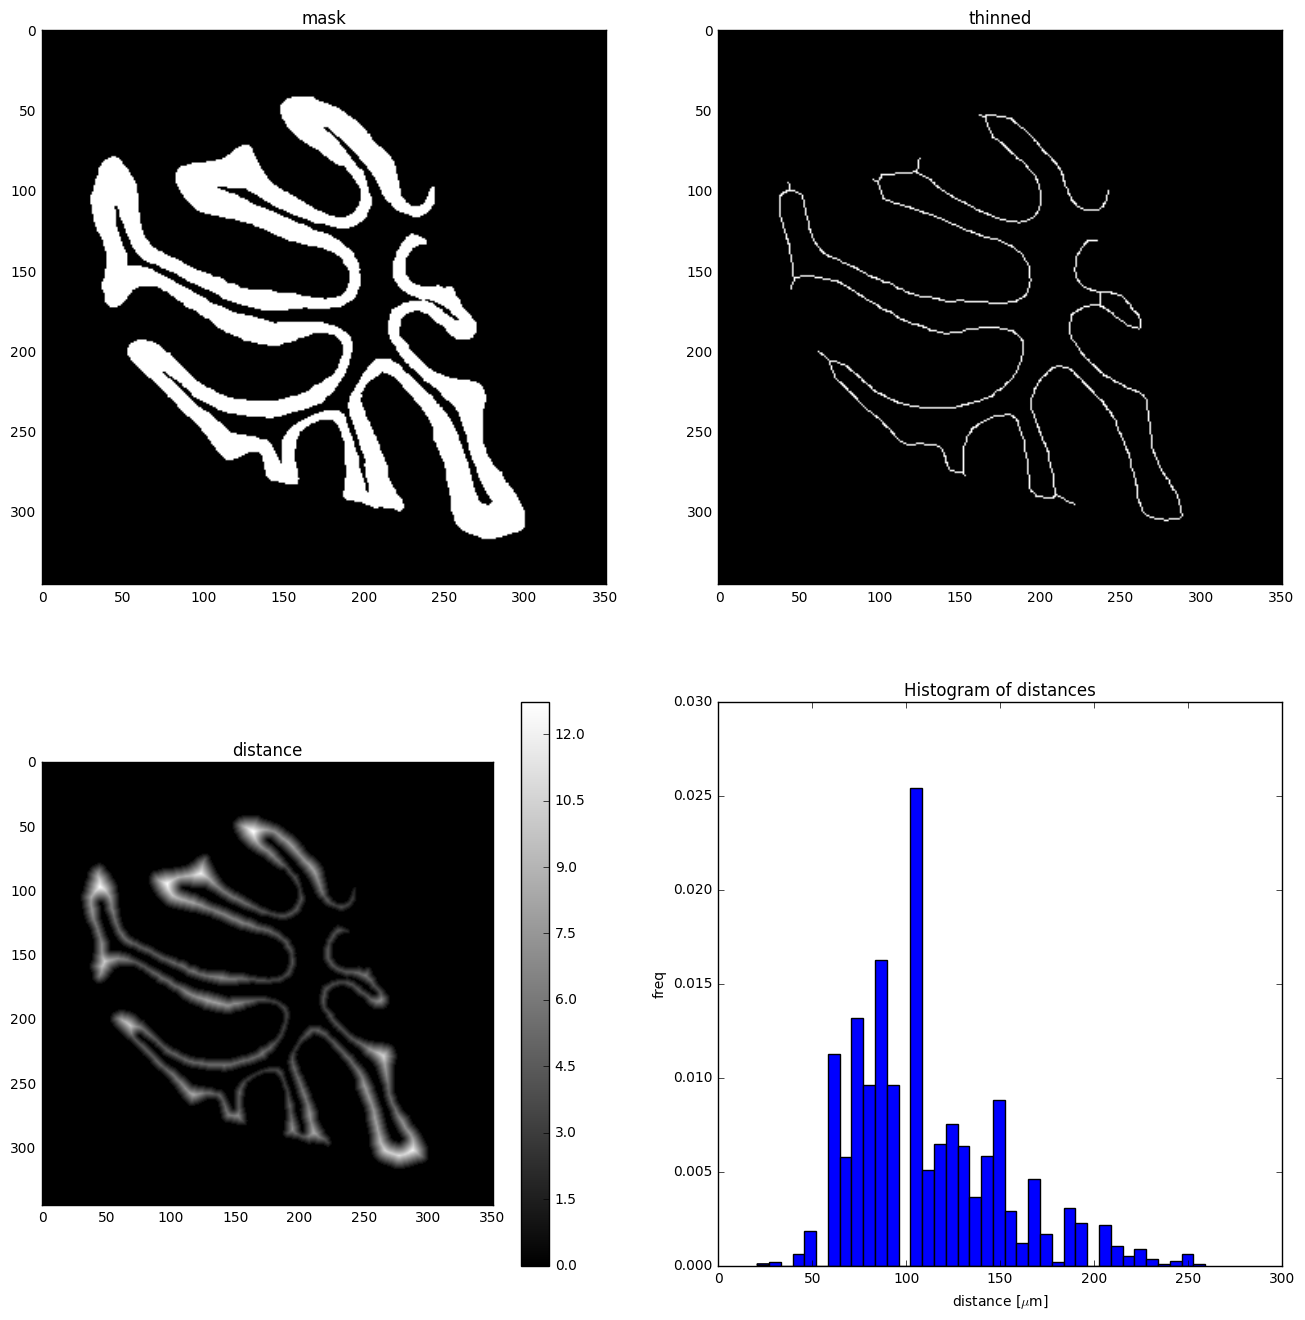

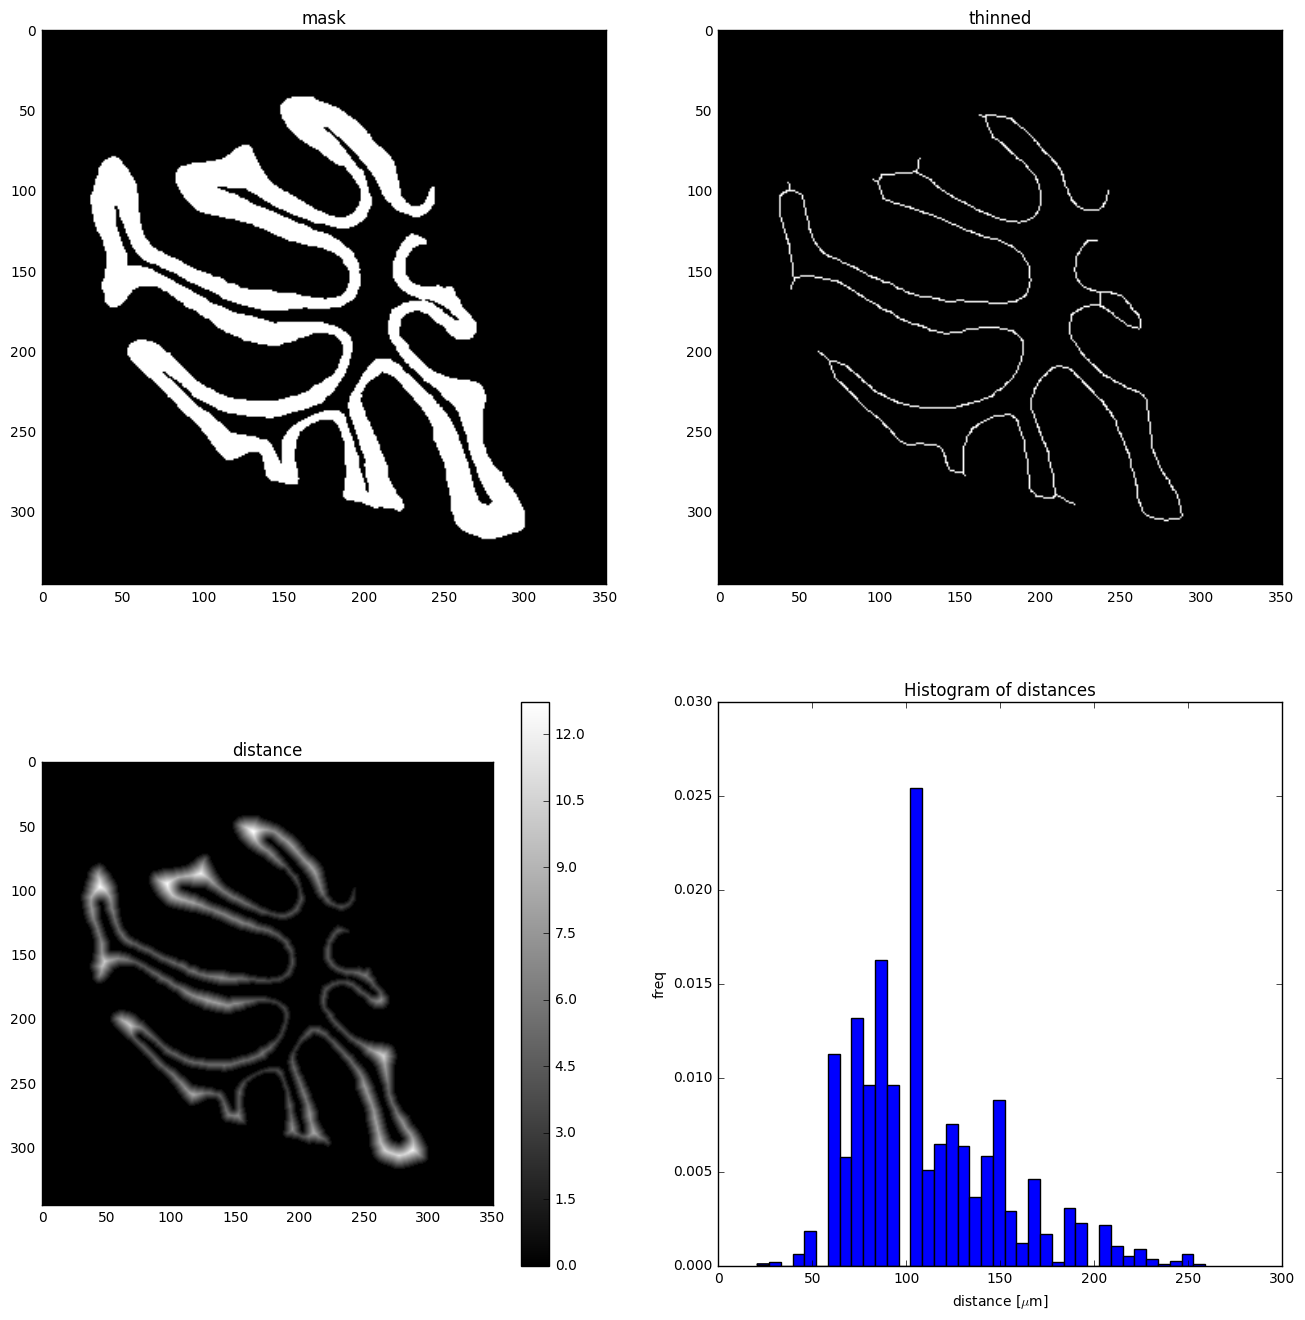

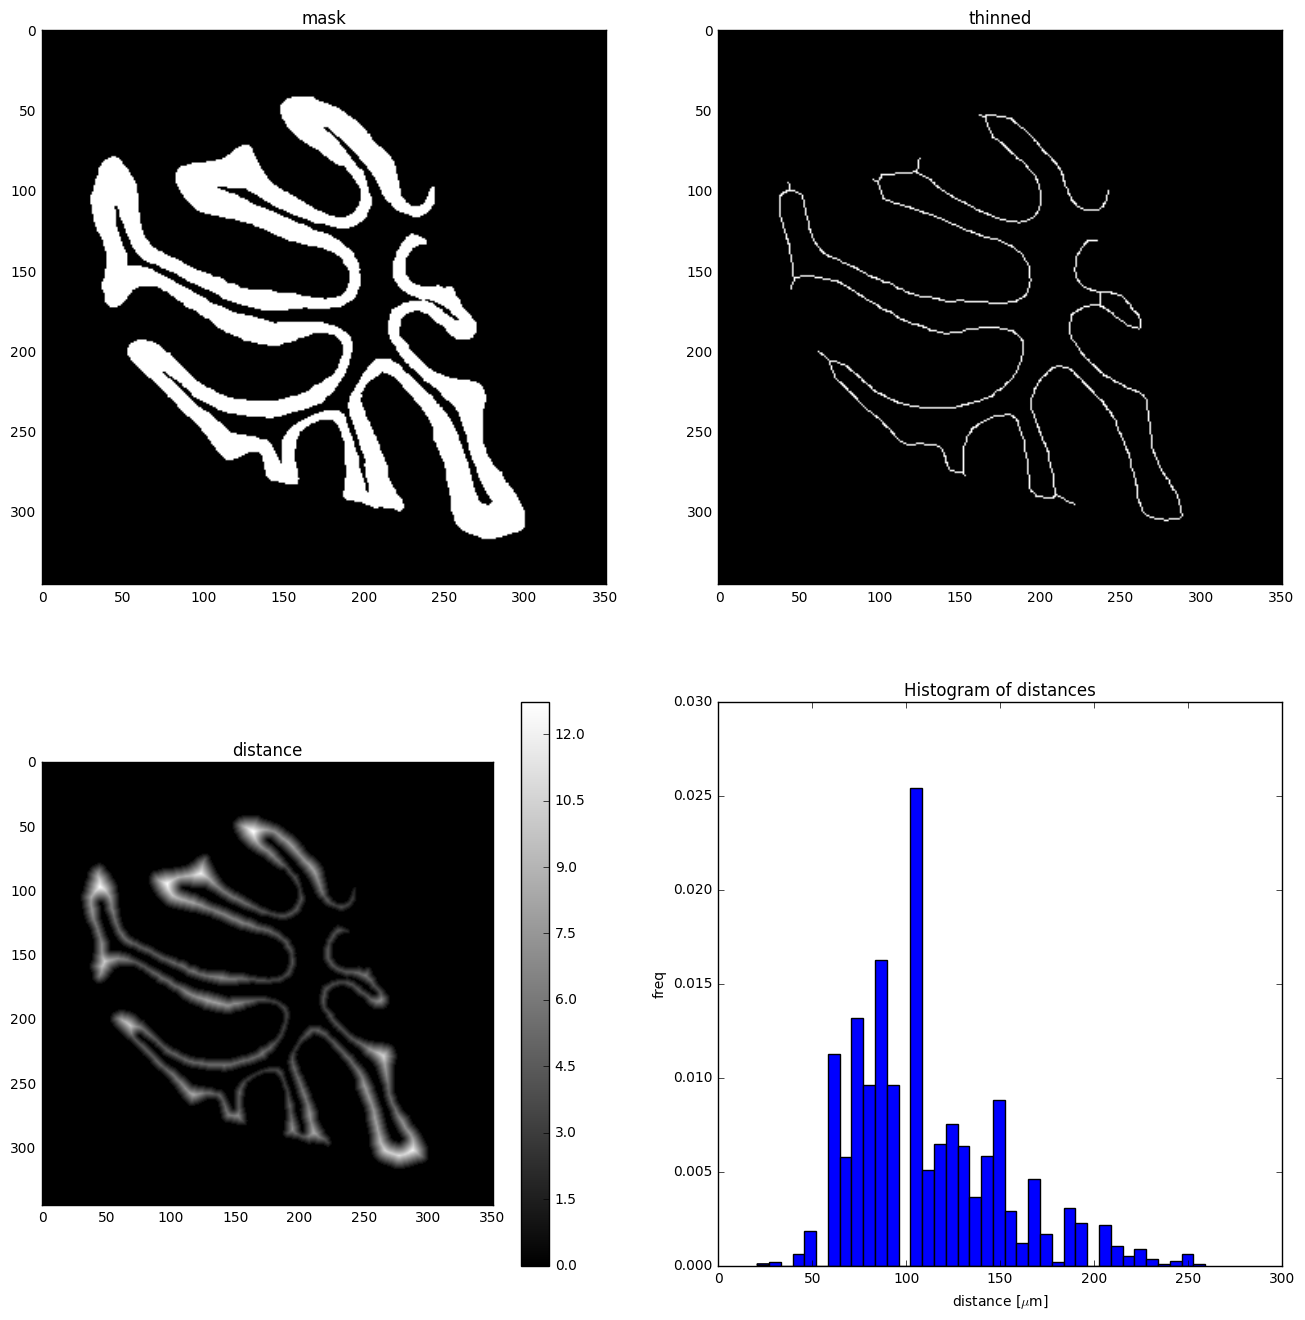

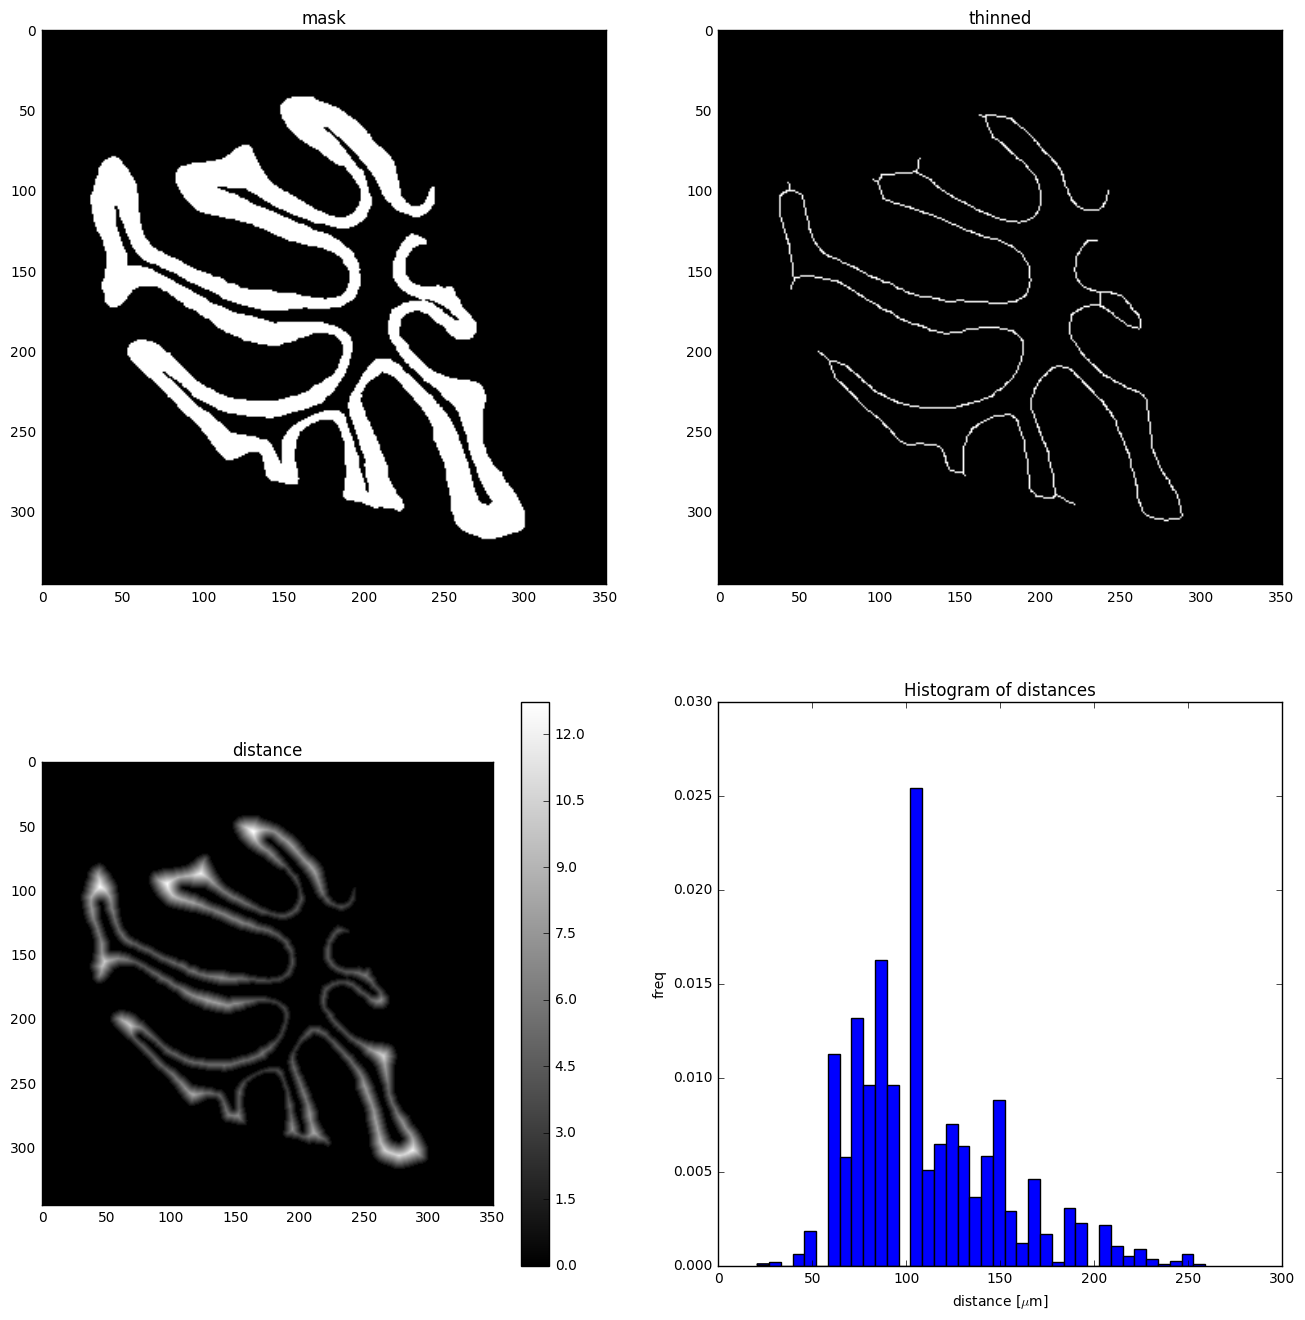

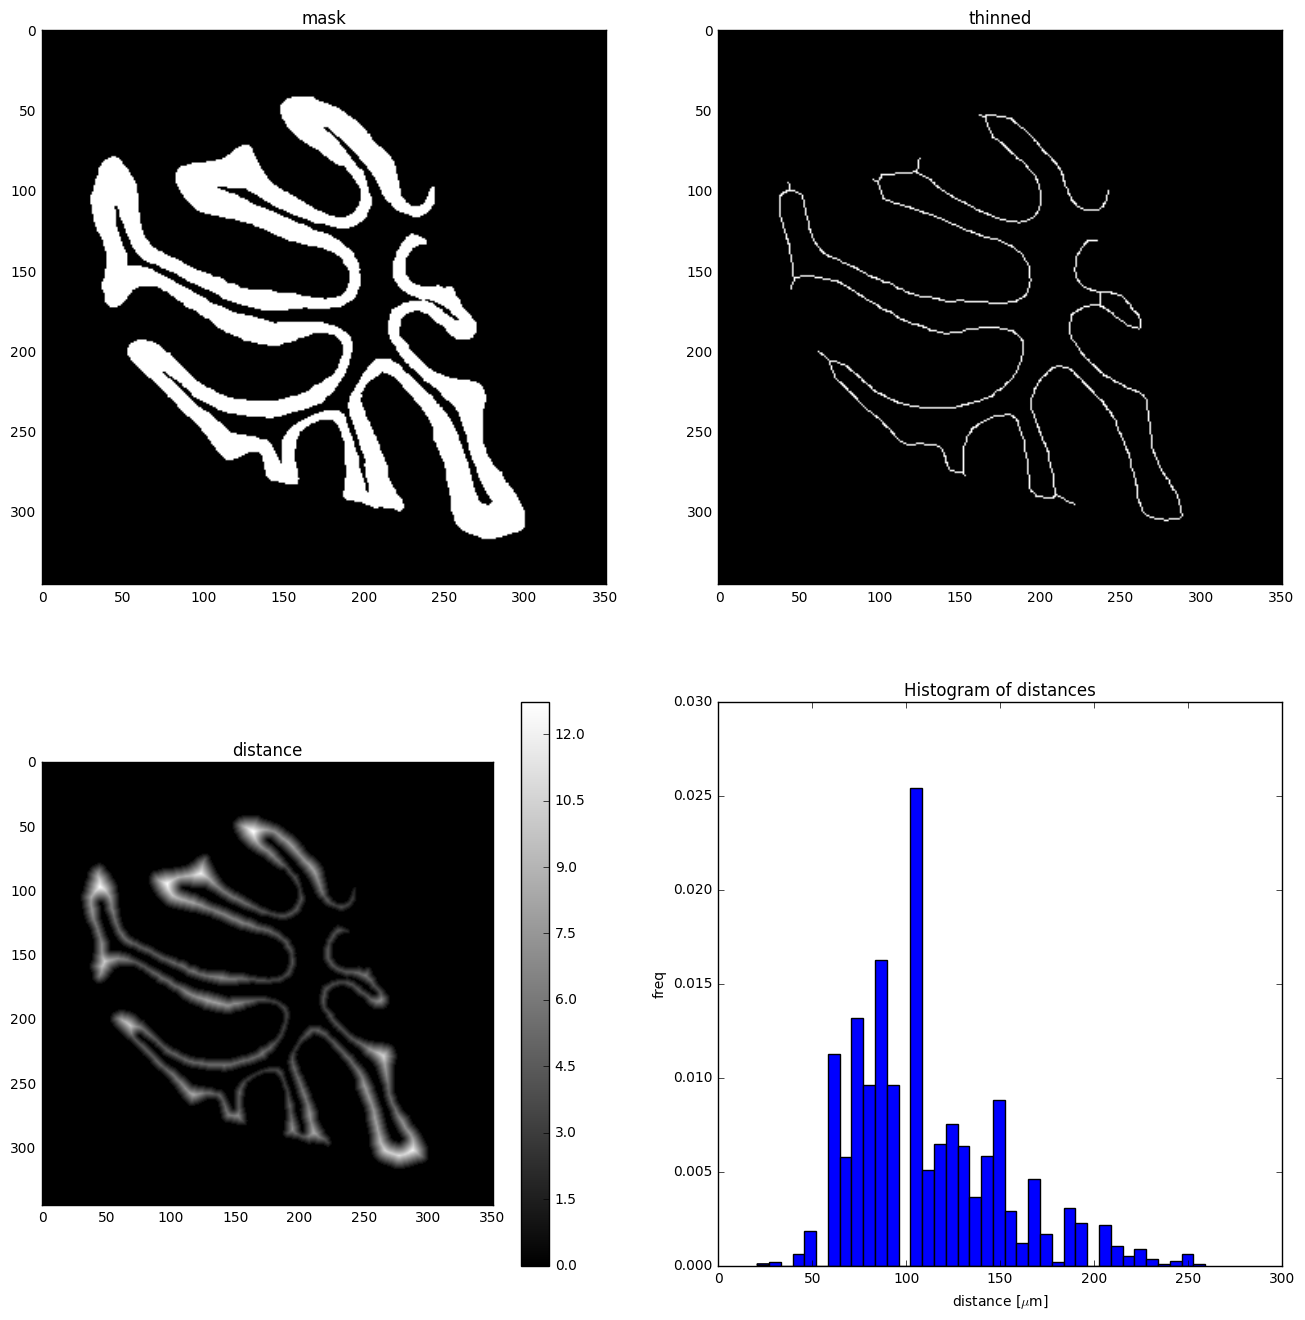

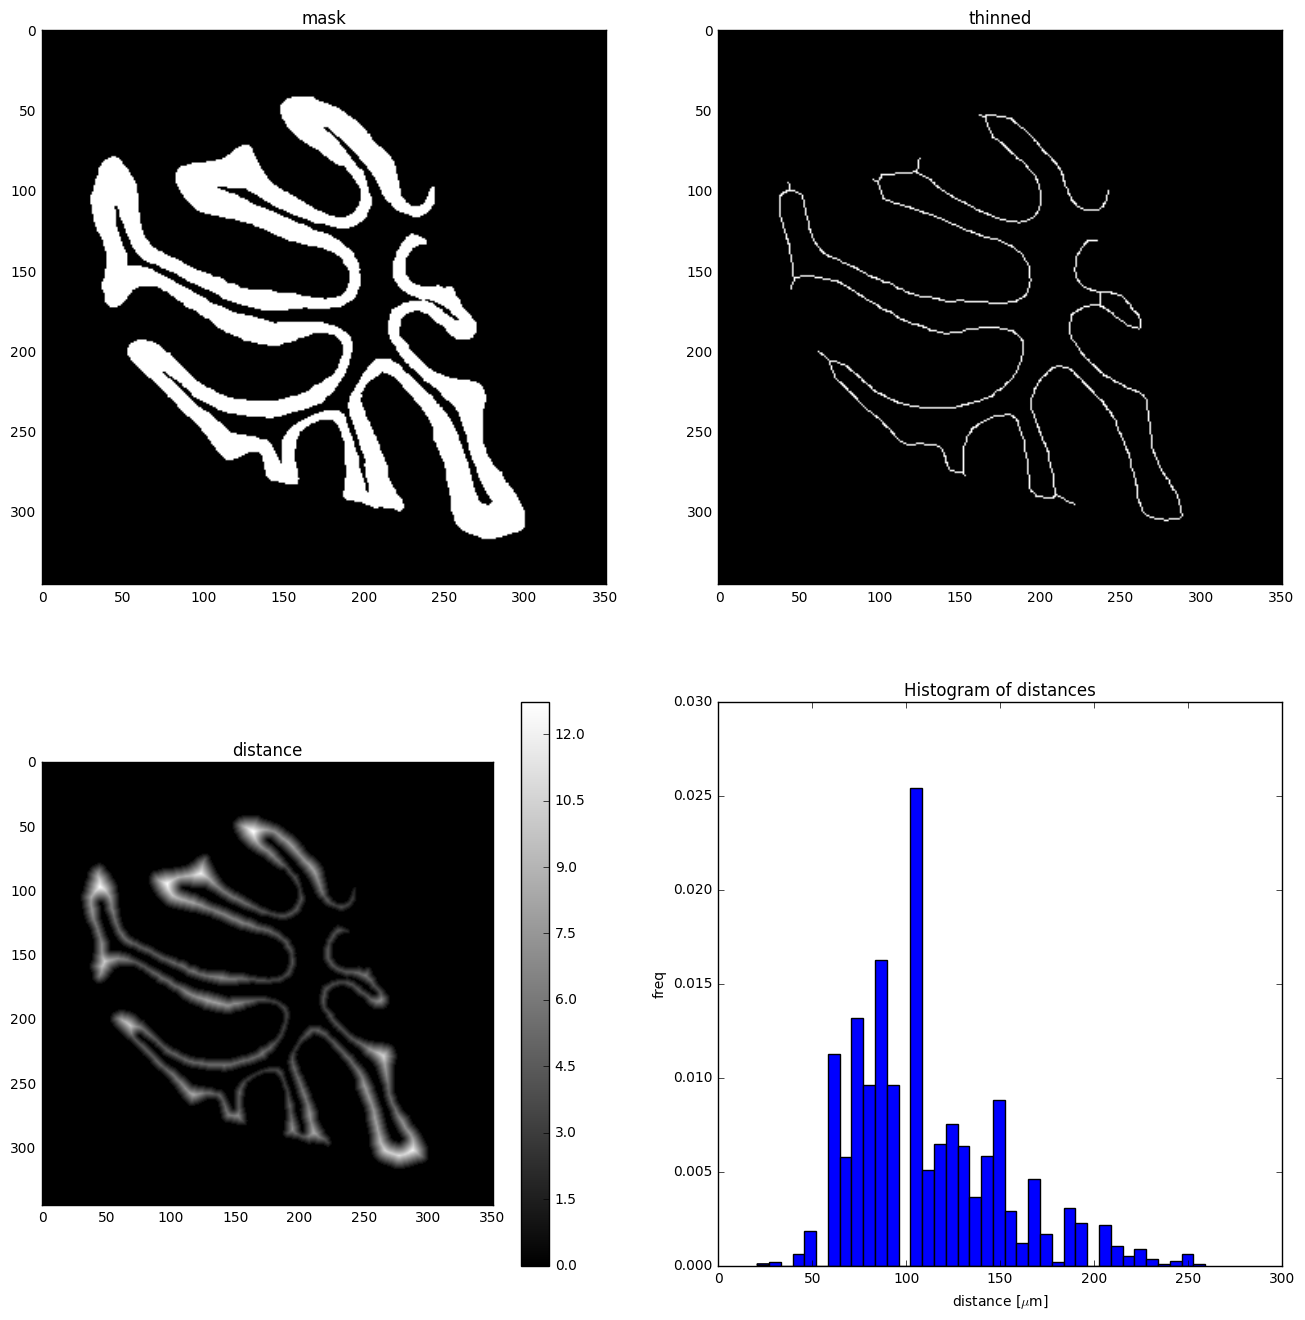

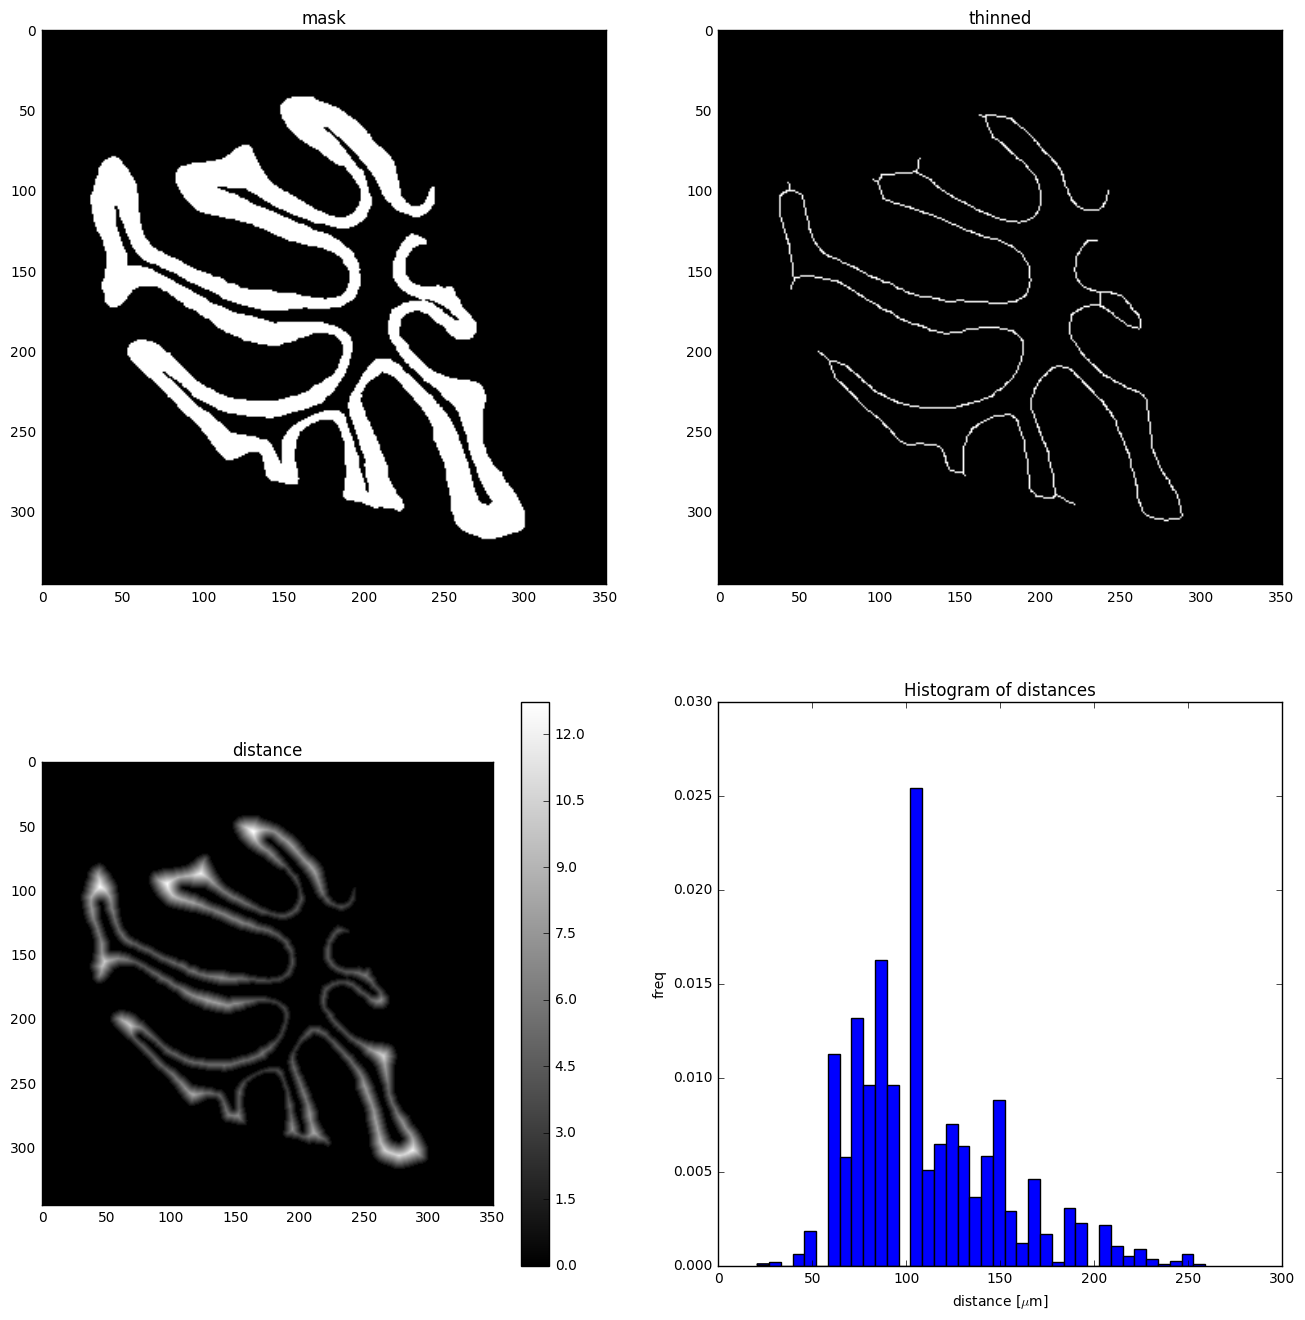

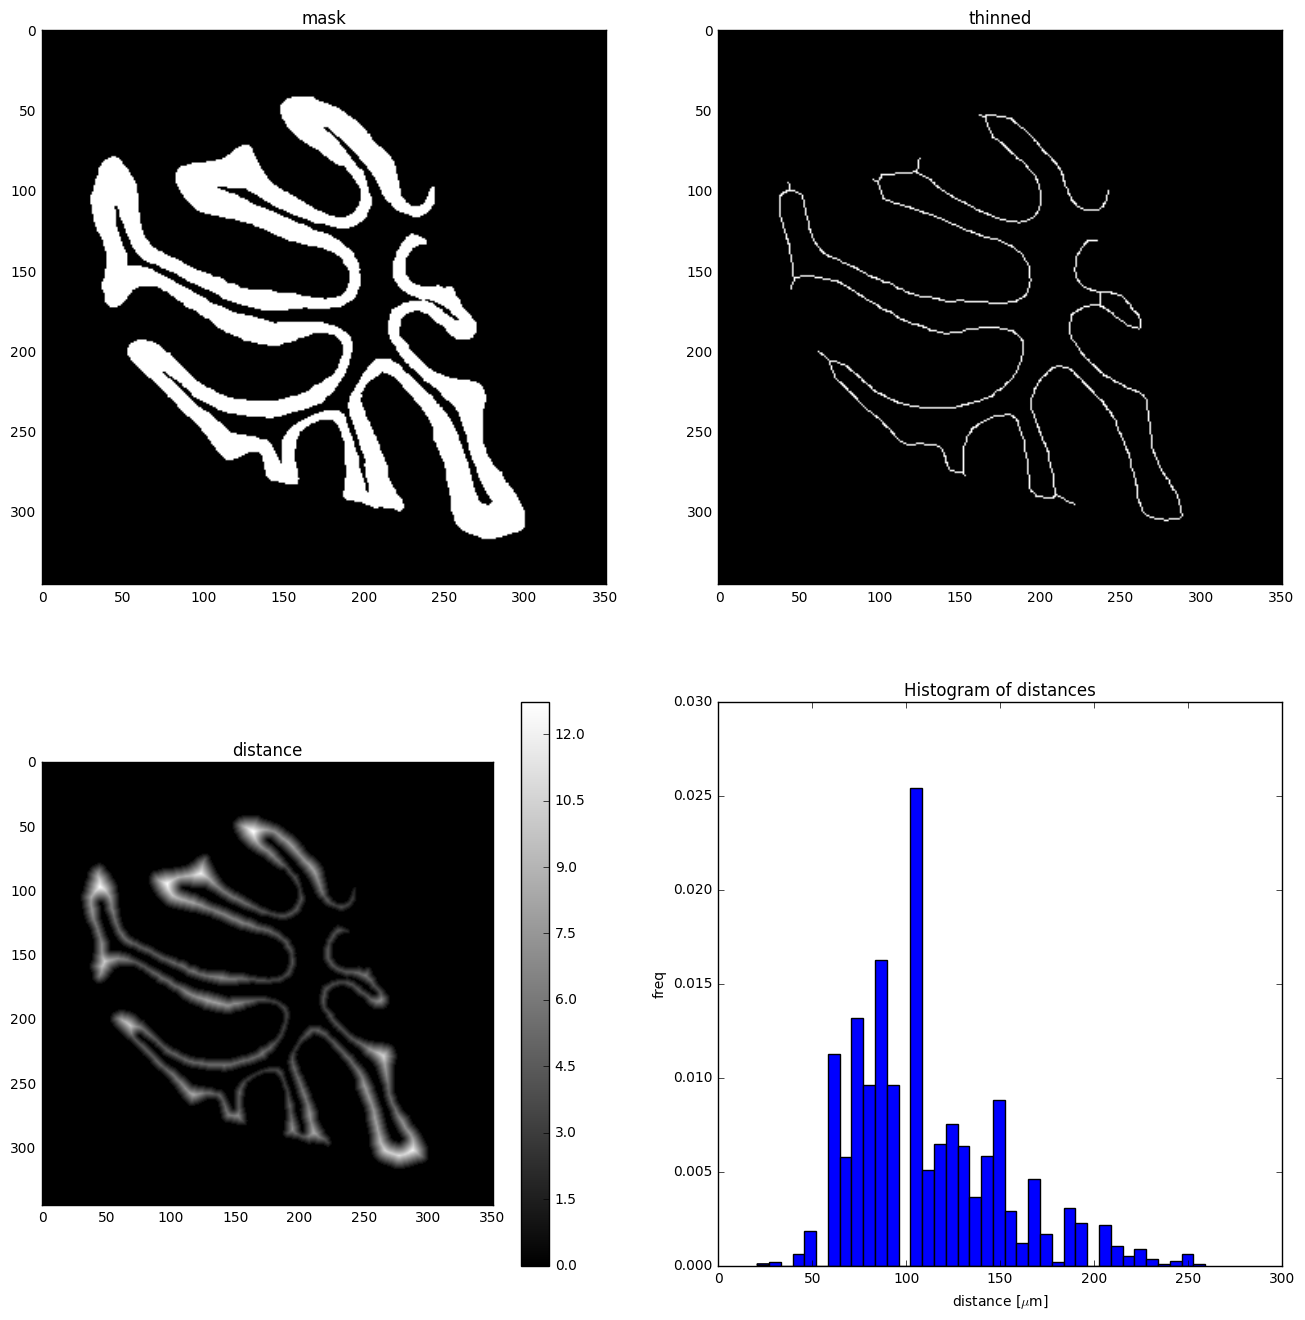

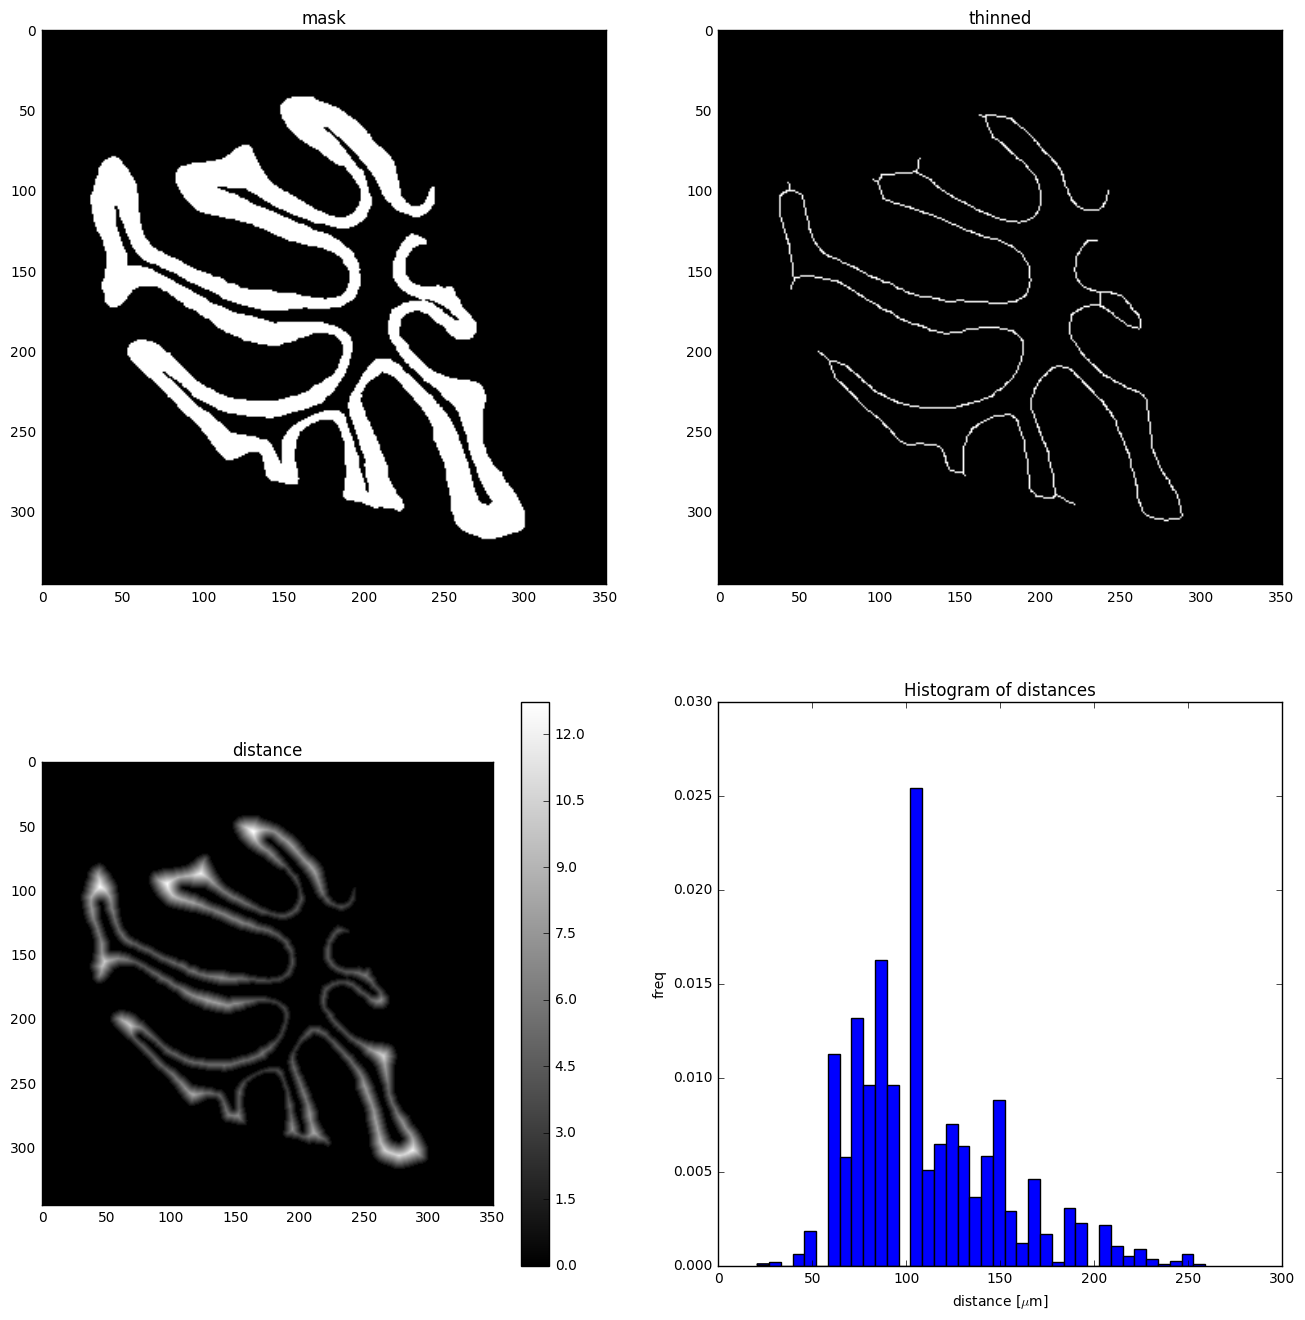

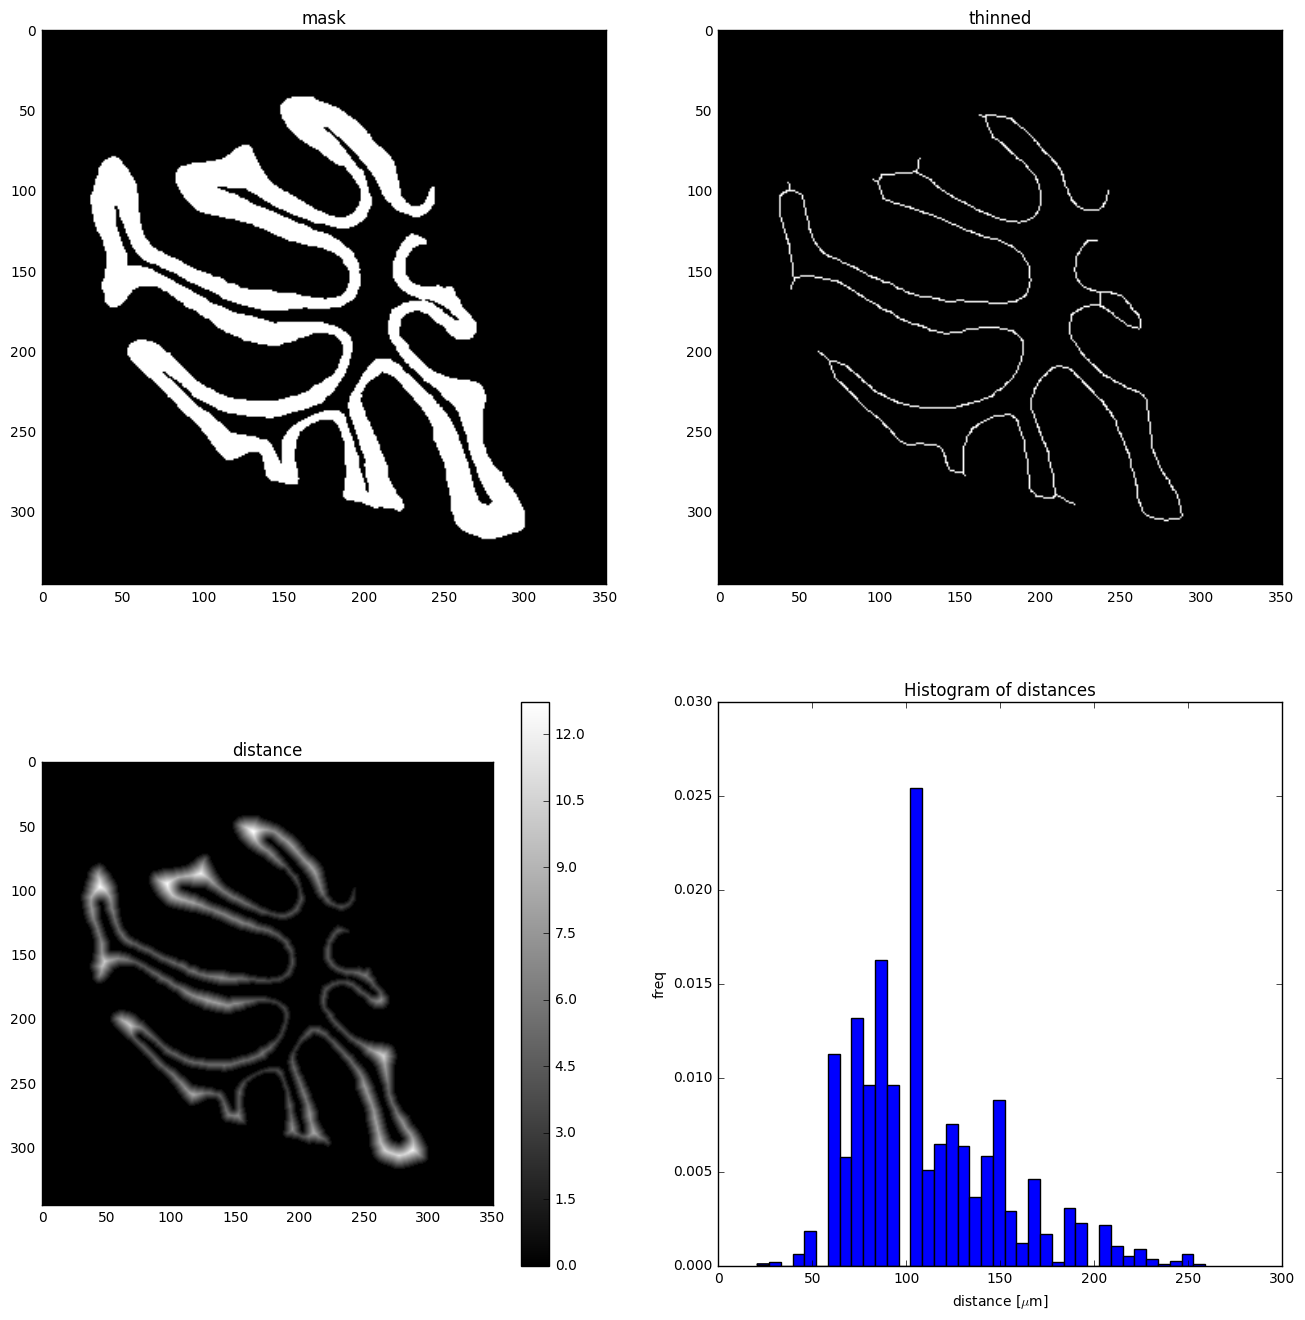

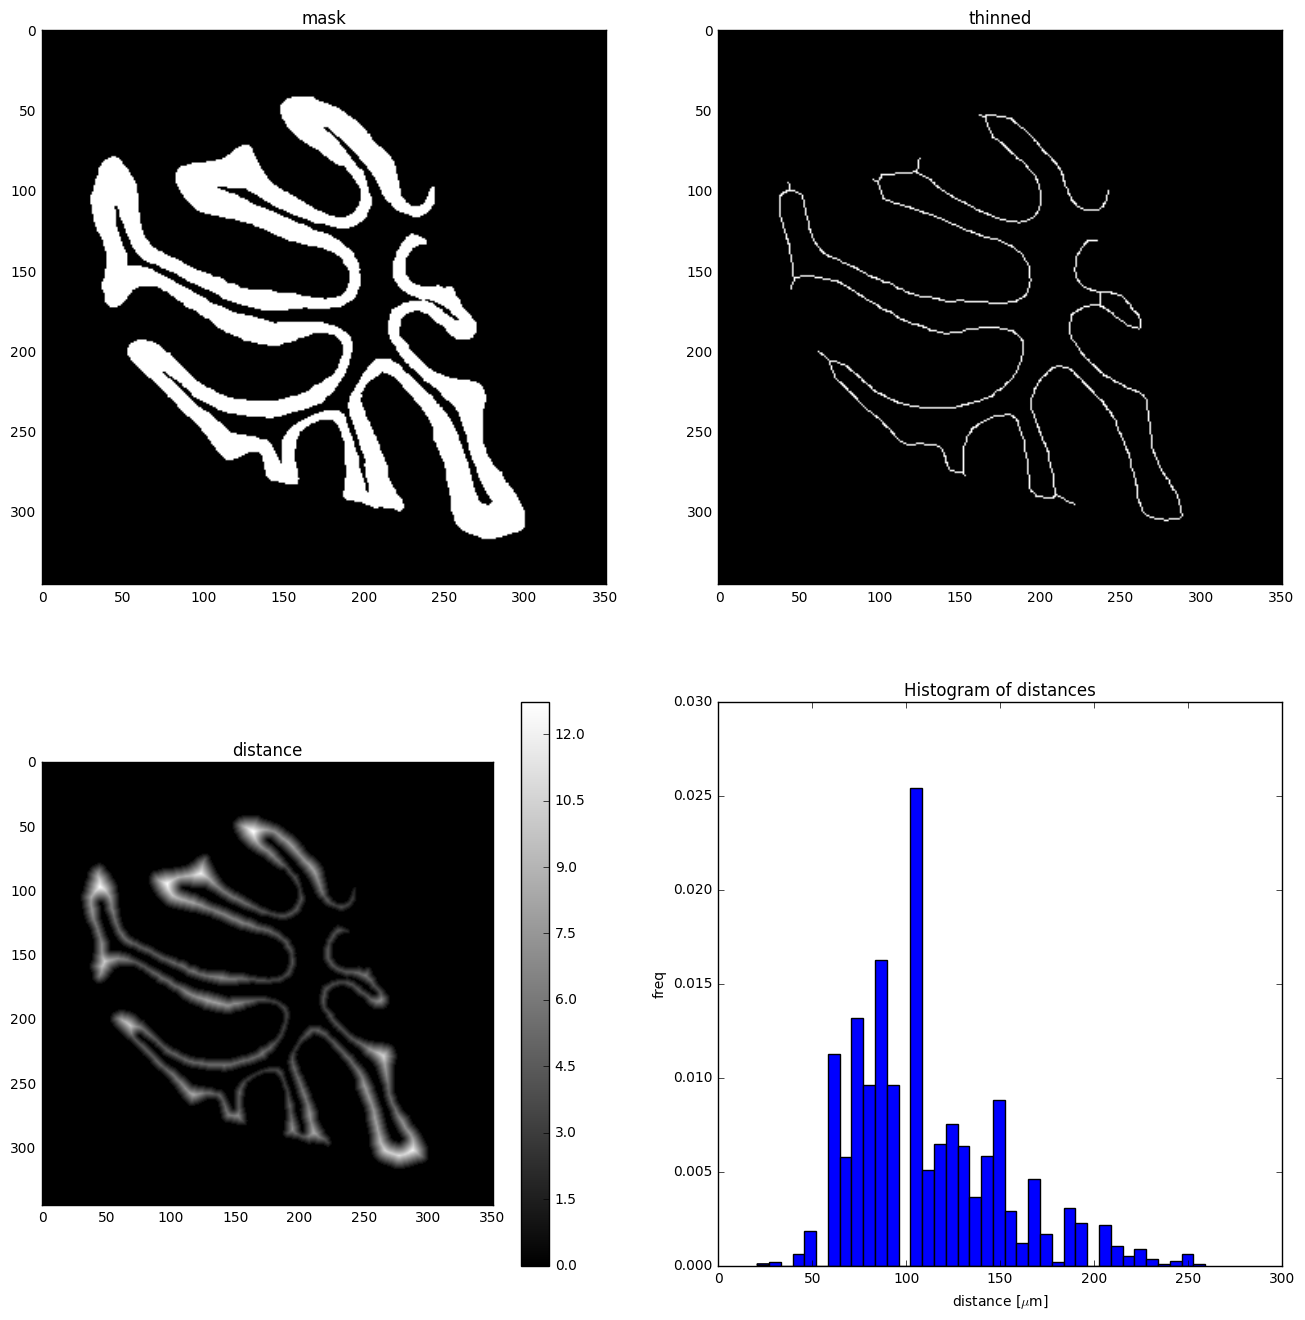

In [7]:
for mask in results:
    plt.figure(figsize=(16,16))
    plt.subplot(221)
    plt.title('mask')
    plt.imshow(mask_bw,cmap='gray')
    plt.subplot(222)
    plt.title('thinned')
    plt.imshow(bw2,cmap='gray')
    plt.subplot(223)
    plt.title('distance')
    plt.imshow(dist,cmap='gray')
    plt.colorbar()
    plt.subplot(224)
    #n, bins, patches = 
    plt.hist(th_values,bins=int(np.ceil(1.87*len(th_values-1)**0.4)),normed=1, histtype='bar')
    plt.title('Histogram of distances')
    plt.xlabel(r'distance [$\mu$m]')
    #plt.text(0.6,0.2,r'$\mu$ = {0:.2f} | $\sigma$ = {1:.2f}'.format(results[mask][0],results[mask][1]))
    plt.ylabel('freq')
    plt.savefig(result_dir+mask+'_sp.png');

In [8]:
masks

['./masks_170719/Mask7-3a-1.tif',
 './masks_170719/BOX3-3 - DAPImask.tif',
 './masks_170719/BOX2-4 - DAPImask.tif',
 './masks_170719/Mask7-3-1.tif',
 './masks_170719/Mask10-6a-2.tif',
 './masks_170719/_BOX10-7__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/_BOX9-5__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/_BOX1-2__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/Mask6-2a-2.tif',
 './masks_170719/Mask7-3-2.tif',
 './masks_170719/BOX4-2 - DAPI mask.tif',
 './masks_170719/_BOX4-1__TUNEL_HOECST_01_01 - DAPI mask.tif',
 './masks_170719/_BOX3bis-3__TUNEL_HOECST_01_01 - DAPI mask.tif',
 './masks_170719/BOX1-1 - DAPImask.tif',
 './masks_170719/Mask6-2bis.tif',
 './masks_170719/BOX10-7 DAPI mask.tif',
 './masks_170719/Mask10-6-1.tif',
 './masks_170719/_BOX1-5__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/BOX5-1 DAPI mask.tif',
 './masks_170719/BOX8-4 - DAPI mask.tif',
 './masks_170719/_BOX3-4__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/Mask3-4-1.tif',
 '

In [9]:
import pprint

In [10]:
pprint.pprint(results)

{'BOX1-1 - DAPImask': (130.24683, 49.946033, 1061),
 'BOX1-2 - DAPImask': (111.1615, 39.951103, 1826),
 'BOX10-7 DAPI mask': (98.779457, 41.486893, 1309),
 'BOX2-4 - DAPImask': (110.61486, 47.020676, 1425),
 'BOX3-3 - DAPImask': (103.25439, 42.876842, 1403),
 'BOX3-5- DAPI mask': (110.02411, 46.386578, 1834),
 'BOX4-2 - DAPI mask': (105.88268, 46.364384, 1968),
 'BOX5-1 DAPI mask': (91.378761, 39.59964, 1279),
 'BOX7-3-DAPImask': (91.307236, 31.102768, 1065),
 'BOX8-4 - DAPI mask': (91.610474, 36.882088, 1378),
 'BOX9-5 DAPI mask': (95.671898, 39.042366, 1269),
 'Mask10-6-1': (105.17748, 40.791393, 1418),
 'Mask10-6-2': (106.09612, 46.776176, 1440),
 'Mask10-6a-1': (114.94391, 46.08876, 1532),
 'Mask10-6a-2': (111.03874, 42.248631, 1501),
 'Mask3-4': (109.34269, 43.722744, 1562),
 'Mask3-4-1': (108.04096, 42.022594, 1480),
 'Mask3-4a-1': (115.87326, 42.406845, 1457),
 'Mask6-2a-1': (109.82948, 41.614456, 1276),
 'Mask6-2a-2': (106.02771, 38.611691, 1416),
 'Mask6-2bis': (104.04048, 44.